# Making Jet clusters and exporting them
## Need Aggregator files, SOL_Tc_stats (or T3) and subjects_Tc (or T3) made during the aggregation in BoxTheJets
This notebook takes the jets detected per subjects and looks for clusters in space and time. If two jets of different clusters fall within the epsilon given by the user (set by eps and time_eps) they are clustered together to make a jet cluster, this can be repeated such that more jets are added to the cluster. Clusters can only contain one jet per subject such that closeby jets are detected seperatly. 
The second part of this notebook requires the database of the Zooniverse to make the conversion between pixels ans solar coordinates. For now this can only be done on the foxsiaadmins computer of Minnesota University. 

In [1]:
import os
from aggregation import Aggregator, get_subject_image
from aggregation import SOL
from aggregation import json_export_list
from aggregation import get_box_edges, sigma_shape
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.dates import DateFormatter
import numpy as np
from scipy.cluster.hierarchy import dendrogram
plt.style.use('default')
%matplotlib inline

Read in the data made by the aggregation steps. This analysis can also be done using the SOL_T3_stats and subjects_T3 files 

In [3]:
aggregator = Aggregator('reductions/point_reducer_hdbscan_box_the_jets.csv', 
                        'reductions/shape_reducer_dbscan_box_the_jets.csv')
aggregator.load_extractor_data('extracts/point_extractor_by_frame_box_the_jets.csv',
                               'extracts/shape_extractor_rotateRectangle_box_the_jets.csv')
sol = SOL('../SOL_Tc_stats.csv', aggregator) 

SOL_small,SOL_subjects,filenames0,times,Num,start,end,notes=np.loadtxt('../SOL_{}_stats.csv'.format('Tc'),delimiter=',',unpack=True,dtype=str)
Num=Num.astype(float)

subjects,date,end_date,ans,agreement,subject_file, subject_sol=np.loadtxt('../subjects_{}.csv'.format('Tc'),delimiter=',',unpack=True,dtype=str)
date=np.array(date,dtype='datetime64')
end_date=np.array(end_date,dtype='datetime64')
subjects=subjects.astype(int)
agreement=agreement.astype(float)

path_old=os.getcwd()

### Start the Jet clustering, we picked the variabels eps= 3.0 and time_eps = 2.0. This was done based on looking at the results.  
The epsilon voor space clustering is chosen to be 3, however in some cases with a small viewpoint this can still be quite large. Since the smallest distance is chosen for clustering this often does not interfer with good results
The time epsilon meant a jet that was 'missing' in one subject could still be detected if it was present in the next subject. This can mean rapidly reoccuring jets can be clustered together unintensionally

In [3]:
Jet_clusters=np.array([])
#Set the space and time epsilon
eps,time_eps=3.0,2.0

for s in range(len(SOL_small)):
    del_index=np.array([],dtype=int)
    if s==1:
        continue
    SOL_event=SOL_small[s]
    print(f'SOL_small[{s}] ', SOL_event)
    try:
        clusters, distance_met, point_met, box_met = sol.filter_jet_clusters(SOL_event, eps=eps, time_eps=time_eps)
    except:
        print(f"No jets in {SOL_event}")
        continue
    for j, cluster in enumerate(clusters):
        print(j, len(cluster.jets))
        cluster.adding_new_attr("SOL",SOL_event)
        if len(cluster.jets)==1 and ans[subjects==cluster.jets[0].subject][0]=='n':
            #jets that only last 1 subject and do not have 50% agreement yes are excluded
            del_index=np.append(del_index,j)
    if len(del_index)>0:
        print(f'Remove {len(del_index)} clusters from list due to too low agreement')
        clusters = np.delete(clusters, del_index)        
    Jet_clusters=np.append(Jet_clusters,clusters)
        
        

SOL_small[0]  SOL2010-07-29T15:15:15L159C039
No jets in SOL2010-07-29T15:15:15L159C039
SOL_small[2]  SOL2011-03-29T19:55:11L196C115
Using eps=3.0 and time_eps=60.0 min
0 2
SOL_small[3]  SOL2011-04-01T03:00:11L222C115
Using eps=3.0 and time_eps=60.0 min
0 8
SOL_small[4]  SOL2011-04-07T19:10:00L011C085
Using eps=3.0 and time_eps=60.0 min
0 3
1 1
2 1
Remove 2 clusters from list due to too low agreement
SOL_small[5]  SOL2011-04-07T23:50:00L037C115


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:844: RuntimeWarning: invalid value encountered in sqrt
  box_gamma[i] = np.sqrt(1. - csg[i])
/Users/pjol/SolarJets-1/BoxTheJets/aggregation/SOL_class.py:325: RuntimeWarning: divide by zero encountered in double_scalars
  point_metric[k,j] = point_dist/np.mean([start_confidences[j], start_confidences[k]])


Using eps=3.0 and time_eps=60.0 min
0 1
1 2
2 1
3 1
4 1
5 1
6 3
7 1
8 1
9 1
10 2
11 1
12 1
13 4
14 1
15 1
16 1
17 3
18 1
19 2
20 1
21 2
22 2
23 1
24 1
25 1
26 1
27 2
Remove 14 clusters from list due to too low agreement
SOL_small[6]  SOL2011-01-20T09:00:09L289C165
Using eps=3.0 and time_eps=60.0 min
0 8
SOL_small[7]  SOL2011-01-20T22:00:09L353C074
Using eps=3.0 and time_eps=60.0 min
0 1
1 2
2 1
3 2
4 1
5 1
6 1
7 1
8 1
9 1
10 2
11 1
12 1
13 1
14 1
15 1
16 1
Remove 11 clusters from list due to too low agreement
SOL_small[8]  SOL2011-01-24T22:15:09L358C011
Using eps=3.0 and time_eps=60.0 min
0 12
1 1
2 5
3 2
4 1
Remove 1 clusters from list due to too low agreement
SOL_small[9]  SOL2011-01-26T01:52:21L007C038
Using eps=3.0 and time_eps=60.0 min
0 9
1 1
2 1
3 1
4 2
SOL_small[10]  SOL2011-02-13T04:57:46L131C056
Using eps=3.0 and time_eps=60.0 min
0 8
1 2
SOL_small[11]  SOL2011-02-14T05:31:16L307C065
Using eps=3.0 and time_eps=60.0 min
0 9
1 1
2 1
3 1
Remove 1 clusters from list due to too lo

### From here on the code will work on the foxsiadmins computer to have access to the visual files of the Zooniverse subjects. 

In [5]:
#This part will only work on the Foxsiadmins computer since it needs the visual file saved in the database 
path_database='/Users/pjol/Documents/Zooniverse/'
os.chdir(path_database)

from solar.database.tables import Visual_File

def solar_conversion(file,x,y):
    '''
        Convert from pixel coordinates in the Zooniverse subjects to solar coordinates 
            Inputs
            ------
            file : str
                filename of the image used in the Zooniverse subject 
            x : str or int or float 
                x pixel location 
            y : str or int or float
                y pixel location
            
            Output
            ------
            x_sun : float 
                Solar X loaction in arcsec
            y_sun : float 
                Solar Y loaction in arcsec
    '''
    filename = file
    vv = Visual_File.select().where(Visual_File.file_name==filename)
    #Change de Y pixels to Height-Y since the pixel frame is defined inverted from the Zooniverse processor calculation
    y=vv[0].height-y
    x_pix,y_pix=x,y
    wc = Visual_File.world_from_pixel(vv[0], float(x_pix), float(y_pix))
    solar_x,solar_y = wc.Tx,wc.Ty
    x_sun=str(solar_x).split('arcsec')[0]
    y_sun=str(solar_y).split('arcsec')[0]
    return float(x_sun),float(y_sun)

def get_solar_distance(file,pair):
    '''
        Get the solar projected distance between the two pairs of X,Y coordinates
            Inputs:
            -------
            file : str
                filename of the image used in the Zooniverse subject
            pair : np.array
                x,y Coordinates of the two points 1,2 for which the solar distance needs to be calculated
                format [[x1,y1],[x2,y2]]
    '''
    solw1=solar_conversion(file,pair[0][0],pair[0][1])
    solw2=solar_conversion(file,pair[1][0],pair[1][1])
    #Euclidean distance
    distance=np.sqrt((solw1[0]-solw2[0])**2 +(solw1[1]-solw2[1])**2 )
    return distance


### Go through the list of jet clusters and determine their propeties in physical coordinates

Jet start
Start base 245.714 -207.81
sigma 0.13408893202851196


Start base 252.03 -280.261
sigma 0.7331655692446822


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 754.417 -268.472
sigma 0.5961281036577458


Start base 697.46 -237.059
sigma 0.2592088776517396


Start base 698.394 -230.805
sigma 0.2119056594020485


Start base 693.241 -229.77
sigma 0.41999800478150834


Start base 699.64 -236.5
sigma 0.21966438065175464


Start base 698.558 -230.876
sigma 0.23235263961426214


Start base 699.166 -240.484
sigma 0.23026097797752348


Start base 691.737 -225.075
sigma 0.6929327445112141


Jet start
Start base -604.739 232.022
sigma 0.5510380746108533


Start base -652.964 280.63
sigma 0.4298850268616323


Start base -665.139 266.126
sigma 0.5868238833639122


Jet start
Start base -276.849 -210.031
sigma 0.08131786284229077


Start base -275.525 -211.621
sigma 0.29924157415497743


Jet start
Start base -346.225 -307.999
sigma 0.2972772135735997


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -309.256 -298.133
sigma 0.4490868965557116


Start base -303.039 -265.027
sigma 0.48351805951672894


Start base -325.614 -357.857
sigma 0.9388034202584993


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -309.256 -298.133
sigma 1.0000190179616177


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -303.195 -306.563
sigma 0.3572523413124217


Start base -291.482 -299.731
sigma 0.36954864066415677


Jet start
Start base -263.271 -304.24
sigma 0.44340221341309355


Start base -256.959 -300.565
sigma 0.28966862643302227


Start base -252.738 -297.638
sigma 0.31326220448231773


Start base -261.556 -301.642
sigma 0.8576395202824659


Jet start
Start base -246.412 -299.449
sigma 0.28210049112909663


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -244.835 -299.863
sigma 0.223403150649602


Start base -248.263 -301.188
sigma 0.40862537846153146


Start base -325.378 -315.971
sigma 0.9189246847347382


Jet start
Start base -239.134 -397.873
sigma 0.246278207501834


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -243.073 -300.581
sigma 0.40073459605284817


Start base -242.627 -302.472
sigma 0.4988842102691123


Jet start
Start base -235.713 -298.543
sigma 0.3784433425821548


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -219.258 -297.386
sigma 0.4202771523544327


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base -323.163 -338.602
sigma 1.0000004892031347


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -272.775 -366.002
sigma 0.6983854774343546


Start base -215.405 -297.567
sigma 0.5903759787461436


Jet start
Start base -128.23 -216.293
sigma 0.9161690159329462


Start base -174.694 -305.362
sigma 0.9378734925719652


Jet start
Start base -234.448 -951.926
sigma 0.4572619758654682


Start base -235.783 -949.515
sigma 0.08345585985153617


Start base -233.409 -947.03
sigma 0.2564874131460862


Start base -224.234 -952.476
sigma 0.2679247242387243


Start base -217.397 -951.301
sigma 0.2319246083861291


Start base -215.555 -973.281
sigma 0.28240651407651157


Start base -226.331 -965.963
sigma 0.1644178319796348


Start base -227.688 -964.232
sigma 0.15375148667431654


Jet start
Start base -145.126 382.548
sigma 0.21725245000067903


Start base -148.645 380.189
sigma 0.5092567126751046


Jet start
Start base -100.225 386.348
sigma 0.46278636447815164


Start base -107.224 398.11
sigma 0.7649392169089662


Jet start
Start base -11.371 475.01
sigma 0.5935537499777092


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -71.8565 382.097
sigma 0.7874990487947563


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -26.5456 371.773
sigma 0.4689146241353525


Start base -62.926 415.26
sigma 0.971315116174506


Jet start
Start base -26.5456 371.773
sigma 0.24195107073701655


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 189.68 971.833
sigma 0.5148074610184884


Start base 195.288 976.868
sigma 0.40257077893198906


Start base 225.991 963.137
sigma 0.43804457271578806


Start base 237.687 960.75
sigma 0.09477723047179434


Start base 236.525 961.244
sigma 0.19571702153135334


Start base 237.409 962.43
sigma 0.20601807655946486


Start base 246.661 963.756
sigma 0.6919749678473924


Start base -7.3446 990.802
sigma 0.08431772513574042


Start base -7.22323 988.99
sigma 0.15837990250464296


Start base 16.0526 977.994
sigma 0.21505651306984508


Start base 14.2388 985.194
sigma 0.27118887450198315


Start base 16.7876 976.183
sigma 0.5899293795801558


Jet start
Start base 225.991 963.137
sigma 0.20251859311748782


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 69.4216 982.994
sigma 0.7406898421377909


Start base -4.94166 994.376
sigma 0.3076753357759946


Start base -7.22323 988.99
sigma 0.7322452471969562


Start base 16.0526 977.994
sigma 0.23935344362454614


Start base 43.1755 983.877
sigma 0.8283350902443097


Jet start
Start base 212.456 966.626
sigma 0.5593583699863819


Start base 210.119 965.871
sigma 0.2653902109020369


Jet start
Start base 625.698 759.149
sigma 0.3921940987987575


Start base 600.14 774.523
sigma 0.10908787653757991


Start base 598.771 785.562
sigma 0.14442429878536672


Start base 601.136 789.232
sigma 0.16608952947388345


Start base 601.93 786.658
sigma 0.17109725480154056


Start base 599.511 782.431
sigma 0.11726201698987589


Start base 609.303 780.856
sigma 0.12331653575619737


Start base 633.192 753.011
sigma 0.62528215902479


Start base 556.009 820.441
sigma 0.29211562483387027


Jet start
Start base 625.698 759.149
sigma 0.25216765884888565


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 556.009 820.441
sigma 0.5329945494588999


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 556.009 820.441
sigma 0.3651439198821835


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 590.949 794.049
sigma 0.7466450078166058


Start base 589.89 794.223
sigma 0.3905298214734206


Jet start
Start base 853.213 491.878
sigma 0.19912127483137487


Start base 852.563 489.29
sigma 0.2996950203909882


Start base 855.253 491.472
sigma 0.20212255824905118


Start base 851.311 490.443
sigma 0.3228242502299283


Start base 850.675 492.552
sigma 0.17676905908759147


Start base 853.376 490.987
sigma 0.18769838114431342


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base 860.857 492.247
sigma 1.0157629955168692


Start base 840.334 533.082
sigma 0.7415655406147309


Jet start
Start base 860.857 492.247
sigma 0.27373767731447785


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base 889.916 662.048
sigma 1.0000110713584254


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -852.85 486.134
sigma 0.23973067201627338


Start base -824.929 474.511
sigma 0.18072279056827972


Start base -825.433 474.183
sigma 0.2905021394381131


Start base -833.399 464.574
sigma 0.1528912363140645


Start base -868.484 453.785
sigma 0.1950510453509423


Start base -847.935 459.136
sigma 0.1654241975398248


Start base -869.214 453.07
sigma 0.2169618244684163


Start base -837.236 458.729
sigma 0.23810316802360976


Start base -855.981 480.911
sigma 0.18977238224429746


Jet start
Start base -855.981 480.911
sigma 0.4356741152813834


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -855.981 480.911
sigma 0.9841776459785997


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -74.561 889.282
sigma 0.6361593364626317


Start base -73.7885 893.717
sigma 0.8249936435748654


Start base -75.7192 890.036
sigma 0.7490907410309914


Jet start
Start base -913.471 279.235
sigma 0.43629032409492896


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base -870.762 311.035
sigma 1.0000002406375104


Start base -939.544 239.279
sigma 0.48593652983908886


Start base -908.343 297.743
sigma 0.7781639544526594


Start base -921.214 234.108
sigma 0.7151000583330819


Start base -924.954 238.412
sigma 0.11258953825081203


Start base -920.688 242.905
sigma 0.1914536635075881


Start base -923.676 238.456
sigma 0.25145846474648537


Start base -924.296 237.884
sigma 0.626120670949902


Start base -929.408 235.251
sigma 0.18500274640710007


Start base -930.214 238.356
sigma 0.49684589949975505


Start base -926.27 235.083
sigma 0.2537516457176615


Start base -924.122 244.473
sigma 0.18581953977767135


Start base -922.661 242.322
sigma 0.24815512391776964


Start base -923.623 236.409
sigma 0.13438577482511785


Start base -917.965 247.419
sigma 0.645463201435902


Start base -920.998 241.795
sigma 0.19904924109020095


Jet start
Start base -923.878 234.337
sigma 0.487545842093864


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -923.878 234.337
sigma 0.6831542253476852


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -920.501 240.092
sigma 0.25380820467201143


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -920.501 240.092
sigma 1.000000013428122


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -930.214 238.356
sigma 0.3962151353785529


Start base -926.27 235.083
sigma 0.28027648363247704


Jet start
Start base -923.623 236.409
sigma 0.24111352990850973


Start base -917.965 247.419
sigma 0.5112633519396228


Start base -920.998 241.795
sigma 0.2817398902817227


Start base -921.207 246.534
sigma 0.4277350738569963


Start base -919.061 249.637
sigma 0.18508120418519536


Start base -917.23 276.134
sigma 0.745779195651618


Jet start
Start base -920.849 241.247
sigma 0.18562327458681813


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -920.569 248.449
sigma 0.5811031136133769


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -911.377 292.632
sigma 0.757049318881245


Start base -913.547 290.308
sigma 0.9237994707570897


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -919.423 261.048
sigma 0.3375848712717419


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -921.299 250.586
sigma 0.22220892543711934


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -921.299 250.586
sigma 0.49838178463440297


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -914.742 265.446
sigma 0.7220037922253382


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -914.998 251.285
sigma 0.31911345477639996


Start base -914.311 258.673
sigma 0.18625079063127328


Start base -918.133 257.543
sigma 0.30130152400400667


Start base -924.858 237.37
sigma 0.23929178862094844


Jet start
Start base -914.998 251.285
sigma 0.9988580002097097


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -911.893 309.539
sigma 0.29415006212241024


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -918.884 250.752
sigma 0.41009101923237173


Start base -919.894 246.648
sigma 0.2577626882934911


Start base -920.413 246.487
sigma 0.3177265734180254


Start base -923.157 244.953
sigma 0.3859998629482975


Start base -923.188 248.428
sigma 0.4936518803968107


Start base -921.171 246.355
sigma 0.3655812225007597


Start base -915.774 258.083
sigma 0.33524208543877304


Start base -914.597 257.207
sigma 0.7914672226425502


Start base -916.991 256.32
sigma 0.6056354510246883


Jet start
Start base -916.991 256.32
sigma 0.49142897685949594


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -916.483 258.827
sigma 0.2775714255128528


Start base -917.197 258.642
sigma 0.3044520044073506


Start base -919.098 257.759
sigma 0.24192285363564564


Start base -915.812 262.352
sigma 0.6401360857008045


Start base -916.558 256.663
sigma 0.2671799368836221


Start base -916.859 260.786
sigma 0.6018808782788355


Start base -923.315 245.603
sigma 0.2789336664740153


Start base -913.753 257.664
sigma 0.18407611235048768


Start base -913.43 266.64
sigma 0.33270314709312904


Start base -921.759 251.224
sigma 0.3659728175917442


Start base -921.031 255.458
sigma 0.4426817954256066


Start base -918.073 257.415
sigma 0.35932603386962486


Start base -913.794 264.649
sigma 0.24217252156375996


Start base -914.531 264.834
sigma 0.41062006390586225


Start base -916.172 258.559
sigma 0.46425592903711493


Start base -914.945 260.496
sigma 0.29949872203868433


Start base -916.735 262.145
sigma 0.1549589994910814


Start base -915.06 256.834
sigma 0.11802520897143522


Start base -918.419 261.171
sigma 0.721540618025401


Start base -919.38 253.527
sigma 0.31186846605597307


Start base -918.876 255.688
sigma 0.24588141342127862


Start base -918.983 254.029
sigma 0.289919902422046


Start base -912.895 262.119
sigma 0.15991504912148086


Start base -916.366 263.795
sigma 0.08432466500739011


Start base -915.188 268.507
sigma 0.12160115875320131


Start base -912.593 272.049
sigma 0.06778696226645037


Start base -912.184 269.222
sigma 0.7214939055125512


Start base -914.803 268.485
sigma 0.4824895725203321


Start base -916.639 263.622
sigma 0.44620934327027767


Start base -914.171 269.629
sigma 0.34662433781033936


Start base -913.294 268.552
sigma 0.11426115326284166


Start base -917.414 260.607
sigma 0.6343924326543289


Jet start
Start base -915.812 262.352
sigma 1.0062043653532433


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)
/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -921.759 251.224
sigma 0.8175835132482718


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -914.797 316.651
sigma 0.7118095239573718


Start base -903.692 299.923
sigma 0.6337678305275939


Start base -899.723 307.136
sigma 0.7310587316660414


Jet start
Start base -918.419 261.171
sigma 0.26984489938606093


Start base -908.746 318.807
sigma 0.9514056163106445


Start base -918.983 254.029
sigma 0.5814589236472236


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -912.184 269.222
sigma 0.17464231063799546


Start base -914.803 268.485
sigma 0.3003187668536341


Start base -916.639 263.622
sigma 0.5880398656757423


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -914.803 268.485
sigma 1.0000122213039844


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -917.414 260.607
sigma 0.4952831722432299


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -907.084 277.261
sigma 0.7064619988769569


Start base -909.599 275.615
sigma 0.6858078258490445


Start base -901.6 311.596
sigma 0.9164627833503691


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -901.6 311.596
sigma 0.24603552169694226


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -755.299 316.227
sigma 0.18436921598268935


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base -852.346 312.259
sigma 1.0006419074754793


Jet start
Start base -755.299 316.227
sigma 0.9277651756414738


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -915.48 259.293
sigma 0.3561355222365563


Start base -913.796 267.343
sigma 0.36843836798621343


Start base -915.445 265.921
sigma 0.7060616748519933


Start base -916.483 267.505
sigma 0.3738601001351473


Start base -897.249 254.312
sigma 0.7863528159551147


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base -869.172 365.146
sigma 1.0003804853634415


Jet start
Start base -898.889 309.753
sigma 0.9749385266523106


Start base -901.406 300.044
sigma 0.7643705143777688


Start base -869.172 365.146
sigma 0.36692425350722463


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -901.406 300.044
sigma 0.6707983929837417


Start base -869.172 365.146
sigma 0.9372587321566237


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -915.594 264.204
sigma 0.20223823526499807


Start base -915.432 264.598
sigma 0.318755010906821


Start base -914.558 265.977
sigma 0.4110107150176801


Start base -916.336 268.455
sigma 0.1377845229061558


Start base -917.676 266.673
sigma 0.3037244717071665


Start base -917.579 267.082
sigma 0.24032031260328204


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -915.432 264.598
sigma 1.000000000000234


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -904.844 295.561
sigma 0.8240438244293969


Start base -911.278 264.748
sigma 0.6800745461702091


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -904.844 295.561
sigma 1.0000028865642359


Start base -911.278 264.748
sigma 0.52777234281865


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -914.552 261.526
sigma 0.15454751313067944


Start base -913.132 266.738
sigma 0.1392597172589556


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base -909.011 274.044
sigma 1.0000098876991017


Start base -919.993 254.077
sigma 0.41425246246323005


Jet start
Start base -917.055 257.873
sigma 0.22695629401707745


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -783.26 300.599
sigma 0.7772417587688425


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -913.576 264.708
sigma 0.15875867582317144


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -890.861 328.4
sigma 0.5110671544166103


Start base -900.493 308.201
sigma 0.8864422967046053


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -909.011 274.044
sigma 0.23317810059429606


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -909.011 274.044
sigma 0.7466312124202631


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -908.748 264.58
sigma 0.6853558969947381


Start base -916.844 259.23
sigma 0.7419393783594211


Start base -915.374 264.3
sigma 0.454554937839562


Start base -913.767 263.055
sigma 0.22376089175866545


Start base -912.439 269.424
sigma 0.15458398577297675


Start base -912.515 270.317
sigma 0.18040655399764066


Start base -909.48 273.364
sigma 0.34085636120800933


Start base -910.673 273.749
sigma 0.2925085201820129


Start base -917.339 258.446
sigma 0.7799657771049565


Start base -913.362 269.186
sigma 0.9196073937484252


Start base -913.465 265.139
sigma 0.5918229438676862


Start base -912.208 269.125
sigma 0.4659686351990424


Start base -923.067 242.861
sigma 0.21625751858690576


Start base -913.168 268.947
sigma 0.2976741667377246


Start base -912.58 272.169
sigma 0.23483034640219938


Start base -929.771 239.839
sigma 0.6812551496462742


Start base -919.153 244.25
sigma 0.4069378107489762


Start base -913.64 266.673
sigma 0.7578571908171781


Start base -920.649 248.399
sigma 0.3518345915097787


Jet start
Start base -906.664 294.379
sigma 0.5495688789102642


Start base -915.374 264.3
sigma 0.7209572442647634


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -912.515 270.317
sigma 1.0000126404438952


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base -910.673 273.749
sigma 1.0000816996555402


Start base -916.866 272.265
sigma 0.5765407941898738


Start base -913.362 269.186
sigma 0.23797584832378738


Start base -924.932 234.508
sigma 0.17692586295606363


Jet start
Start base -922.647 235.765
sigma 0.5651527866724473


Start base -924.932 234.508
sigma 0.39708787612356666


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -923.067 242.861
sigma 1.0000032010097777


Start base -912.58 272.169
sigma 0.3764743507172837


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -732.025 255.216
sigma 0.5559139941528435


Start base -735.568 259.095
sigma 0.7842336578996013


Jet start
Start base -912.439 265.704
sigma 0.21633967384623146


Start base -917.44 261.717
sigma 0.16013996934094152


Start base -915.687 265.166
sigma 0.21563807562984869


Jet start
Start base -912.439 265.704
sigma 0.4235269206213481


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -914.867 261.969
sigma 0.17735964784177763


Start base -916.778 255.371
sigma 0.4509337305203436


Start base -924.136 251.649
sigma 0.3489698019530949


Start base -920.322 251.229
sigma 0.16117951504580322


Start base -915.34 259.429
sigma 0.3945319421168661


Start base -915.446 264.876
sigma 0.31485667522185473


Start base -918.314 262.151
sigma 0.3840760955602272


Start base -911.284 269.613
sigma 0.29271838826972285


Start base -918.304 259.716
sigma 0.2970441128005022


Start base -915.249 269.978
sigma 0.6309643235740313


Start base -922.36 253.298
sigma 0.1851886282167531


Start base -915.304 263.011
sigma 0.20152820579793795


Jet start
Start base -925.128 226.358
sigma 0.3479725815432174


Start base -916.778 255.371
sigma 0.2915203503945426


Start base -901.292 303.318
sigma 0.7010995025907809


Jet start
Start base -910.729 260.462
sigma 0.44503317881414856


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -915.537 292.335
sigma 0.5265714041945354


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -901.242 304.986
sigma 0.6452395540040156


Start base -910.022 295.895
sigma 0.9801241569258154


Start base -914.22 265.526
sigma 0.5489075944499016


Start base -905.806 289.853
sigma 0.5217037794547992


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base -918.002 302.256
sigma 1.0000779580601988


Start base -910.245 279.639
sigma 0.4059802132896287


Jet start
Start base -901.242 304.986
sigma 0.25565555707092796


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -910.245 279.639
sigma 0.6729551380271696


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -918.518 257.838
sigma 0.6226670689081242


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 832.799 -223.603
sigma 0.3086051471097831


Start base 834.336 -221.918
sigma 0.5696519329609309


Jet start
Start base 832.348 -225.054
sigma 0.44347366598089427


Start base 831.259 -226.304
sigma 0.5422641986695368


Start base 834.567 -224.828
sigma 0.2679960704788472


Start base 832.784 -226.49
sigma 0.20441341206961475


Start base 835.338 -224.328
sigma 0.2555313185459857


Jet start
Start base 804.032 -256.846
sigma 0.41323234501544504


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 809.431 -235.576
sigma 0.17693484151356903


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 830.18 -231.325
sigma 0.1681526190754202


Start base 830.067 -229.813
sigma 0.7051491221877623


Start base 830.679 -230.712
sigma 0.7062077546463138


Start base 832.086 -225.639
sigma 0.45281793379490687


Jet start
Start base 837.623 -230.511
sigma 0.39978994915772265


Start base 841.199 -226.212
sigma 0.3524566979776007


Start base 842.906 -226.098
sigma 0.607458264835988


Start base 842.61 -226.624
sigma 0.6476481173882568


Start base 840.231 -228.346
sigma 0.41802620702523874


Start base 840.969 -228.087
sigma 0.6989468202248855


Start base 848.84 -224.567
sigma 0.7684613520887501


Jet start
Start base -414.521 431.588
sigma 0.20678844715442263


Start base -406.884 425.355
sigma 0.38328978090606275


Start base -416.645 426.887
sigma 0.30303662929935404


Jet start
Start base -49.6256 590.555
sigma 0.09558678488918657


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -50.3787 592.91
sigma 0.24883946064052903


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -236.604 142.062
sigma 0.17285668835332285


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 446.638 105.491
sigma 0.2699007940222891


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 385.99 144.03
sigma 0.40466176376696816


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -537.006 210.235
sigma 0.3852137108852773


Start base -544.976 206.993
sigma 0.19611510243567168


Start base -544.309 208.273
sigma 0.2734330737405798


Start base -544.565 208.553
sigma 0.238956566455468


Start base -535.224 209.955
sigma 0.34131889135996074


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Jet start
Start base -545.197 211.709
sigma 0.3213383022493699


Start base -541.067 210.345
sigma 0.14730827422410375


Start base -547.396 216.99
sigma 0.6930910235298818


Start base -527.235 203.979
sigma 0.6636443182046382


Start base -503.163 183.408
sigma 0.8735310980590156


Start base -514.615 174.263
sigma 0.9194079301191571


Jet start
Start base -528.346 205.549
sigma 0.15198725790513273


Start base -524.504 207.458
sigma 0.19424892230561755


Start base -524.675 210.06
sigma 0.3941857802232617


Jet start
Start base -559.183 216.008
sigma 0.7512171599912021


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base -488.706 186.146
sigma 1.0000000074668758


Start base -512.425 208.78
sigma 0.7987457841298164


Start base -530.344 216.436
sigma 0.3407332532532653


Start base -522.592 213.783
sigma 0.18246841323686205


Jet start
Start base -477.939 180.067
sigma 0.3282811317139021


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -469.001 235.304
sigma 0.6541319417672672


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -526.047 218.634
sigma 0.4796112358502974


Start base -512.123 207.605
sigma 0.5767006070920936


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -526.047 218.634
sigma 1.0000282100510343


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -517.109 216.877
sigma 0.220790018755337


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -501.166 215.829
sigma 0.17178215997955146


Start base -492.066 210.949
sigma 0.2882087369223315


Start base -510.818 215.289
sigma 0.2663635092128351


Jet start
Start base -650.533 303.229
sigma 0.5305818806852426


Start base -655.103 305.378
sigma 0.35742993626529773


Jet start
Start base -650.533 303.229
sigma 0.9247210049033987


Start base -655.103 305.378
sigma 0.6951692942561521


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -655.103 305.378
sigma 0.9047515493511946


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -679.511 282.892
sigma 0.2630906771641844


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 750.967 305.081
sigma 0.5628118081951844


Start base 786.929 309.491
sigma 0.6978998355753033


Start base 815.038 302.813
sigma 0.8961005930723741


Jet start
Start base 786.929 309.491
sigma 0.49272460044389355


Start base 815.038 302.813
sigma 0.9902826366579429


Jet start
Start base 544.831 -802.307
sigma 0.38417912150044736


Start base 541.236 -804.993
sigma 0.5030725515980652


Start base 540.217 -804.094
sigma 0.21631746905817958


Start base 563.123 -794.429
sigma 0.6925700682867723


Start base 568.86 -793.882
sigma 0.5598869387019846


Jet start
Start base 544.831 -802.307
sigma 1.0000001170386457


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base 477.304 -851.06
sigma 0.4293588430730873


Jet start
Start base 552.01 -804.659
sigma 0.8659526455861348


Start base 609.693 -753.273
sigma 0.873876714254965


Jet start
Start base 597.448 -769.136
sigma 0.32392774247836587


Start base 598.323 -767.573
sigma 0.1496323617447822


Start base 605.797 -762.27
sigma 0.28655903430633417


Jet start
Start base 789.44 250.042
sigma 0.4585355934284712


Start base 726.709 252.986
sigma 0.2377581438444533


Start base 733.189 224.661
sigma 0.6337422195731961


Jet start
Start base 998.166 50.0873
sigma 0.581981329247821


Start base 920.547 108.929
sigma 0.2932181012344075


Start base 909.876 202.065
sigma 0.5348065016773267


Start base 929.838 107.008
sigma 0.20347782955031302


Start base 933.489 101.237
sigma 0.7424212194967421


Jet start
Start base 916.845 107.505
sigma 0.7267286852745429


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 909.876 202.065
sigma 0.6945189270967853


Start base 950.272 248.892
sigma 0.23388894178246283


Jet start
Start base 879.464 162.791
sigma 0.3204883419166193


Start base 887.594 149.31
sigma 0.3112125530915739


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 911.593 82.9409
sigma 0.12480409321640192


Start base 912.56 103.343
sigma 0.2362034670819112


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 907.893 122.199
sigma 0.3262386770717496


Jet start
Start base 869.16 194.571
sigma 0.9746135373195749


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 424.206 -276.809
sigma 0.7700471115011229


Start base 462.332 -276.046
sigma 0.7725115423967229


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 303.468 318.657
sigma 0.6249407342029124


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 294.509 399.27
sigma 0.5412756571399434


Start base 308.485 482.884
sigma 0.3567920582692702


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 320.695 489.023
sigma 0.5720338026631222


Start base 319.446 488.837
sigma 0.3365010356155933


Jet start
Start base 332.989 479.28
sigma 0.7158655171463513


Start base 337.42 490.524
sigma 0.5496461069960413


Start base 347.643 501.31
sigma 0.36620436275947377


Start base 305.883 494.311
sigma 0.4547490601548436


Jet start
Start base 425.578 294.855
sigma 0.24109585339841985


Start base 449.522 273.765
sigma 0.15411024146746732


Start base 387.349 414.295
sigma 0.11483692920826227


Start base 361.744 485.558
sigma 0.1897572336490819


Start base 375.634 468.803
sigma 0.7326550428259537


Jet start
Start base 425.578 294.855
sigma 0.8578265506084224


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 632.216 356.487
sigma 0.2508121300367844


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 618.805 402.461
sigma 0.7758933155282167


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -597.637 -310.648
sigma 0.41402132364469113


Start base -590.133 -328.819
sigma 0.26188011036686903


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -597.637 -310.648
sigma 0.6031944985787796


Start base -590.133 -328.819
sigma 0.40867597964150465


Jet start
Start base -671.383 -323.855
sigma 0.16287516339875052


Start base -597.658 -313.866
sigma 0.8113759473424235


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -587.076 -297.274
sigma 0.21077519245320872


Start base -589.279 -297.587
sigma 0.2686419172354581


Start base -582.927 -327.554
sigma 0.3203493776813749


Start base -573.027 -318.879
sigma 0.24009922649310667


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base -584.019 -323.399
sigma 1.0159086952340017


Jet start
Start base -555.749 -306.518
sigma 0.22340063847538316


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -573.027 -318.879
sigma 0.43493658405359303


Start base -584.019 -323.399
sigma 0.7403355152107968


Jet start
Start base -595.468 -318.104
sigma 0.057862888539413335


Start base -593.82 -308.815
sigma 0.19899265641073582


Jet start
Start base -498.137 -317.813
sigma 0.13265863306285286


Start base -505.98 -323.036
sigma 0.25221418667840956


Start base -513.389 -304.788
sigma 0.5635610567763198


Start base -524.067 -293.094
sigma 0.28552504849112303


Start base -522.972 -295.453
sigma 0.3985727716044653


Start base -514.383 -299.598
sigma 0.6344374201224068


Jet start
Start base -526.592 -292.69
sigma 0.6082360893187195


Start base -513.389 -304.788
sigma 0.4379775837442016


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -576.654 -293.897
sigma 0.38842229360436653


Start base -495.457 -290.82
sigma 0.6685341130173098


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -419.958 -280.162
sigma 0.5745974421506844


Start base -419.592 -280.844
sigma 0.24311973277577859


Start base -440.521 -289.729
sigma 0.30775726802358233


Start base -471.699 -313.814
sigma 0.6221421796395319


Start base -461.03 -302.034
sigma 0.9990961732031424


Jet start
Start base -419.958 -280.162
sigma 1.0379264195694586


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)
/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base -440.521 -289.729
sigma 1.0000000070297987


Start base -471.699 -313.814
sigma 0.4004232799185909


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -422.848 -259.449
sigma 0.5386120397951375


Start base -450.621 -319.066
sigma 0.8855428208264795


Start base -407.421 -277.259
sigma 0.1356472531467403


Jet start
Start base -415.509 -264.837
sigma 0.32084460432861805


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -432.176 -285.571
sigma 0.21300985508683634


Start base -448.647 -291.735
sigma 0.35471943587507093


Start base -420.795 -300.128
sigma 0.2845984502469971


Start base -423.662 -300.032
sigma 0.25269530887166086


Start base -442.603 -294.902
sigma 0.21000811254995655


Jet start
Start base -871.694 -376.711
sigma 0.2712753312526847


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -832.686 -405.653
sigma 0.19900810920015188


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -871.547 372.769
sigma 0.14596592910841302


Start base -865.557 394.734
sigma 0.15951923243843882


Start base -861.045 409.902
sigma 0.14834121047380597


Start base -855.643 418.658
sigma 0.20729198493494086


Jet start
Start base -666.823 329.141
sigma 0.21451092964305077


Start base -662.034 331.068
sigma 0.21182376229216632


Jet start
Start base -602.477 353.885
sigma 0.42897157985508094


Start base -627.371 364.021
sigma 0.32690440731755643


Start base -626.053 360.984
sigma 0.10032228609627107


Jet start
Start base 807.14 549.597
sigma 0.1846483208996058


Start base 809.121 548.361
sigma 0.24880279038892605


Start base 804.813 549.152
sigma 0.21840903532411762


Start base 807.969 556.988
sigma 0.5334801158194562


Start base 809.323 557.591
sigma 0.5240212290863285


Jet start
Start base 237.573 -960.239
sigma 0.2711224338127276


Start base 212.34 -955.651
sigma 0.7951712033220419


Start base 226.263 -950.689
sigma 0.3476768622420352


Start base 216.761 -952.966
sigma 0.33526614044136455


Jet start
Start base 212.34 -955.651
sigma 0.20243091905702187


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 266.596 -939.761
sigma 0.5555569574153654


Start base 224.662 -951.691
sigma 0.32025841206705974


Jet start
Start base 216.054 -952.507
sigma 0.3110176772817417


Start base 204.6 -959.741
sigma 0.4664921114577371


Start base 232.379 -948.898
sigma 0.15478102767861202


Start base 225.788 -952.27
sigma 0.3000550136703245


Jet start
Start base 236.369 -951.96
sigma 0.16052753773500553


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 220.542 -958.745
sigma 0.5679574134385086


Start base 233.89 -951.747
sigma 0.24389821370088133


Start base 233.406 -946.113
sigma 0.8114131853153488


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 908.188 108.506
sigma 0.8201985873873345


Start base 933.019 200.863
sigma 0.5553619018501018


Jet start
Start base 967.648 45.5153
sigma 0.26693535930678935


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 967.648 45.5153
sigma 0.7565325560457026


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base 967.648 45.5153
sigma 1.0000000026483962


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 965.102 96.7482
sigma 0.5218682112573266


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 965.102 96.7482
sigma 0.6060778424168078


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base 965.102 96.7482
sigma 1.000000657718294


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 922.617 160.257
sigma 0.4024976753518708


Start base 935.632 203.081
sigma 0.5828056463281572


Start base 935.493 199.416
sigma 0.16000856283765702


Jet start
Start base 966.276 74.9925
sigma 0.28099751847261883


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base 966.276 74.9925
sigma 1.0000322608311327


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 967.057 76.6508
sigma 0.5158085266804456


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 967.057 76.6508
sigma 0.679517762766554


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 941.225 110.452
sigma 0.4562844806693502


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 941.225 110.452
sigma 0.47057594005552755


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 941.225 110.452
sigma 0.772571551111679


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 940.303 189.893
sigma 0.2688564916124154


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 946.849 181.564
sigma 0.2988806112779736


Start base 949.225 180.35
sigma 0.25118434273562945


Jet start
Start base 946.849 181.564
sigma 0.6961263440565086


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base 946.849 181.564
sigma 1.0103291914512065


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 946.665 178.097
sigma 0.30974331905375807


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 946.665 178.097
sigma 0.4478438259118474


Start base 947.179 177.075
sigma 0.3545081925851963


Start base 945.995 176.843
sigma 0.3753385172676145


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base 946.665 178.097
sigma 1.000000002699648


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 947.001 178.301
sigma 0.5173727338720777


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 947.001 178.301
sigma 0.3052246981499136


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 950.714 173.276
sigma 0.35669799961657


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 950.714 173.276
sigma 0.32978953798743554


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 954.91 141.864
sigma 0.4781724070090152


Start base 956.726 145.752
sigma 0.7308496418907089


Jet start
Start base 954.91 141.864
sigma 0.5340946707840828


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 854.135 178.043
sigma 0.5138410860167101


Start base 855.528 174.65
sigma 0.2643978756923094


Jet start
Start base 854.135 178.043
sigma 0.1278507177546597


Start base 855.528 174.65
sigma 0.3962775972233478


Jet start
Start base 951.317 201.066
sigma 0.27575955886549414


Start base 956.106 -122.207
sigma 0.5886023023717046


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 951.317 201.066
sigma 0.6901504112067355


Start base 956.106 -122.207
sigma 0.11168092245813863


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 956.106 -122.207
sigma 0.3418565349348494


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 959.657 -121.948
sigma 0.6426816000112779


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 952.276 173.788
sigma 0.3331063728532723


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 959.657 -121.948
sigma 0.37711037955254717


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 955.634 181.058
sigma 0.5720235657101415


Start base 955.515 192.166
sigma 0.5514774851260507


Jet start
Start base 203.459 580.003
sigma 0.3126861468913682


Start base 209.802 578.406
sigma 0.7480933105302173


Start base 205.321 613.267
sigma 0.4064497068820049


Jet start
Start base 203.459 580.003
sigma 0.29060492411687555


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 269.322 378.97
sigma 0.7480796302819314


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 207.231 607.461
sigma 0.283009896718624


Start base 208.76 613.751
sigma 0.8386997175276232


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 213.977 602.115
sigma 0.7584665961568402


Start base 216.496 599.447
sigma 0.35469486475670114


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -117.476 980.742
sigma 0.465272244066874


Start base 101.526 988.415
sigma 0.8251216020191108


Start base -105.278 984.007
sigma 0.27950239221783557


Jet start
Start base -117.476 980.742
sigma 0.09891897605190135


Start base -111.237 979.965
sigma 0.2579007824832943


Jet start
Start base 316.849 935.939
sigma 0.2619727798654426


Start base 310.921 937.468
sigma 0.16667479588782605


Jet start
Start base 337.947 924.446
sigma 0.09096252367334609


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 108.219 951.818
sigma 0.17972173004683717


Start base 117.063 949.26
sigma 0.25221201138099736


Start base 123.289 952.975
sigma 0.30808702078394595


Jet start
Start base -690.186 669.171
sigma 0.26967376838519513


Start base -682.806 666.349
sigma 0.09893743498152623


Start base -680.248 674.445
sigma 0.23859664340464667


Start base -677.148 672.794
sigma 0.1040218272383626


Start base -679.181 673.144
sigma 0.3993005679654777


Jet start
Start base -153.999 -275.37
sigma 0.7095370185594002


Start base -154.066 -273.942
sigma 0.7430332940240901


Start base -153.357 -269.977
sigma 0.5275419384471938


Start base -151.73 -284.805
sigma 0.6144227554766223


Start base -151.345 -282.263
sigma 0.28559907698108866


Start base -148.667 -281.244
sigma 0.5204924595444339


Start base -147.644 -276.573
sigma 0.6788861174081238


Start base -149.514 -275.776
sigma 0.37081290304837483


Start base -146.456 -281.491
sigma 0.24586306424431753


Start base -144.792 -280.1
sigma 0.3377383372551321


Jet start
Start base -153.999 -275.37
sigma 1.0000013675554789


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base -154.393 -285.693
sigma 0.8172907592642984


Start base -124.897 -305.259
sigma 0.6871361623663761


Jet start
Start base -142.176 -276.808
sigma 0.27050259152812395


Start base -139.944 -279.117
sigma 0.2639977873610046


Start base -140.906 -277.612
sigma 0.18660901522528406


Start base -139.876 -273.612
sigma 0.21145893174452346


Start base -139.249 -273.232
sigma 0.43506475377900083


Jet start
Start base -117.449 -292.569
sigma 0.9214968840005994


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -136.382 -279.859
sigma 0.4172125866420863


Start base -132.816 -279.169
sigma 0.39709700254180713


Start base -131.823 -279.246
sigma 0.3669824005855117


Start base -131.779 -280.124
sigma 0.2938930466132804


Start base -130.841 -278.976
sigma 0.332382937830511


Start base -132.872 -275.668
sigma 0.45253074742502775


Jet start
Start base -135.147 -276.678
sigma 0.8033172119480352


Start base -130.841 -278.976
sigma 0.5834335451643533


Start base -134.138 -282.167
sigma 0.38731119110786383


Jet start
Start base -130.145 -275.245
sigma 0.2396320993366469


Start base -127.749 -275.238
sigma 0.6682008866315943


Start base -119.962 -292.451
sigma 0.38977789236009663


Start base -124.939 -281.319
sigma 0.8286157684405705


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -125.78 -275.415
sigma 0.8015797541103201


Start base -124.416 -277.151
sigma 0.4267341418129428


Start base -120.55 -279.162
sigma 0.28105831675669846


Start base -121.933 -282.811
sigma 0.21049021861275183


Start base -121.676 -281.417
sigma 0.5925261478944739


Start base -119.585 -279.174
sigma 0.3772933749074585


Start base -120.214 -278.204
sigma 0.6557199091260375


Start base -109.274 -294.078
sigma 0.2876541765054984


Start base -117.496 -278.255
sigma 0.5884778776775016


Start base -116.811 -275.196
sigma 0.3399037594212583


Start base -116.164 -278.341
sigma 0.3487828729689492


Start base -114.61 -278.532
sigma 0.26495721063469274


Start base -114.645 -276.699
sigma 0.7230769116309312


Start base -113.273 -275.883
sigma 0.4195279266658932


Jet start
Start base -125.78 -275.415
sigma 0.9130574259490978


Start base -115.088 -295.138
sigma 0.22728299208763467


Start base -113.538 -292.889
sigma 0.5834598080361773


Start base -123.213 -275.248
sigma 0.6319486382075347


Jet start
Start base -109.274 -294.078
sigma 0.71023842889342


Start base -95.5272 -302.332
sigma 0.884772137442663


Start base -116.811 -275.196
sigma 0.5393831098247508


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -116.811 -275.196
sigma 1.0181792469625133


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -113.273 -275.883
sigma 1.0000003223925553


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 21.822 -950.284
sigma 0.1324295132160532


Start base 26.0067 -956.395
sigma 0.17659791240158465


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -144.327 -954.765
sigma 0.6956573537820787


Start base -147.128 -950.818
sigma 0.3794631018339936


Jet start
Start base -237.36 -925.691
sigma 0.10666381099487074


Start base -233.356 -927.119
sigma 0.10088688109893558


Start base -234.602 -929.495
sigma 0.11322721632708092


Start base -233.292 -928.927
sigma 0.10748466785754465


Start base -233.582 -930.862
sigma 0.10967618635801454


Start base -227.96 -928.79
sigma 0.1988778389381015


Jet start
Start base -60.7554 -917.927
sigma 0.8579129109853366


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -67.971 -950.704
sigma 0.13718015775819845


Start base -69.6054 -957.316
sigma 0.24647107378110344


Start base -72.3721 -953.585
sigma 0.1814676536826454


Start base -77.6052 -955.466
sigma 0.11763799701854454


Start base -75.7276 -953.413
sigma 0.3544079514470118


Start base -68.7141 -953.123
sigma 0.39203547274393724


Jet start
Start base -221.721 -935.249
sigma 0.25217821017816966


Start base -215.743 -932.75
sigma 0.3668845375056235


Start base -221.253 -932.793
sigma 0.46105031958844855


Jet start
Start base -75.7276 -953.413
sigma 0.3867586558926382


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -568.49 -481.019
sigma 0.91291133291828


Start base -574.443 -508.47
sigma 0.6999138772525489


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -951.586 -5.03035
sigma 0.2530684394768891


Start base -937.066 293.518
sigma 0.7174213879761908


Jet start
Start base -937.066 293.518
sigma 0.3556669427108429


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -937.066 293.518
sigma 0.3868782373353275


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -963.547 213.883
sigma 0.23855437961058842


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -961.817 215.29
sigma 0.3512173742271369


Start base -956.892 222.507
sigma 0.5719350115384993


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -956.892 222.507
sigma 0.7318593826050104


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -967.814 66.4428
sigma 0.8167670982248506


Start base -1010.54 -4.86986
sigma 0.5993367836003582


Start base -1042.21 14.0811
sigma 0.6797060955585452


Jet start
Start base -921.05 305.827
sigma 0.37073745944276976


Start base -941.017 300.225
sigma 0.16547534412979328


Start base -943.455 302.098
sigma 0.20211799507333822


Jet start
Start base -985.828 81.97
sigma 0.9692941024269995


Start base -982.432 123.614
sigma 0.5849693424387594


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -982.432 123.614
sigma 0.3973096997175962


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -962.227 211.977
sigma 0.1716372506540887


Start base -962.679 209.3
sigma 0.50038616762599


Start base -979.978 131.263
sigma 0.7896196618581905


Start base -978.389 126.353
sigma 0.28978199463179605


Jet start
Start base -932.56 -4.36205
sigma 0.49859427876446755


Start base -979.978 131.263
sigma 0.31492227108946935


Start base -1021.35 -5.8309
sigma 0.33351959011758386


Jet start
Start base -959.962 211.949
sigma 0.2982407999497755


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -971.357 181.635
sigma 0.17608681632105294


Start base -968.297 181.53
sigma 0.2958206419803622


Start base -974.717 175.645
sigma 0.5964589890541105


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -968.297 181.53
sigma 1.0005163936203154


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -971.619 186.842
sigma 0.20511365081906846


Start base -970.127 188.048
sigma 0.21980165231989773


Jet start
Start base -957.11 223.074
sigma 0.7208400984971


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -970.74 176.277
sigma 0.2044981282642475


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -970.74 176.277
sigma 0.2770152497926008


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -970.74 176.277
sigma 0.9480628528567328


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -965.893 181.849
sigma 0.1630006388686196


Start base -967.842 182.802
sigma 0.18687155897060437


Start base -967.159 185.207
sigma 0.08170708669100898


Start base -966.734 190.882
sigma 0.1220787727076467


Start base -968.591 187.051
sigma 0.17285973114032804


Start base -964.723 183.063
sigma 0.06447661535781318


Start base -967.22 183.906
sigma 0.18475570206956055


Start base -965.5 176.858
sigma 0.19265628101546065


Start base -966.995 178.058
sigma 0.19745032101970406


Start base -968.189 182.369
sigma 0.19747173617634003


Start base -969.534 179.779
sigma 0.44967877434308257


Start base -966.384 181.864
sigma 0.1592829552320105


Start base -967.941 183.362
sigma 0.19741141612043073


Start base -965.894 186.682
sigma 0.2504523283688342


Start base -969.096 184.875
sigma 0.1283337598523876


Start base -968.89 179.013
sigma 0.14048540016255978


Start base -968.823 185.152
sigma 0.991094140023978


Start base -969.502 184.755
sigma 0.17923763770574594


Jet start
Start base -983.529 102.613
sigma 0.3449175471373958


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -966.995 178.058
sigma 0.31393586379615385


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -969.534 179.779
sigma 0.1768846513347019


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -975.611 155.067
sigma 0.2684397238326623


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -947.748 281.365
sigma 0.17426747573910156


Start base -945.129 269.752
sigma 0.6922540850715563


Jet start
Start base -968.823 185.152
sigma 0.09572291134900245


Start base -969.502 184.755
sigma 0.9711424149824175


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -966.039 193.661
sigma 0.09115250610413515


Start base -967.613 187.916
sigma 0.12666214353565833


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -980.044 124.397
sigma 0.40002655554353417


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -961.744 187.198
sigma 0.17500326009134445


Start base -963.987 184.662
sigma 0.17545997152147816


Start base -969.546 186.517
sigma 0.303699021746332


Start base -964.088 194.71
sigma 0.08799464575270638


Start base -958.192 204.107
sigma 0.8282453665590507


Jet start
Start base -983.249 111.018
sigma 0.5968376844505942


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -975.965 141.041
sigma 0.23384246954672733


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -963.114 204.804
sigma 0.6343088309388295


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -962.814 205.238
sigma 0.10808682016958396


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -962.814 205.238
sigma 1.0001842767779217


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -962.005 210.127
sigma 0.2120098632135804


Start base -962.12 214.348
sigma 0.24318950042363713


Start base -959.887 209.334
sigma 0.342725046955631


Jet start
Start base -967.631 151.482
sigma 0.9998092951645917


Start base -974.361 132.253
sigma 0.18060864539232618


Start base -969.523 161.422
sigma 0.5083419024486272


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -970.025 160.493
sigma 0.5416994140759713


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -970.025 160.493
sigma 1.000000577192752


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -971.931 167.439
sigma 0.3187732308049251


Start base -972.009 164.662
sigma 0.1491918082887887


Start base -969.973 168.876
sigma 0.20910053472691553


Start base -969.005 170.915
sigma 0.29873877652520386


Start base -968.038 192.213
sigma 0.6603872763234422


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -927.16 337.855
sigma 1.000000017263782


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -965.361 211.032
sigma 0.7162303880222435


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -980.242 130.402
sigma 0.4216150398598866


Start base -978.731 133.257
sigma 0.31538454160716806


Start base -970.548 168.607
sigma 0.09072094127487526


Start base -969.619 177.296
sigma 0.32853579715291414


Jet start
Start base -963.466 203.765
sigma 0.6794273587166314


Start base -965.62 205.632
sigma 0.5277358956357391


Start base -965.32 216.767
sigma 0.9531354110158887


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -963.821 211.499
sigma 0.1995732351418667


Start base -962.159 212.007
sigma 0.17347330151594964


Start base -959.766 210.051
sigma 0.3445581569017832


Jet start
Start base -967.709 166.931
sigma 0.26794594541191624


Start base -968.944 169.709
sigma 0.14217276999453904


Start base -965.831 174.472
sigma 0.12363537988367032


Start base -967.963 172.285
sigma 0.3142374338942963


Jet start
Start base -965.509 195.861
sigma 0.5025414174657703


Start base -961.505 217.041
sigma 0.7114605394860117


Start base -961.252 213.199
sigma 0.7612308823971975


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -968.907 166.415
sigma 0.29561786136334006


Start base -969.765 169.568
sigma 0.17710308238184105


Start base -969.611 168.809
sigma 0.3579136777344129


Start base -967.305 169.843
sigma 0.10847249822571202


Start base -966.881 174.289
sigma 0.2540248797191385


Start base -966.427 170.085
sigma 0.23725531138903053


Start base -973.839 171.148
sigma 0.3476727328091497


Start base -970.758 155.056
sigma 0.17812664789603555


Start base -965.992 176.796
sigma 0.155727312101321


Start base -968.73 175.42
sigma 0.1818848392398373


Jet start
Start base -961.152 207.094
sigma 0.32495850671422394


Start base -962.648 206.095
sigma 0.1695786281464721


Start base -962.392 208.875
sigma 0.4831111101024702


Start base -962.218 207.896
sigma 0.23340845443794428


Start base -966.427 170.085
sigma 0.6557897143664148


Start base -971.129 153.517
sigma 0.23168815851990732


Jet start
Start base -967.305 169.843
sigma 0.4795087770217986


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -970.758 155.056
sigma 0.2062326546244171


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -965.162 176.0
sigma 0.21698326064539167


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -977.213 135.849
sigma 0.6386895791802051


Start base -973.16 160.094
sigma 0.3175948598795866


Start base -970.713 168.279
sigma 0.26582296550507856


Start base -971.91 166.318
sigma 0.3598376537512284


Start base -981.289 125.29
sigma 0.33358520678967285


Start base -964.325 179.993
sigma 0.24517498537671129


Jet start
Start base -977.213 135.849
sigma 0.8262118185465414


Start base -973.16 160.094
sigma 0.4745329165445109


Start base -970.713 168.279
sigma 0.5462122742879724


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -968.969 175.116
sigma 0.7762007607784348


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -972.986 162.314
sigma 0.13748640082034044


Start base -971.722 166.014
sigma 0.2942409588811974


Jet start
Start base -956.073 239.439
sigma 0.5199368117198238


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -967.46 182.351
sigma 0.47167579807806603


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -967.46 182.351
sigma 0.56177645417596


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -958.072 187.013
sigma 0.8048875767697935


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -958.072 187.013
sigma 1.0000002272373067


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -968.401 157.881
sigma 0.21928999018551937


Start base -968.882 178.706
sigma 0.21286751233166515


Start base -973.422 147.535
sigma 0.3240462978330181


Start base -974.646 150.33
sigma 0.14516659460384457


Start base -973.432 154.289
sigma 0.30772900267565356


Start base -968.669 172.917
sigma 0.3236072348747391


Start base -971.705 176.343
sigma 0.3050884909924455


Start base -968.843 174.044
sigma 0.40288699228720126


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base -969.27 174.482
sigma 1.0010438755745932


Start base -967.902 179.75
sigma 0.23441780137776444


Jet start
Start base -968.401 157.881
sigma 0.43814678257005835


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -968.401 157.881
sigma 1.0000679178428995


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -957.643 239.848
sigma 0.46109641903043697


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -970.734 173.859
sigma 0.6816821864362153


Start base -968.669 172.917
sigma 0.4593918486581194


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -968.843 174.044
sigma 0.2348579784398495


Start base -969.27 174.482
sigma 0.099133564251911


Jet start
Start base -972.359 157.504
sigma 0.17176113421301822


Start base -972.177 162.895
sigma 0.18546014548725126


Start base -978.391 122.474
sigma 0.4744665972531595


Jet start
Start base -972.359 157.504
sigma 0.46451396655560234


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -978.391 122.474
sigma 0.43186129254599637


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -957.154 231.181
sigma 0.7840335611003294


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -972.591 149.988
sigma 0.23167758345284498


Start base -977.087 152.595
sigma 0.25562733624791023


Start base -967.518 174.954
sigma 0.17310557247654865


Start base -967.224 178.733
sigma 0.11817629308088742


Start base -971.414 156.207
sigma 0.25805748739691214


Start base -971.317 161.934
sigma 0.17370469526920798


Start base -969.083 175.426
sigma 0.2924038818002146


Start base -966.16 180.402
sigma 0.23109065153973796


Start base -967.6 175.379
sigma 0.401512176778528


Jet start
Start base -980.891 251.119
sigma 0.7667999764470811


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -966.547 211.308
sigma 0.6424446360153253


Start base -968.62 183.996
sigma 0.22376796769545548


Jet start
Start base -969.083 175.426
sigma 0.22397235884377184


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -966.7 177.806
sigma 0.22135070290648465


Start base -967.6 175.379
sigma 0.3606086022662094


Start base -967.529 189.888
sigma 0.0856653098865665


Start base -966.397 182.175
sigma 0.1375360322917126


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -964.466 195.118
sigma 0.43304925537282707


Start base -971.84 199.819
sigma 0.6016017287531885


Start base -966.397 182.175
sigma 0.8470432989812038


Jet start
Start base -966.149 195.588
sigma 0.3882968359427665


Start base -964.474 195.798
sigma 0.1529342896365185


Jet start
Start base -972.806 168.376
sigma 0.6305482940610073


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -967.335 183.301
sigma 0.40743385509714225


Start base -974.509 164.633
sigma 0.6742266685446554


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -967.335 183.301
sigma 0.19889580060901677


Start base -974.509 164.633
sigma 0.5520574326680949


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -967.335 183.301
sigma 0.5668503306827459


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -966.727 179.795
sigma 0.1731977344017046


Start base -967.003 179.52
sigma 0.22597030740071491


Start base -970.49 180.823
sigma 0.45408922393680906


Start base -966.194 184.05
sigma 0.4394514282077231


Start base -964.602 189.703
sigma 0.15425902973635353


Start base -965.355 184.315
sigma 0.18062044466066288


Start base -968.988 183.708
sigma 0.3517271785947469


Start base -966.159 180.748
sigma 0.277531081039935


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -967.003 179.52
sigma 1.000000000002654


Start base -970.49 180.823
sigma 0.08022794242343938


Start base -966.194 184.05
sigma 0.11975904729313273


Start base -955.354 237.622
sigma 0.39926901065372256


Start base -947.994 257.994
sigma 0.9082333489237936


Start base -939.148 286.306
sigma 0.805112725764464


Start base -966.159 180.748
sigma 0.474128908060506


Jet start
Start base -957.967 239.634
sigma 0.8317054671569819


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -968.988 183.708
sigma 0.3226057569031997


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -967.51 177.147
sigma 0.572946772355699


Start base -967.856 173.701
sigma 0.5172700346843352


Start base -964.976 188.191
sigma 0.442171649639708


Jet start
Start base -950.589 247.553
sigma 0.3997345956621828


Start base -967.188 195.41
sigma 0.7742184000848025


Start base -964.976 188.191
sigma 0.5208736199944756


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -964.976 188.191
sigma 0.25938677853031017


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -967.414 184.892
sigma 0.5882084573785024


Start base -972.803 187.835
sigma 0.2870855612383706


Start base -967.282 190.578
sigma 0.12544340893691558


Start base -967.035 197.206
sigma 0.20788883037602185


Start base -966.439 186.33
sigma 0.2489440926745303


Start base -966.148 180.909
sigma 0.269967009289179


Start base -967.26 180.679
sigma 0.16043987753776953


Jet start
Start base -967.414 184.892
sigma 0.43718640322852975


Start base -972.803 187.835
sigma 0.3266042376618451


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base -967.282 190.578
sigma 1.0000000004390273


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -966.439 186.33
sigma 0.42069663549779396


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base -966.148 180.909
sigma 1.000404377815999


Jet start
Start base -966.439 186.33
sigma 0.9701121499520305


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -969.546 182.724
sigma 0.10719542436089376


Start base -970.271 185.379
sigma 0.6103118403698449


Start base -969.42 182.79
sigma 0.4295244593749615


Start base -968.763 188.336
sigma 0.4132030727298189


Jet start
Start base -965.877 202.032
sigma 0.37897068184765864


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base -970.271 185.379
sigma 1.0000026259980226


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -954.895 219.163
sigma 0.8324814400244192


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -963.189 195.16
sigma 0.2125402763573803


Start base -968.106 175.092
sigma 0.4774239858262064


Start base -964.126 196.96
sigma 0.4026337532201949


Start base -962.691 195.878
sigma 0.6461380335522618


Jet start
Start base -963.976 197.128
sigma 0.29425981407177215


Start base -966.662 176.514
sigma 0.24517833779980983


Start base -969.171 180.979
sigma 0.30635382362638297


Jet start
Start base -962.36 197.83
sigma 0.40175194176912077


Start base -967.572 184.982
sigma 0.31670069797766637


Start base -963.593 196.242
sigma 0.339461802795596


Start base -966.948 187.283
sigma 0.7879171122330879


Start base -965.08 188.174
sigma 0.3684416821743912


Start base -962.264 199.319
sigma 0.1716220951476671


Start base -965.811 191.339
sigma 0.5290307723273702


Start base -966.339 200.47
sigma 0.2286415389071075


Jet start
Start base -968.685 180.801
sigma 0.3063501110129846


Start base -967.572 184.982
sigma 0.15559344406572878


Start base -987.909 168.724
sigma 0.702326537796302


Start base -965.833 177.028
sigma 0.21767544907573205


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -967.572 184.982
sigma 0.6088652717120724


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -967.572 184.982
sigma 0.798704612492102


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -965.08 188.174
sigma 0.9657002541096511


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -972.402 146.42
sigma 0.6555222962830052


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -973.152 201.918
sigma 0.23677514405316252


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -973.152 201.918
sigma 0.795638348483306


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -966.466 178.611
sigma 0.47797726181279276


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -965.081 184.361
sigma 0.2978242073184897


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -961.263 239.443
sigma 0.4467737445565737


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -850.971 444.86
sigma 0.16465896299436936


Start base -859.587 440.892
sigma 0.23190064458859877


Start base -860.739 437.512
sigma 0.2554091990920932


Start base -860.35 432.02
sigma 0.20136523782114252


Start base -861.829 432.566
sigma 0.17890233756413002


Start base -865.922 431.612
sigma 0.21598523498801048


Start base -861.68 431.465
sigma 0.2125686821301067


Jet start
Start base -851.337 450.713
sigma 0.5798684863111999


Start base -873.019 410.734
sigma 0.18750594181045394


Jet start
Start base 897.211 349.152
sigma 0.21390063772165985


Start base 893.75 345.184
sigma 0.12770087725558968


Start base 897.93 349.926
sigma 0.14132619247844896


Start base 899.938 345.233
sigma 0.18973346623820947


Start base 902.547 341.312
sigma 0.21605448870916957


Start base 903.312 351.656
sigma 0.17603320640414477


Start base 893.042 365.298
sigma 0.3169186553978977


Start base 890.734 362.599
sigma 0.237267444543182


Start base 891.853 352.101
sigma 0.4666646926509804


Start base 895.159 351.073
sigma 0.14246586694064123


Start base 895.489 350.356
sigma 0.26765705330257067


Start base 892.853 356.218
sigma 0.3192518954587304


Jet start
Start base 893.75 345.184
sigma 0.6098284924010681


Start base 918.735 289.409
sigma 0.4149425907672492


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base 902.547 341.312
sigma 1.0008915158281715


Jet start
Start base 922.997 287.846
sigma 0.7924441246380463


Start base 917.956 286.866
sigma 0.6260159148233114


Start base 933.011 300.09
sigma 0.5364474749294719


Start base 892.853 356.218
sigma 0.831974631406421


Jet start
Start base 933.446 -210.053
sigma 0.2601907403054054


Start base 933.301 -208.615
sigma 0.2806193190991107


Start base 935.825 -209.65
sigma 0.19108184265041492


Start base 936.335 -205.571
sigma 0.30490658699278583


Start base 935.39 -214.047
sigma 0.2672944183434776


Start base 933.344 -216.84
sigma 0.32499399509685106


Start base 935.299 -218.354
sigma 0.1309739024342581


Start base 935.591 -216.509
sigma 0.1637773972797469


Start base 934.562 -211.147
sigma 0.7447799521019027


Start base 933.95 -213.95
sigma 0.19833016723819608


Start base 935.829 -212.042
sigma 0.16436591476236637


Start base 929.541 -216.806
sigma 0.2487174104861066


Start base 936.05 -216.57
sigma 0.21266008203573267


Start base 935.523 -209.942
sigma 0.18733774513811524


Start base 935.097 -210.068
sigma 0.17461045096305378


Start base 940.487 -215.873
sigma 0.2638162805775753


Start base 933.726 -212.371
sigma 0.1500403988728405


Start base 936.511 -210.414
sigma 0.32839109955774404


Start base 935.024 -212.149
sigma 0.16590720798394618


Start base 932.637 -218.94
sigma 0.17351842834014278


Jet start
Start base 956.073 -151.368
sigma 0.3595481685680013


Start base 933.301 -208.615
sigma 0.7103000133830647


Start base 935.825 -209.65
sigma 0.682932117455015


Jet start
Start base 901.254 -300.509
sigma 0.7999849732260007


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 947.422 -160.667
sigma 0.3725453160335617


Start base 945.378 -157.227
sigma 0.4190657904424886


Start base 938.149 -197.686
sigma 0.2559998016306683


Start base 935.404 -199.517
sigma 0.20435284362816067


Start base 936.05 -216.57
sigma 0.6447551725191887


Jet start
Start base 934.562 -211.147
sigma 0.2698587640872345


Start base 933.95 -213.95
sigma 0.11310597908146461


Start base 935.829 -212.042
sigma 0.4154119950445637


Start base 936.05 -216.57
sigma 0.3040940109585116


Start base 935.523 -209.942
sigma 0.7576688572345146


Start base 926.605 -242.237
sigma 0.8950119380306193


Start base 933.726 -212.371
sigma 0.8251495544921928


Start base 942.879 -164.62
sigma 0.34246246066158575


Start base 935.024 -212.149
sigma 0.2600732650167844


Start base 932.637 -218.94
sigma 0.31549273715762355


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base 936.05 -216.57
sigma 1.0019340249624076


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 938.893 -195.406
sigma 0.31386025644855714


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -381.874 890.299
sigma 0.2296889557363664


Start base -381.214 888.679
sigma 0.1635731896907155


Start base -381.704 889.33
sigma 0.20086837146416903


Start base -378.361 893.485
sigma 0.9384182823252702


Start base -351.981 901.921
sigma 0.5097324404536732


Jet start
Start base -302.732 931.282
sigma 0.5502471861236571


Start base -317.355 919.676
sigma 0.7902682497179546


Start base -328.639 914.378
sigma 0.9352024160834107


Start base -351.981 901.921
sigma 0.3881826983463815


Jet start
Start base -302.732 931.282
sigma 0.8869892270246117


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 455.016 859.994
sigma 0.44443562425872635


Start base 447.181 861.144
sigma 0.20017257039826303


Start base 631.83 727.968
sigma 0.25250511671811154


Start base 625.989 733.423
sigma 0.41738674013002314


Jet start
Start base 455.016 859.994
sigma 0.9101032719081492


Start base 635.395 726.959
sigma 0.5531866501151166


Start base 625.989 733.423
sigma 0.21847404317585079


Jet start
Start base 497.573 -337.478
sigma 0.4690495515283442


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 552.157 -360.519
sigma 0.3901743325698611


Start base 556.221 -354.636
sigma 0.33341697139422544


Start base 541.809 -367.638
sigma 0.5856910815218426


Start base 558.755 -327.691
sigma 0.10033504170199548


Jet start
Start base -928.623 -287.205
sigma 0.15865410185412707


Start base -930.774 -287.798
sigma 0.1569955222739957


Start base -935.803 -288.385
sigma 0.1984522293324234


Start base -929.677 -278.163
sigma 0.16756520989865348


Start base -932.626 -276.748
sigma 0.13788021542707296


Start base -927.64 -289.91
sigma 0.16206446349323383


Start base -927.968 -288.941
sigma 0.24646296762454123


Start base -925.969 -290.734
sigma 0.13301811139362799


Start base -936.055 -294.283
sigma 0.23424814687587267


Start base -926.58 -290.653
sigma 0.615232078969594


Start base -931.276 -287.533
sigma 0.13202528310954584


Start base -933.737 -289.049
sigma 0.1468124288957939


Start base -934.554 -291.991
sigma 0.2017525982324798


Start base -940.128 -292.164
sigma 0.3683148168170691


Start base -941.698 -291.228
sigma 0.3547780540033104


Start base -928.652 -289.88
sigma 0.2648494122671309


Start base -941.741 -294.043
sigma 0.14987602110088458


Start base -937.815 -291.173
sigma 0.4072434863600675


Start base -929.679 -292.948
sigma 0.5246024252589856


Start base -936.615 -297.927
sigma 0.17741386952753022


Start base -936.823 -294.938
sigma 0.14911563241280404


Start base -939.639 -295.835
sigma 0.5385851154813767


Start base -938.968 -289.653
sigma 0.41087852743304254


Start base -930.748 -288.284
sigma 0.20772239525089206


Start base -937.578 -289.207
sigma 0.2617855428045349


Start base -938.515 -286.828
sigma 0.22247916860444436


Start base -940.35 -292.682
sigma 0.24979301452714012


Start base -933.661 -287.54
sigma 0.1320166240592521


Jet start
Start base -926.58 -290.653
sigma 0.05207998273494466


Start base -930.727 -265.451
sigma 0.3997948485583517


Start base -936.984 -265.691
sigma 0.2781344309491421


Start base -938.318 -276.467
sigma 0.3282430238488823


Start base -940.128 -292.164
sigma 0.2473264561988653


Start base -928.652 -289.88
sigma 0.3703420024370021


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -926.58 -290.653
sigma 0.6495640898619515


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -929.679 -292.948
sigma 0.3569401250102085


Start base -936.615 -297.927
sigma 0.2764029135765212


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -937.578 -289.207
sigma 0.2437883372578155


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -924.592 -299.62
sigma 0.347961909172743


Start base -944.848 -307.38
sigma 0.7405279774362581


Jet start
Start base -934.554 -305.093
sigma 0.3447907481242824


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 183.99 -964.476
sigma 0.3234395069409347


Start base 180.849 -962.2
sigma 0.3857192570041095


Start base -53.4754 -974.365
sigma 0.8210794167846791


Jet start
Start base 183.99 -964.476
sigma 0.5003810453186422


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base 180.849 -962.2
sigma 1.0000000001265994


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -32.26 -973.241
sigma 0.554865698936791


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 71.2463 -976.05
sigma 0.8172986633748164


Start base 99.3414 -978.262
sigma 0.6753012299269402


Start base 11.4758 -980.808
sigma 0.7161165467399535


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 99.3414 -978.262
sigma 0.44756948751219383


Start base 98.7729 -981.535
sigma 0.46943296279923336


Jet start
Start base -27.1656 -982.967
sigma 0.14528891108822395


Start base -25.0652 -983.252
sigma 0.059663687411069956


Start base -16.4915 -980.32
sigma 0.17056033719622726


Start base -28.4834 -985.615
sigma 0.4224712017870196


Start base -38.8809 -984.629
sigma 0.28970409607106246


Jet start
Start base 951.807 -234.98
sigma 0.21861589949949792


Start base 952.057 -233.402
sigma 0.16773064001003277


Start base 952.78 -233.598
sigma 0.21738301404947716


Start base 948.451 -248.633
sigma 0.26558497086269783


Start base 951.148 -237.087
sigma 0.23567740159302103


Start base 950.373 -239.776
sigma 0.14928545662437623


Jet start
Start base 948.451 -248.633
sigma 0.5318581905067049


Start base 951.148 -237.087
sigma 0.6177250323964972


Jet start
Start base 452.874 854.881
sigma 0.4101579938405854


Start base 452.815 853.347
sigma 0.30449747342672273


Jet start
Start base 461.745 852.423
sigma 0.5784145025797586


Start base 465.517 857.906
sigma 0.17311744314427965


Start base 462.107 846.488
sigma 0.19573032313942884


Start base 470.813 868.185
sigma 0.6099063183489848


Start base 473.876 870.084
sigma 0.16904733340873548


Start base 467.367 872.406
sigma 0.2279500156460351


Jet start
Start base 465.517 857.906
sigma 0.5424363322323318


Start base 462.107 846.488
sigma 0.685250738001234


Start base 470.813 868.185
sigma 0.8030009170874601


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 41.424 974.172
sigma 0.1674344628250292


Start base 36.6133 982.168
sigma 0.30483280637780824


Start base 24.4071 988.482
sigma 0.08294467086399027


Start base 7.63516 982.455
sigma 0.6030651283038635


Jet start
Start base -63.8235 980.023
sigma 0.09304788763143847


Start base -66.6801 978.699
sigma 0.12533232551310425


Start base -66.3377 981.162
sigma 0.08823485445161296


Start base -69.2875 983.114
sigma 0.16392486996533676


Start base -66.8991 986.759
sigma 0.08757441797512332


Start base -65.0807 982.907
sigma 0.2636634375451191


Start base -66.3114 980.741
sigma 0.43112921762202583


Start base -62.9521 979.799
sigma 0.38690021171760053


Jet start
Start base -65.0807 982.907
sigma 0.42290774110032897


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -933.929 293.166
sigma 0.5446318982608577


Start base -932.029 298.727
sigma 0.2922775768314872


Start base -925.424 300.215
sigma 0.5197208069440414


Start base -925.181 299.408
sigma 0.47662532298397053


Start base -923.894 304.364
sigma 0.2522226217353208


Start base -930.676 301.697
sigma 0.1472625137993643


Start base -931.333 301.071
sigma 0.21465536899672896


Start base -927.769 302.065
sigma 0.21595250103743124


Start base -932.157 296.718
sigma 0.5710404996143917


Start base -929.744 302.555
sigma 0.68759092926277


Start base -934.598 295.694
sigma 0.5384865071857101


Start base -921.693 313.973
sigma 0.5982980387096137


Jet start
Start base -933.929 293.166
sigma 0.48072641871755944


Start base -932.029 298.727
sigma 0.39246979354551964


Start base -925.424 300.215
sigma 0.166202874000637


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -954.962 218.959
sigma 1.004618288410363


Start base -935.37 261.796
sigma 0.20736777836932554


Start base -938.481 259.107
sigma 0.32963091702867614


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 110.326 481.587
sigma 0.17075458835952023


Start base 109.938 482.459
sigma 0.2828805836803728


Start base 110.225 484.024
sigma 0.2942939193110189


Start base 109.077 484.986
sigma 0.2357427122848378


Start base 106.172 481.642
sigma 0.2656656774062519


Start base 112.515 486.897
sigma 0.3523539355040407


Jet start
Start base 112.515 486.897
sigma 0.2504902018426435


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 90.0131 990.2
sigma 0.7662808052011391


Start base 106.049 990.674
sigma 0.5501355898312112


Jet start
Start base 287.344 940.375
sigma 0.7421157869951531


Start base 347.757 928.909
sigma 0.650083138504343


Jet start
Start base 352.69 924.652
sigma 0.3776273973196387


Start base 305.093 934.898
sigma 0.6132565115403374


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 239.52 925.572
sigma 0.2633854259987007


Start base 305.093 934.898
sigma 0.6388870033067419


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -903.383 -392.363
sigma 0.21490102420493495


Start base -965.267 -435.679
sigma 0.16759085218248557


Start base -960.876 -427.87
sigma 0.10888229061054479


Jet start
Start base -971.761 -440.456
sigma 0.23732012849571188


Start base -970.516 -447.923
sigma 0.19567114757009804


Start base -971.957 -442.763
sigma 0.4036174581082613


Start base -914.248 -409.708
sigma 0.2537434825034137


Start base -982.326 -437.626
sigma 0.2041603673487096


Start base -980.993 -437.269
sigma 0.1777592134417385


Jet start
Start base -694.675 668.667
sigma 0.6182223087180226


Start base -670.748 689.464
sigma 0.26104854994675053


Start base -673.29 692.846
sigma 0.11829957635236392


Jet start
Start base -694.675 668.667
sigma 0.7453388697715191


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -968.011 -12.561
sigma 0.2210677379308315


Start base -967.472 -5.24967
sigma 0.23732617710412834


Start base -970.074 -18.1093
sigma 0.17220113518385405


Jet start


Start base -757.264 19.6404
sigma 0.49815649374038473


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 884.006 342.744
sigma 0.1687037306499518


Start base 883.639 343.7
sigma 0.164887483802298


Start base 885.595 343.282
sigma 0.16765271683838895


Start base 887.566 339.217
sigma 0.15717157954986516


Jet start
Start base -914.762 310.759
sigma 0.36660198615174017


Start base -915.168 312.403
sigma 0.19839360657194854


Jet start
Start base -929.364 269.585
sigma 0.14280401642995363


Start base -932.015 269.226
sigma 0.1335148451425423


Jet start
Start base -929.364 269.585
sigma 0.8757537059595893


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -925.644 267.405
sigma 0.15957154608261775


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -925.644 267.405
sigma 0.38468280341617533


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -925.644 267.405
sigma 0.7038584835210814


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -912.031 306.054
sigma 0.8234274531269847


Start base -913.696 305.754
sigma 0.9177832531727642


Jet start
Start base -874.476 382.297
sigma 0.3599552642707918


Start base -875.195 382.918
sigma 0.10372076918300777


Start base -874.799 384.754
sigma 0.28620642633595356


Start base -874.419 378.016
sigma 0.2714745804575627


Jet start
Start base -821.466 491.29
sigma 0.3553016814945562


Start base -821.281 490.621
sigma 0.13478268520722586


Start base -818.847 490.354
sigma 0.2035518473899117


Start base -818.601 490.756
sigma 0.3683548280740213


Jet start
Start base -876.437 385.025
sigma 0.544479635237464


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 351.757 322.931
sigma 0.32991017410853785


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 351.757 322.931
sigma 1.001047417265195


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)
/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 356.245 311.889
sigma 0.3228199975230815


Start base 355.736 326.075
sigma 0.26062508156215985


Jet start
Start base 937.298 212.705
sigma 0.27641940753850475


Start base 944.239 254.903
sigma 0.2021516176502469


Start base 931.205 241.249
sigma 0.12115927317047338


Jet start
Start base -553.178 -486.657
sigma 0.0511741362899499


Start base -553.878 -482.824
sigma 0.08509561420340381


Start base -551.336 -487.503
sigma 0.33200098631067587


Start base -551.338 -484.144
sigma 0.60940187024197


Jet start
Start base -551.336 -487.503
sigma 1.000000000000028


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)
/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -922.657 -255.425
sigma 0.16253092362153593


Start base -910.283 -250.157
sigma 0.2825353706196124


Jet start
Start base -921.186 -260.087
sigma 0.1818095049801498


Start base -912.04 -256.867
sigma 0.3055817760691454


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -920.061 -245.415
sigma 0.14177419905452365


Start base -919.182 -256.695
sigma 0.6572169249243321


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -922.139 -265.148
sigma 0.760053542595463


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base -919.182 -256.695
sigma 1.000533996721403


Start base -915.216 -264.08
sigma 0.2426927668040053


Start base -915.012 -260.82
sigma 0.20813512965494907


Start base -924.811 -259.198
sigma 0.547591628641987


Start base -915.867 -258.072
sigma 0.5454726899806909


Jet start
Start base -70.3382 844.496
sigma 0.22401238730101


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -893.666 -262.434
sigma 0.1768146713151577


Start base -893.533 -271.38
sigma 0.14984737126143033


Start base -889.828 -276.464
sigma 0.21952347214310494


Start base -897.3 -286.419
sigma 0.2247612550293273


Start base -891.111 -284.03
sigma 0.25943925106730786


Start base -884.802 -290.69
sigma 0.26986514005891765


Start base -887.644 -293.037
sigma 0.6800044656860231


Start base -887.648 -290.791
sigma 0.5051157963172864


Jet start
Start base -885.494 -375.974
sigma 0.3328373945864066


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -887.644 -293.037
sigma 0.7083745921770687


Start base -887.648 -290.791
sigma 0.20225647993669235


Jet start
Start base -145.339 949.94
sigma 0.6119483478032763


Start base -119.187 951.473
sigma 0.22417996575604457


Start base -127.615 951.55
sigma 0.20865377842863442


Start base -128.842 953.502
sigma 0.09018522487857582


Start base -52.0562 958.269
sigma 0.36425859801785204


Start base -130.047 953.738
sigma 0.3184170973270548


Start base -117.039 954.192
sigma 0.198790456744555


Jet start
Start base -84.7025 954.11
sigma 0.7598056459536026


Start base -119.187 951.473
sigma 0.9129890587246543


Jet start
Start base -25.0154 964.693
sigma 0.7402105026707227


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -128.431 953.778
sigma 0.21984360415561016


Start base -18.8064 962.685
sigma 0.639977972918769


Start base 1.84504 958.33
sigma 0.45006940338804724


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -713.022 537.56
sigma 0.5692804814957877


Start base -698.321 678.443
sigma 0.23625543769708124


Jet start
Start base -197.837 -291.789
sigma 0.4799437013161632


Start base -201.023 -303.467
sigma 0.5912329124700901


Start base -199.217 -307.225
sigma 0.5446529187181919


Jet start
Start base -219.137 -290.798
sigma 0.5596928718436678


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -199.217 -307.225
sigma 0.15880146511136656


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -5.79319 -185.217
sigma 0.2768265052507145


Start base -8.00324 -193.853
sigma 0.2876392874759213


Start base -10.0649 -196.579
sigma 0.540464725199559


Start base 11.9134 -154.173
sigma 0.6078588290977605


Jet start
Start base -7.64985 -191.405
sigma 0.33484881683977497


Start base -32.3365 -221.302
sigma 0.42181949775677957


Jet start
Start base -1.63941 -205.589
sigma 0.39303385003830976


Start base -3.60343 -199.932
sigma 0.8152949082736117


Start base -5.68334 -182.171
sigma 0.216310182988465


Start base -2.34336 -180.873
sigma 0.19195223514862103


Start base -0.717973 -185.167
sigma 0.459916934815167


Jet start
Start base -1.63941 -205.589
sigma 0.7435614458334249


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -114.434 -296.511
sigma 0.07904182175308985


Start base -114.961 -298.73
sigma 0.17613785186320977


Start base -119.605 -289.9
sigma 0.2485433774481352


Start base -121.352 -288.962
sigma 0.36275038693432643


Jet start
Start base -108.841 -296.222
sigma 0.4792941024632427


Start base -105.498 -296.791
sigma 0.30405509128044034


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Jet start
Start base -105.498 -296.791
sigma 1.0000000000003268


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -902.509 -312.191
sigma 0.3935967204229972


Start base -900.657 -310.05
sigma 0.18719020369638692


Start base -899.936 -311.498
sigma 0.17444667095163682


Start base -902.353 -313.518
sigma 0.1674229495326575


Start base -900.861 -313.482
sigma 0.2619750443072661


Start base -903.569 -307.57
sigma 0.2339779182191763


Start base -903.625 -307.333
sigma 0.1576998553310893


Start base -910.44 -306.275
sigma 0.6291699055596708


Start base -903.392 -310.87
sigma 0.2173063144122246


Start base -904.0 -312.193
sigma 0.20693280127666708


Start base -902.819 -316.031
sigma 0.17093732555775498


Jet start
Start base -910.44 -306.275
sigma 0.183561440519771


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -900.887 -303.855
sigma 0.2335374677436587


Start base -902.541 -306.25
sigma 0.2530949521026461


Start base -901.352 -304.745
sigma 0.6199468571382364


Start base -904.609 -305.17
sigma 0.17798204358209338


Start base -905.532 -305.013
sigma 0.21052995000952068


Start base -905.381 -306.827
sigma 0.18087143378059115


Start base -904.068 -305.559
sigma 0.17634916751438606


Start base -899.857 -308.189
sigma 0.4844711819329387


Start base -900.928 -303.738
sigma 0.6162993057049262


Start base -896.826 -305.738
sigma 0.21079258736654247


Start base -909.195 -318.864
sigma 0.3190159754216283


Start base -900.199 -305.991
sigma 0.16382870199614152


Start base -903.355 -305.208
sigma 0.19800360108215329


Start base -900.768 -301.476
sigma 0.2775144404089595


Start base -900.865 -299.199
sigma 0.25597183226193804


Start base -902.997 -308.007
sigma 0.4101971630853291


Start base -900.018 -306.4
sigma 0.3099212555355507


Start base -905.431 -305.253
sigma 0.22737419460215894


Start base -902.683 -300.665
sigma 0.20432276500797297


Start base -900.938 -304.879
sigma 0.24630464794413118


Start base -901.852 -305.702
sigma 0.1646163908477463


Start base -898.743 -303.081
sigma 0.29115767610827936


Start base -900.295 -303.16
sigma 0.29107917754326024


Start base -900.97 -305.873
sigma 0.30440889504199947


Start base -894.94 -307.158
sigma 0.10376778222386315


Start base -898.677 -306.14
sigma 0.2149480834054214


Start base -901.317 -309.208
sigma 0.21204056671967997


Start base -897.216 -299.573
sigma 0.2930300268627176


Start base -895.186 -302.089
sigma 0.18726674611397198


Start base -899.522 -305.247
sigma 0.2978453846576339


Start base -897.994 -302.777
sigma 0.24564011802607214


Jet start
Start base -906.603 -313.851
sigma 0.23425024486820425


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -899.857 -308.189
sigma 0.4927204278989605


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -956.591 -333.962
sigma 0.29641254546082


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -897.603 -300.276
sigma 0.26335405491651454


Start base -909.277 -302.942
sigma 0.1972734400936479


Start base -906.979 -301.202
sigma 0.2700029763592304


Start base -901.044 -301.584
sigma 0.16380026597269673


Start base -899.046 -300.622
sigma 0.13691610893588324


Start base -896.454 -299.907
sigma 0.15093800492902676


Start base -898.977 -300.468
sigma 0.19316227146756132


Start base -897.751 -301.954
sigma 0.1457729957980156


Jet start
Start base -754.918 228.125
sigma 0.17467914670653936


Start base -756.819 224.909
sigma 0.2699716272332724


Start base -755.291 225.773
sigma 0.207199104914993


Start base -756.256 236.917
sigma 0.455880224277686


Jet start
Start base -754.756 230.676
sigma 0.559094917723951


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -754.756 230.676
sigma 0.5509731242324698


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 678.269 393.403
sigma 0.37834247798630183


Start base 646.413 407.26
sigma 0.6815956008737752


Start base 673.31 388.325
sigma 0.1558485371404821


Start base 672.684 389.814
sigma 0.5537602771671841


Start base 641.249 396.871
sigma 0.4359391661903841


Jet start
Start base 678.269 393.403
sigma 1.000000000000057


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base 678.142 389.218
sigma 0.2441472366110768


Jet start
Start base 672.684 389.814
sigma 0.1803931344884762


/Users/pjol/SolarJets-1/BoxTheJets/aggregation/workflow.py:138: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - sigma)


Start base 641.249 396.871
sigma 1.000007021953158


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 896.95 -330.749
sigma 0.6696684121372041


Start base 925.166 -269.786
sigma 0.23442484539033698


Start base 907.036 -264.482
sigma 0.4119935645539412


Jet start
Start base 912.511 -265.844
sigma 0.25816037042783346


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -846.088 -253.527
sigma 0.25040385906160767


Start base -846.962 -252.766
sigma 0.22420888636785927


Start base -846.843 -249.873
sigma 0.13278873247796802


Start base -950.782 -196.488
sigma 0.22852743164529069


Start base -846.025 -248.886
sigma 0.5727689388586243


Start base -846.105 -249.294
sigma 0.4783833699012545


Start base -844.668 -249.593
sigma 0.5966621951058874


Jet start
Start base -968.516 -164.455
sigma 0.5738410736404249


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base -844.668 -249.593
sigma 0.7059721488967463


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 974.194 168.904
sigma 0.2887330145598757


Start base 970.499 168.903
sigma 0.20544454768893475


Start base 970.695 171.783
sigma 0.3273372190711395


Start base 976.953 170.346
sigma 0.386509054722308


Start base 975.82 172.036
sigma 0.22549461943586877


Start base 970.758 171.618
sigma 0.2296313376696987


Start base 967.279 170.31
sigma 0.18664980295341513


Start base 968.072 174.143
sigma 0.09503821768797284


Start base 967.845 174.997
sigma 0.24470472300847404


Start base 966.514 182.046
sigma 0.23723227364977317


Start base 967.242 181.752
sigma 0.19760317129068686


Jet start
Start base 970.695 171.783
sigma 0.8096225851161577


Start base 976.953 170.346
sigma 0.19004088148425555


Jet start
Start base 967.845 174.997
sigma 0.5103979264550997


Start base 966.514 182.046
sigma 0.3750612789096581


Start base 967.242 181.752
sigma 0.30584264625682556


Jet start
Start base 969.022 170.534
sigma 0.17021936307867222


Start base 974.782 170.521
sigma 0.8999242660553007


Start base 977.679 169.244
sigma 0.2569271809364519


Start base 971.172 170.942
sigma 0.14436100677829716


Start base 969.258 171.046
sigma 0.4821521502679654


Start base 969.291 171.306
sigma 0.27992580250134214


Start base 970.673 172.342
sigma 0.16846729392981147


Start base 973.844 169.515
sigma 0.2775121041240677


Start base 976.157 169.975
sigma 0.1360149862794002


Jet start
Start base 974.782 170.521
sigma 0.14879090900553513


Start base 977.679 169.244
sigma 0.7201209169946827


Start base 977.793 169.463
sigma 0.3498158590613021


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 970.673 172.342
sigma 0.42028912659324313


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 979.934 169.096
sigma 0.29931134428449935


Start base 979.204 168.84
sigma 0.27980803934700216


Start base 979.651 169.076
sigma 0.13180184013644375


Start base 979.915 169.786
sigma 0.13463591295568872


Start base 979.07 169.07
sigma 0.21813532657865226


Start base 979.409 168.819
sigma 0.524342136207738


Start base 980.121 169.265
sigma 0.35141287490984435


Start base 980.56 169.106
sigma 0.4264054067716436


Start base 978.95 169.476
sigma 0.13171995116786864


Jet start
Start base 979.409 168.819
sigma 0.17875242026287916


Start base 980.56 169.106
sigma 0.05283787772288445


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 835.861 -291.962
sigma 0.3256719249563099


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 860.745 -284.67
sigma 0.5284839548799596


Start base 856.853 -283.164
sigma 0.2180111596753449


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 925.377 -317.088
sigma 0.13998538284293732


Start base 926.652 -314.534
sigma 0.19954758906299294


Start base 927.48 -319.844
sigma 0.11877121947185178


Start base 926.733 -313.528
sigma 0.19992892559174108


Jet start
Start base 932.634 -301.14
sigma 0.7999283495746266


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 350.039 -222.985
sigma 0.2863794915042912


Start base 347.189 -220.247
sigma 0.20687423837365054


Start base 337.027 -215.014
sigma 0.4900092959725163


Start base 340.07 -229.007
sigma 0.29369654878703066


Start base 341.696 -219.741
sigma 0.44288247665764247


Start base 373.611 -236.005
sigma 0.27021626775191965


Start base 344.313 -217.356
sigma 0.3264974922645793


Start base 345.295 -215.704
sigma 0.24283917284601567


Start base 352.642 -221.921
sigma 0.6005938048013609


Jet start
Start base 347.463 -234.317
sigma 0.28718009478518947


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 378.154 -205.596
sigma 0.5227069075557735


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 379.812 -230.217
sigma 0.6327042920929892


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 379.812 -230.217
sigma 0.7898888756974787


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 374.615 -241.774
sigma 0.6766705223947419


Start base 377.396 -239.319
sigma 0.8158027380039411


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 382.841 -225.884
sigma 0.2630596487456778


Start base 409.367 -229.687
sigma 0.43733571453528225


Start base 362.997 -235.992
sigma 0.19941868916812927


Start base 383.138 -240.982
sigma 0.1976854452541098


Jet start
Start base 409.367 -229.687
sigma 0.4372587348415536


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 402.999 -231.535
sigma 0.29992958158082117


Start base 397.341 -229.234
sigma 0.3915797069088227


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Jet start
Start base 407.81 -208.643
sigma 0.7967626952811209


Start base 410.525 -221.289
sigma 0.3616213761172228


Start base 389.336 -217.351
sigma 0.5922233930829314


Start base 398.101 -221.644
sigma 0.5382259606362721


Start base 367.66 -229.613
sigma 0.5591173362946538


Start base 377.846 -234.25
sigma 0.7557425807903144


Jet start
Start base 375.785 -238.383
sigma 0.22118271340615778


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


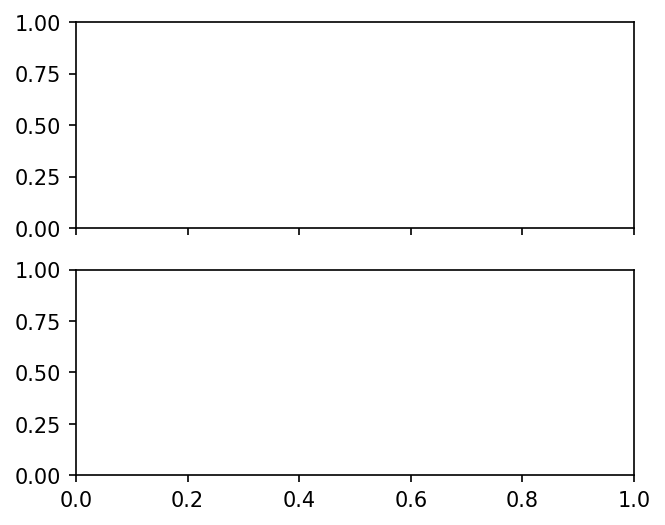

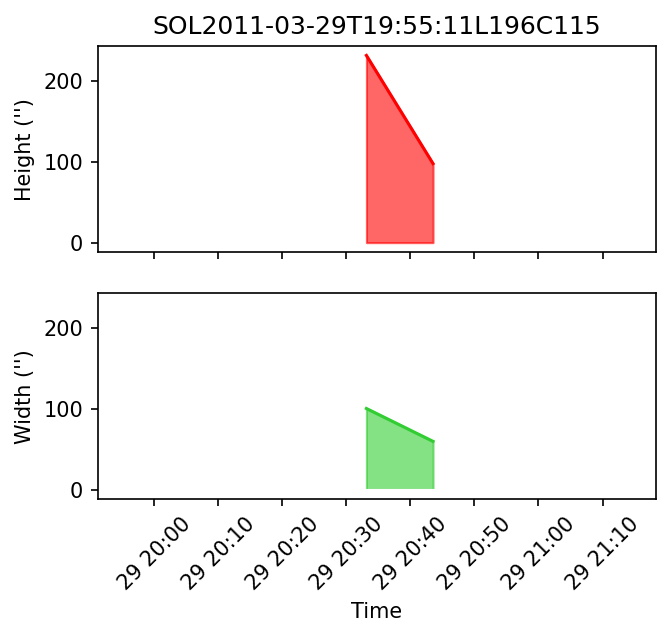

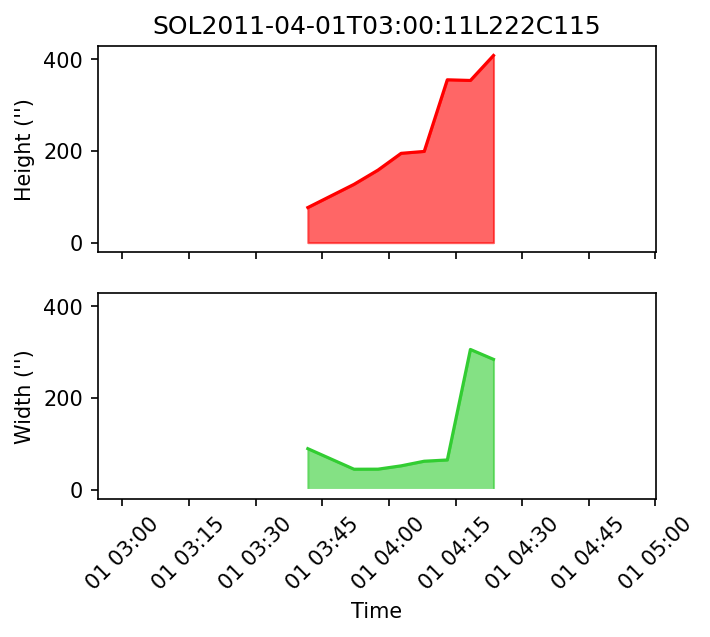

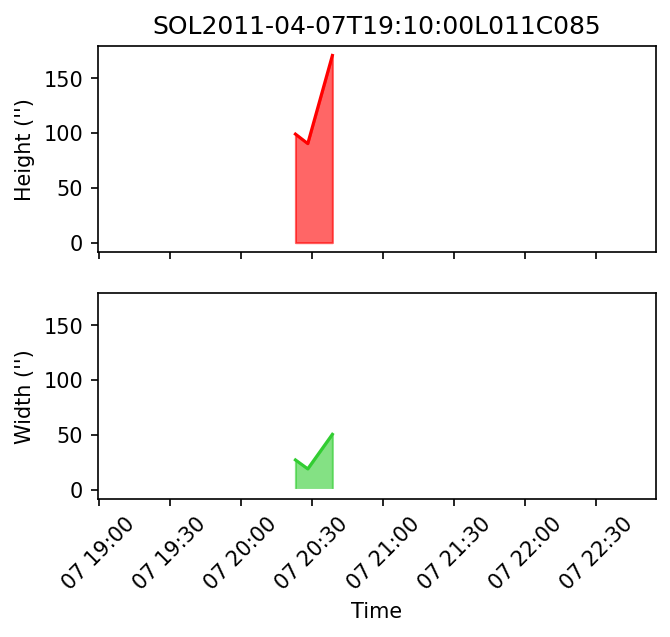

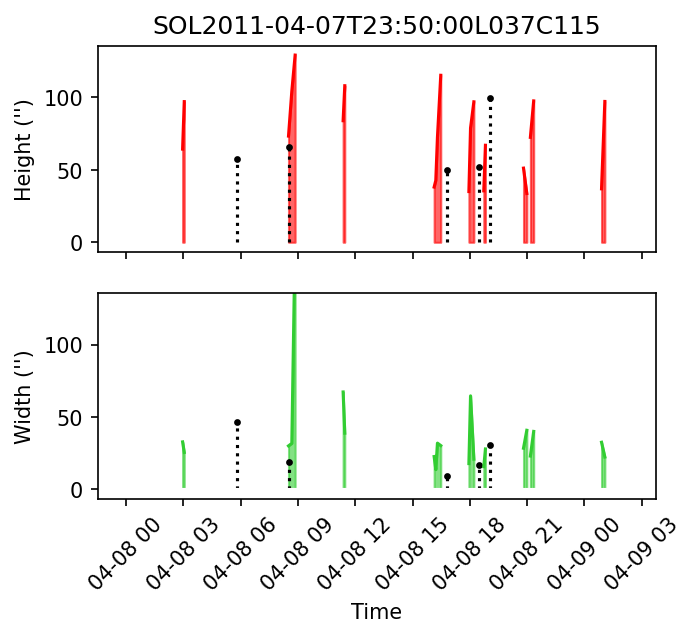

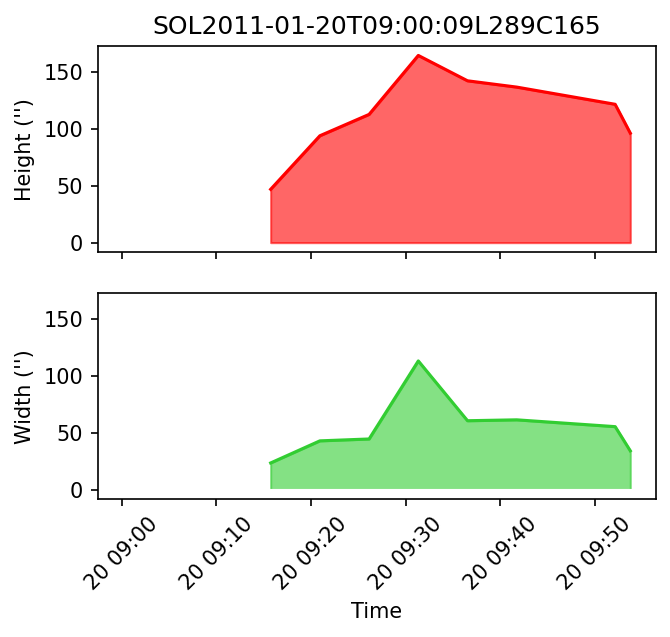

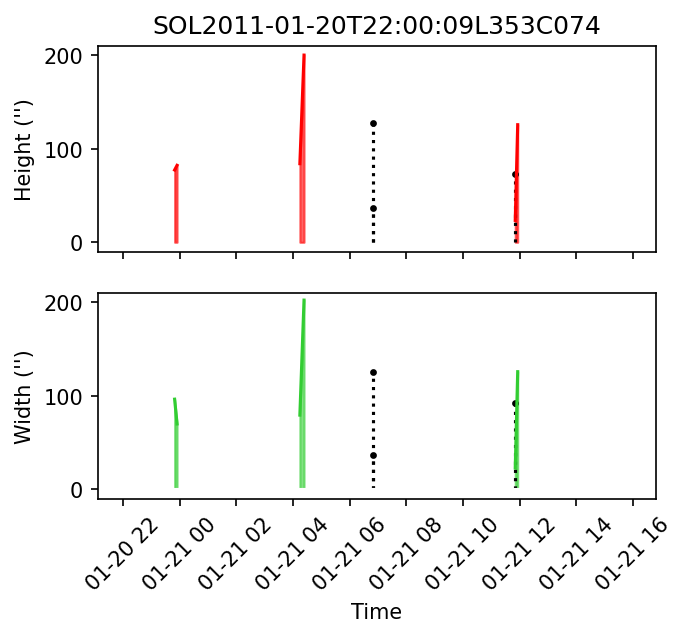

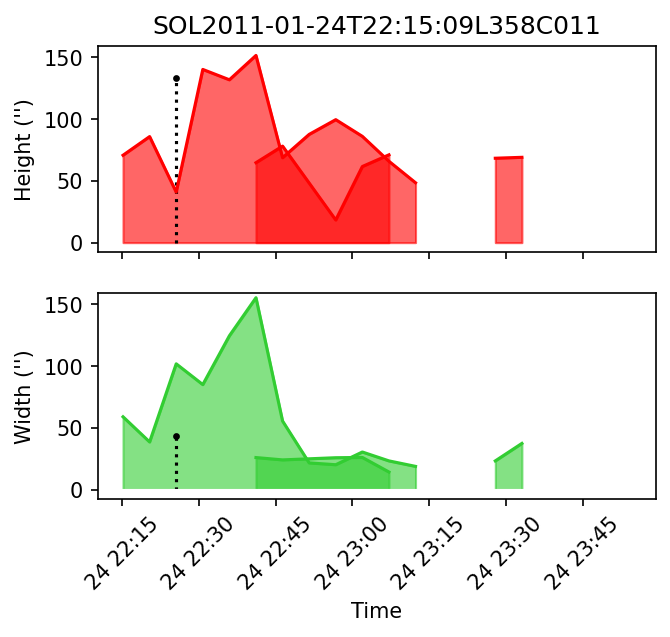

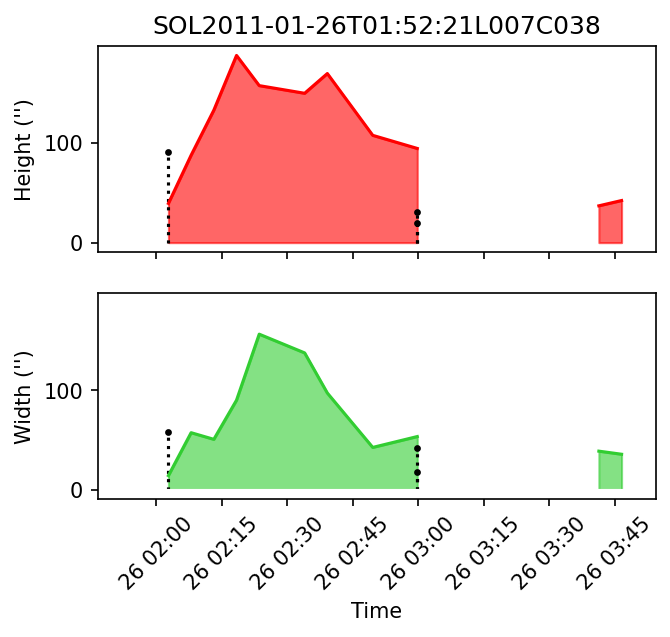

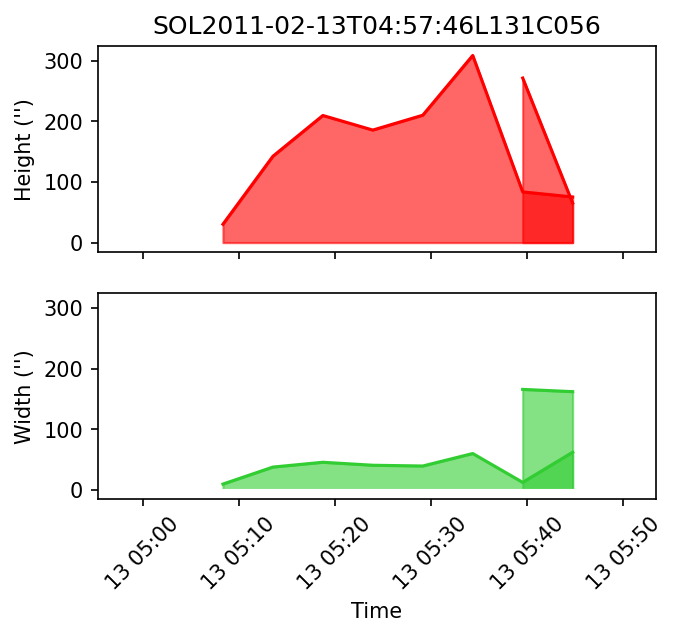

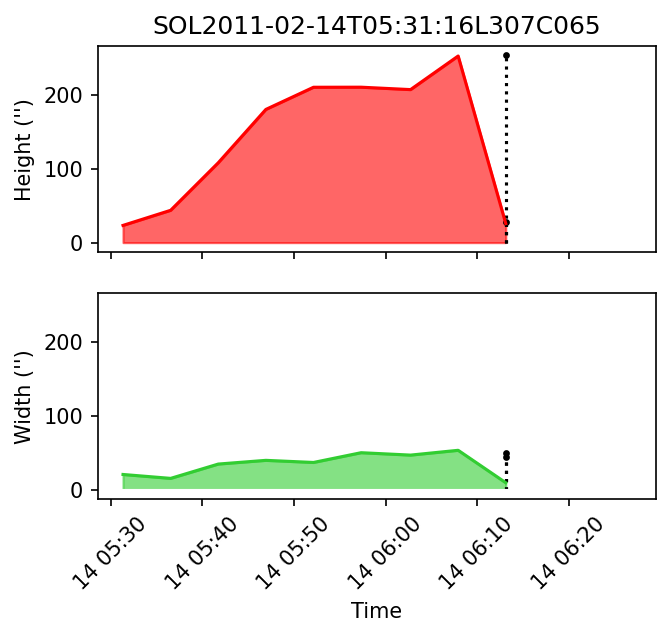

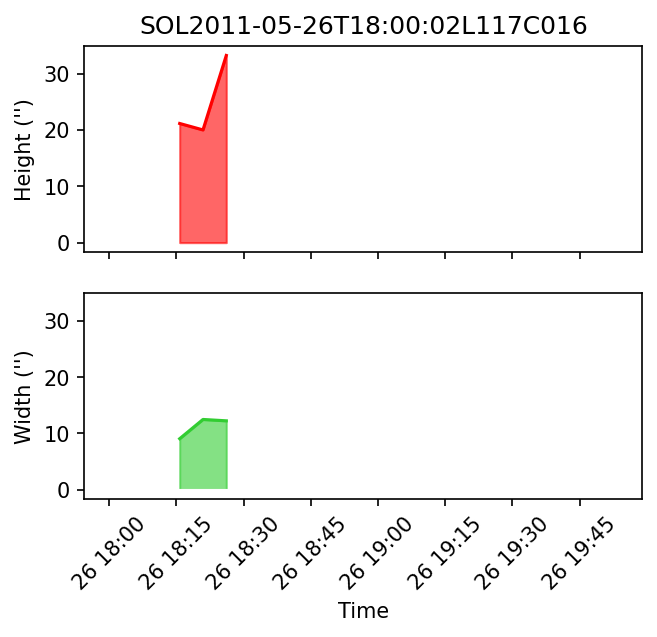

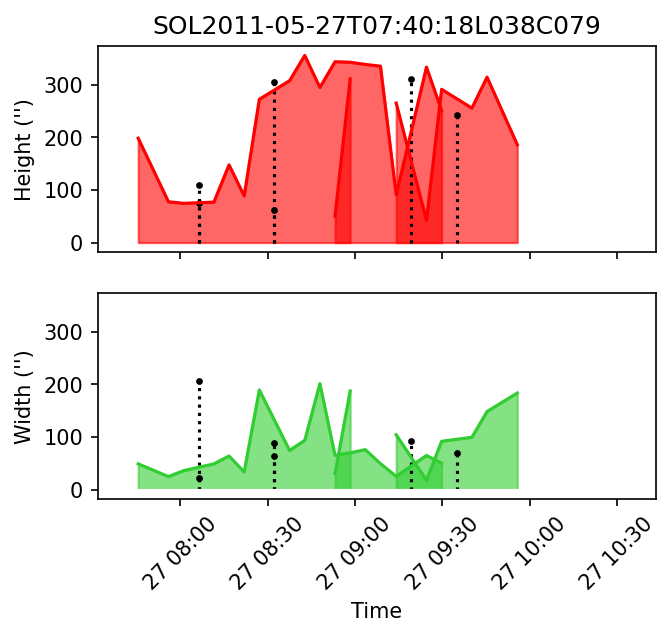

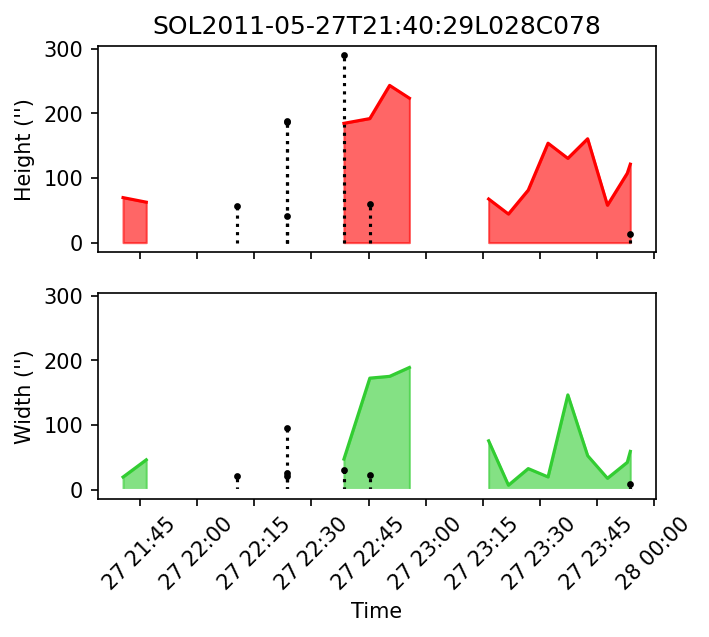

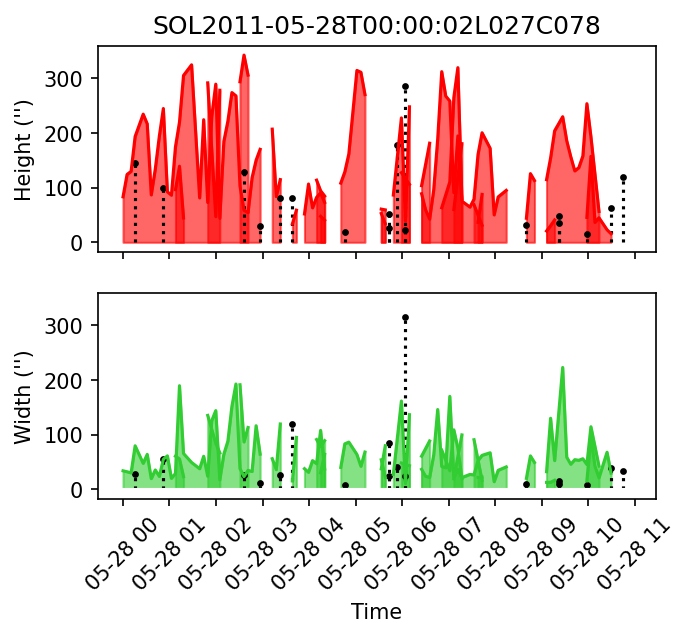

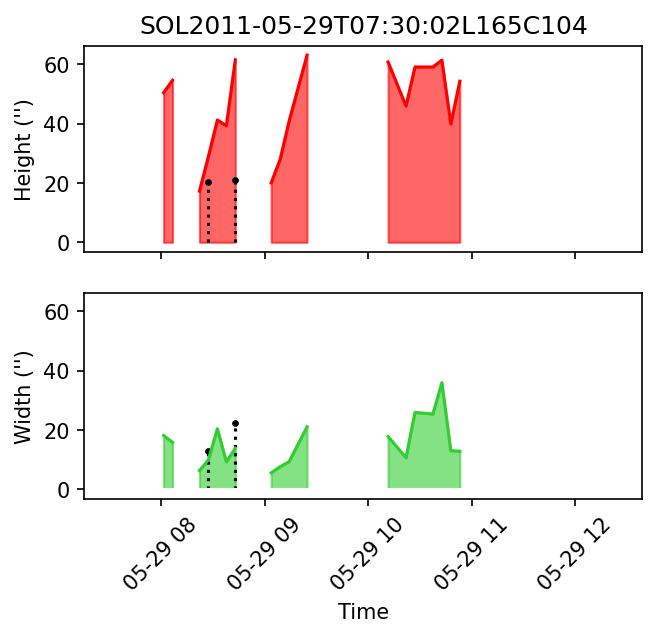

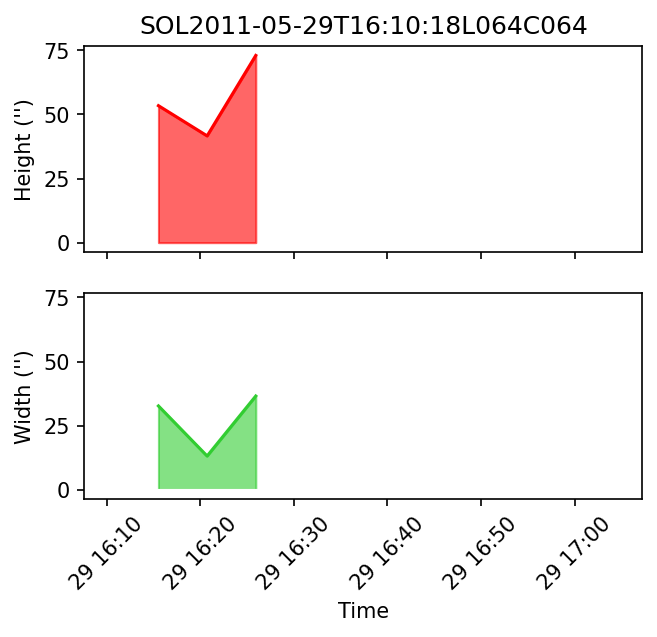

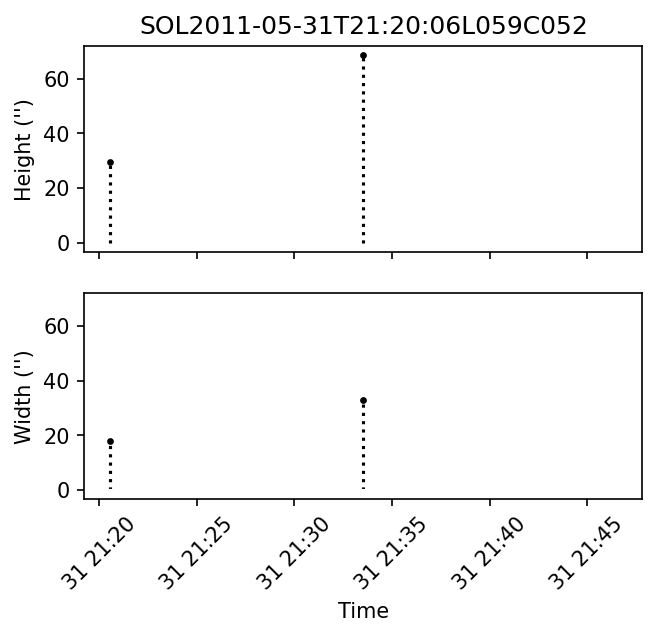

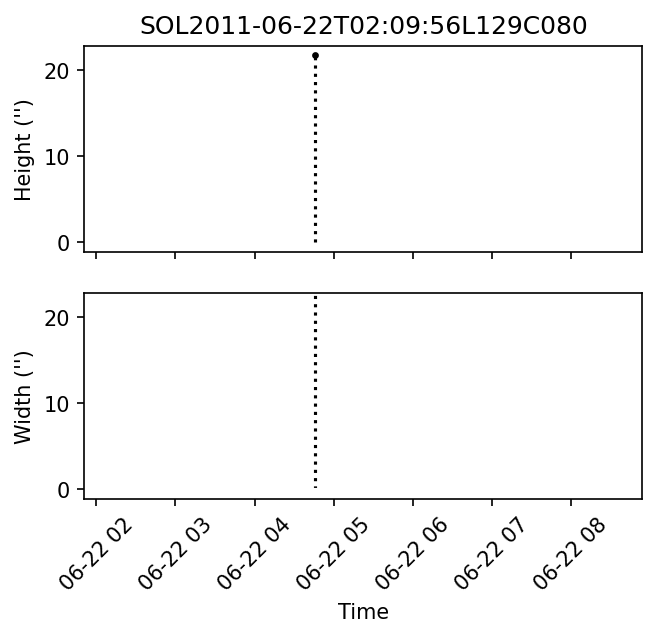

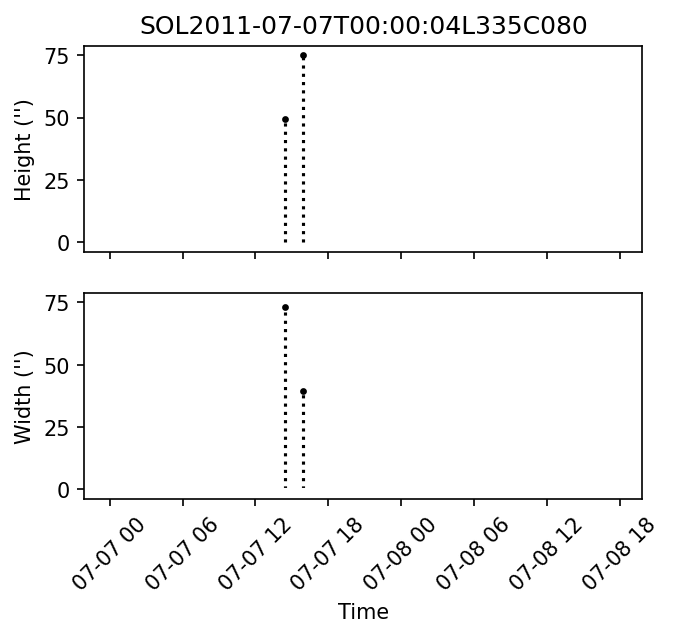

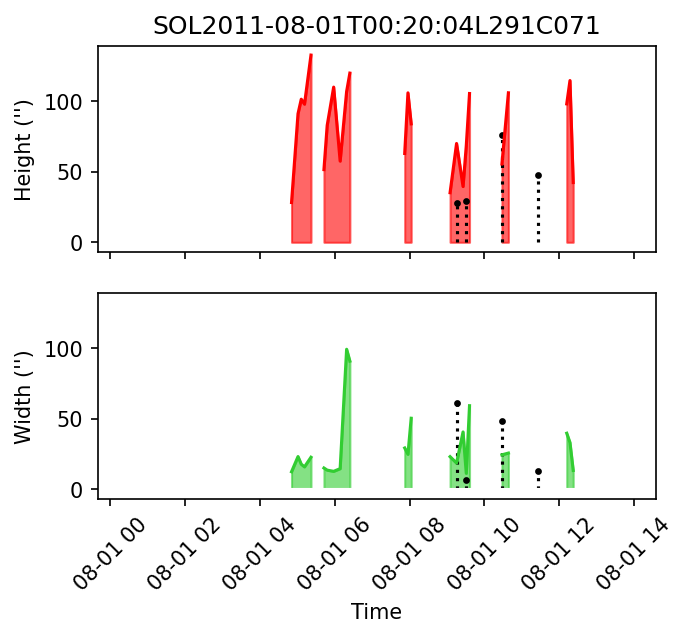

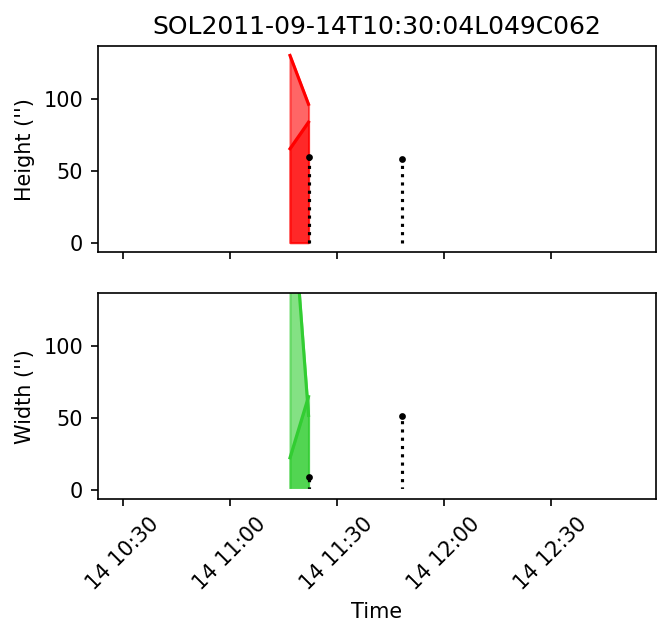

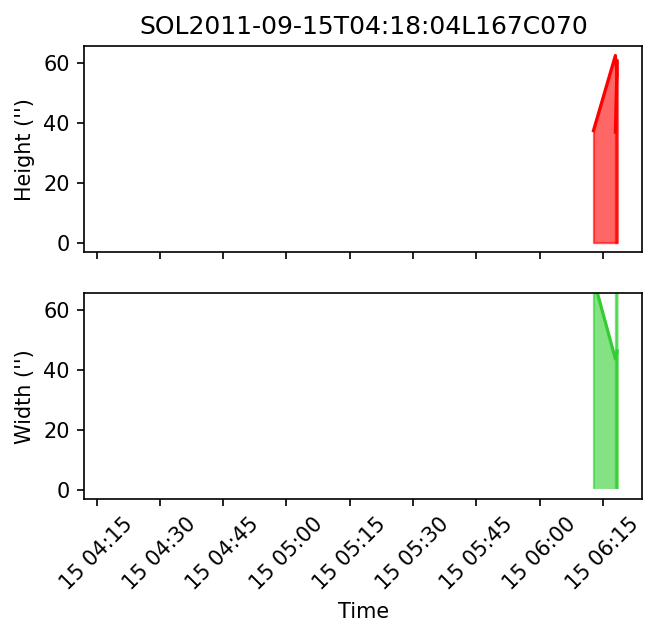

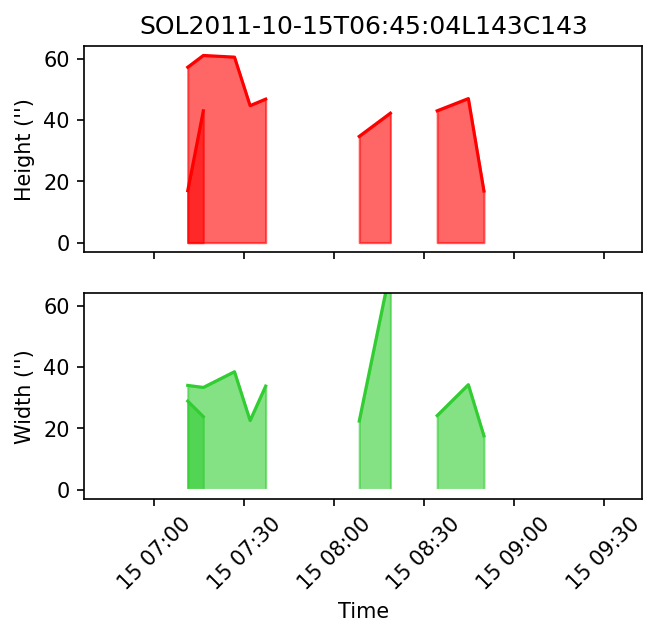

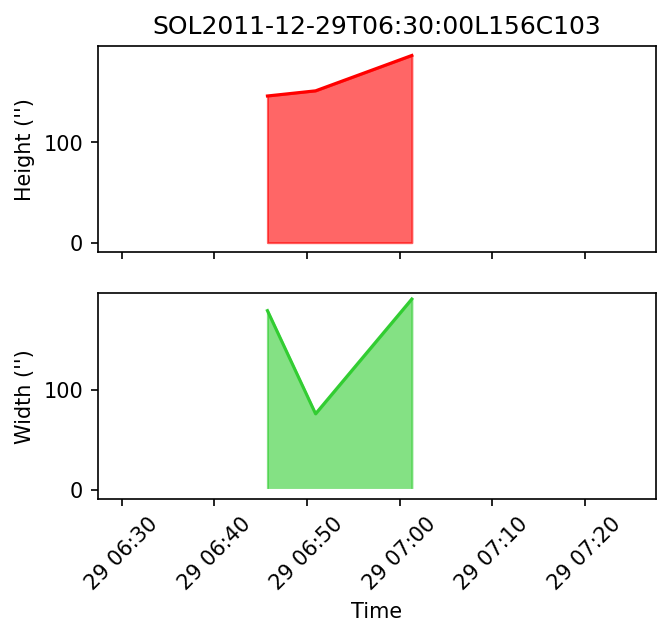

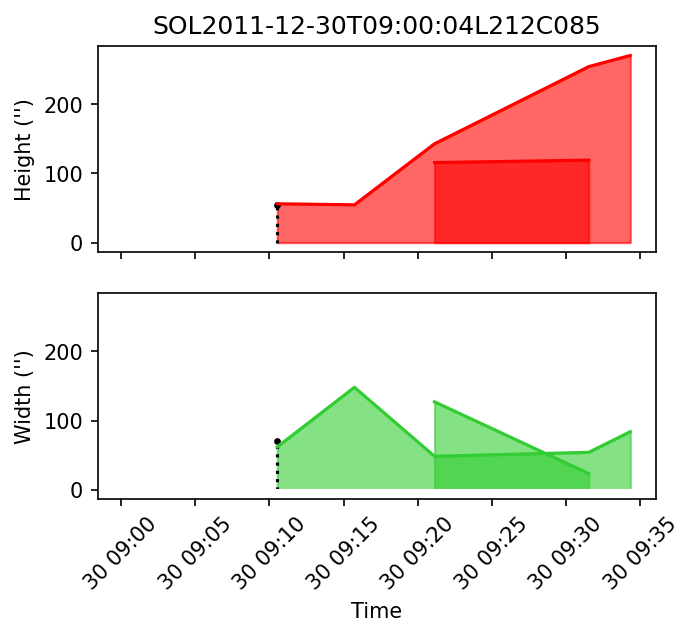

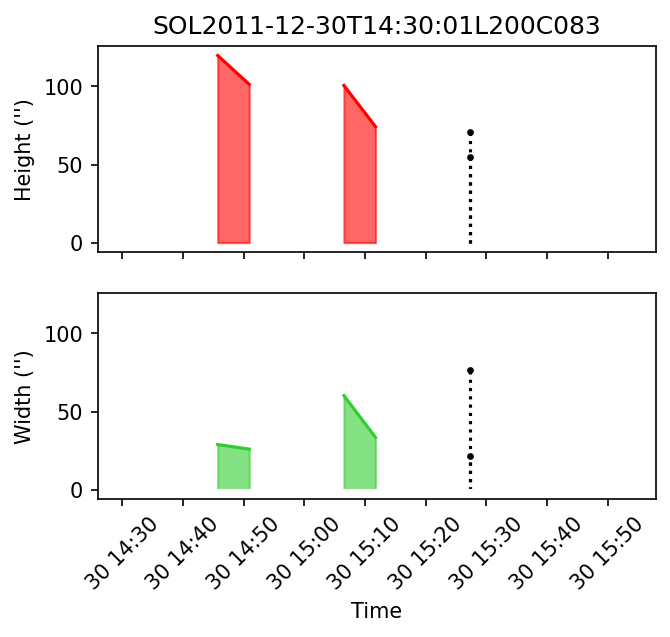

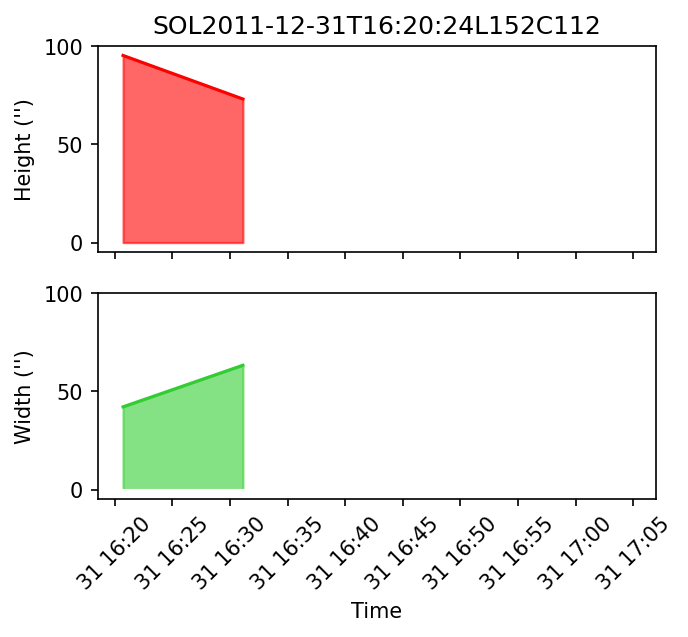

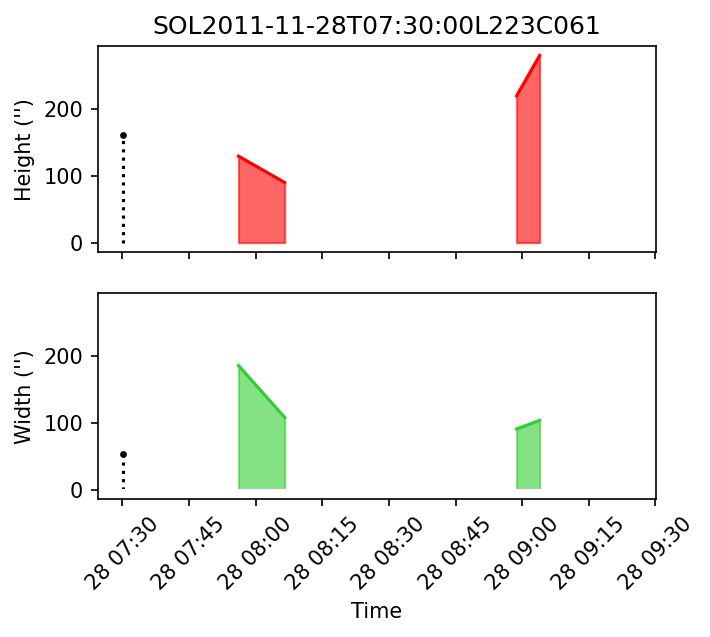

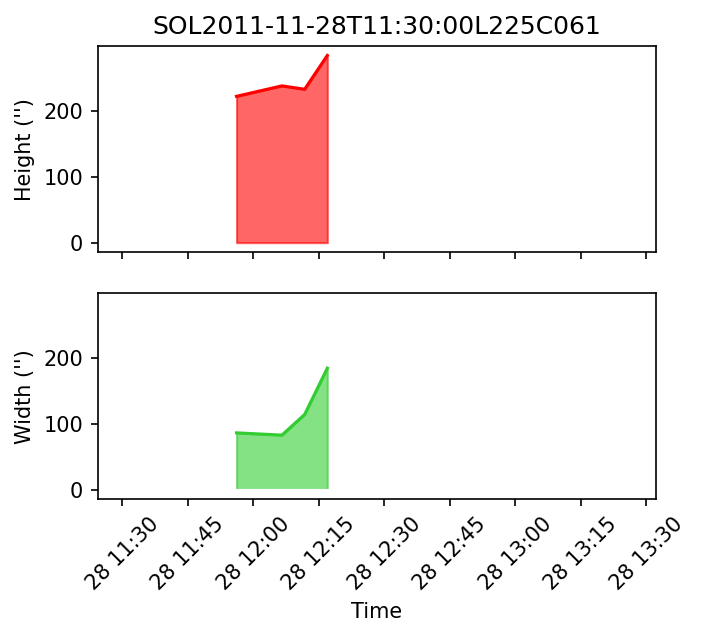

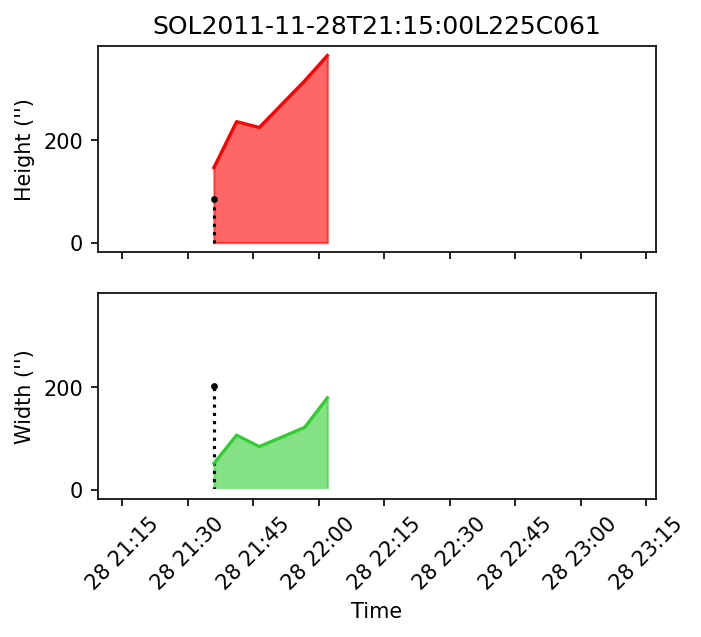

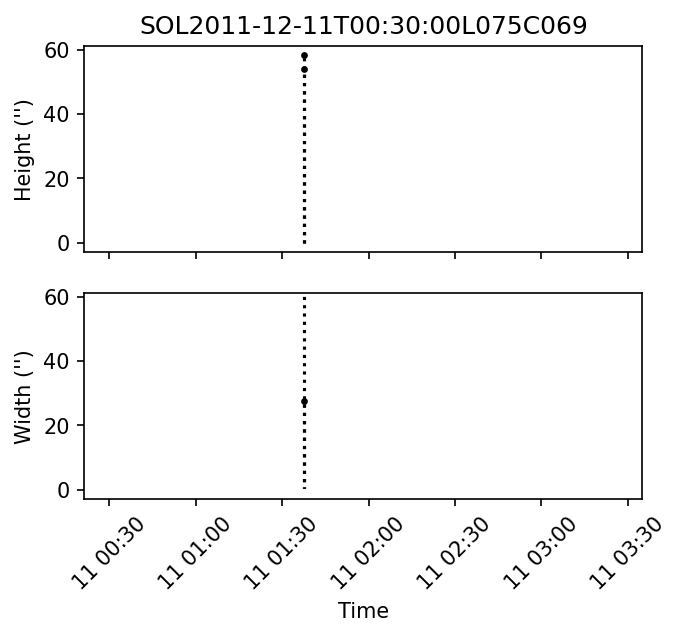

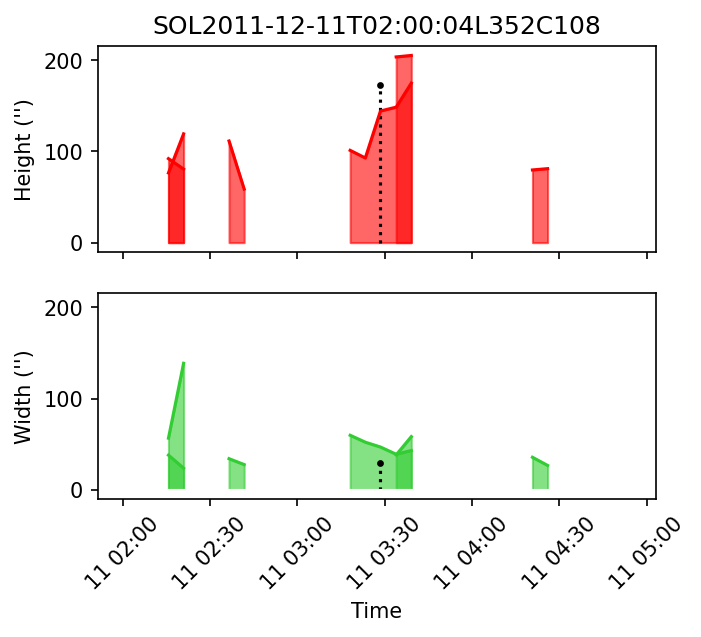

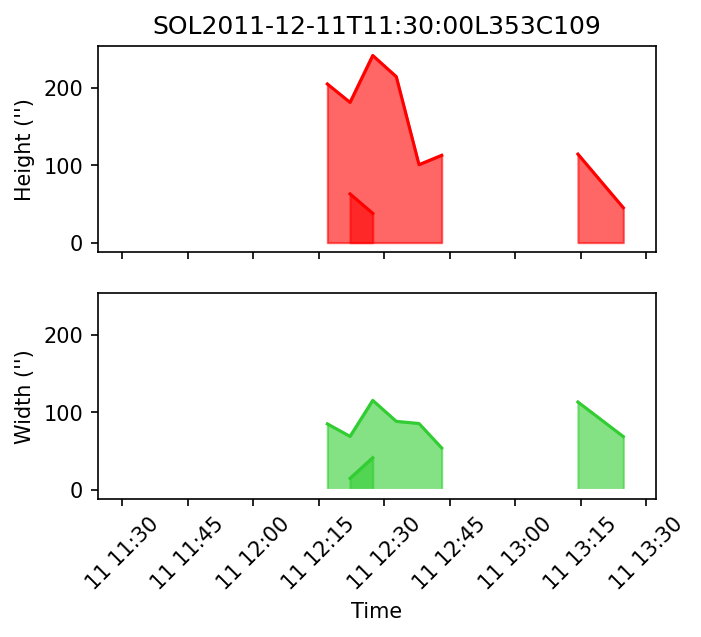

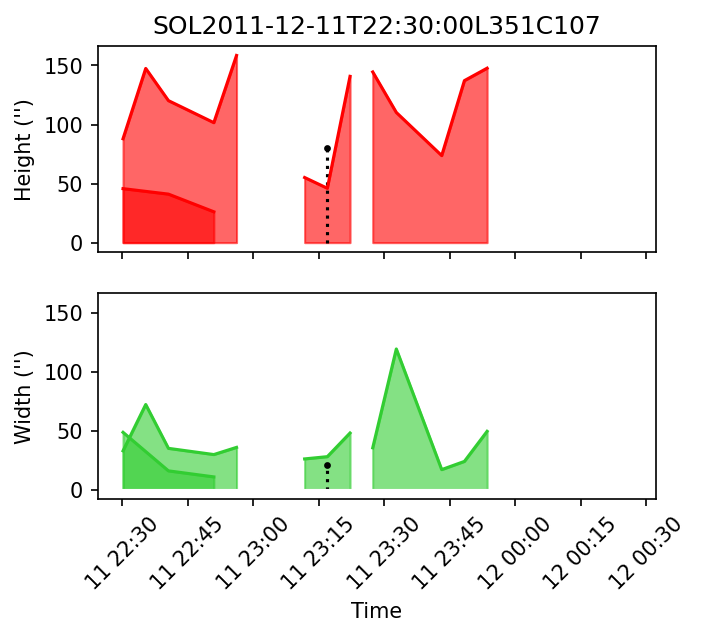

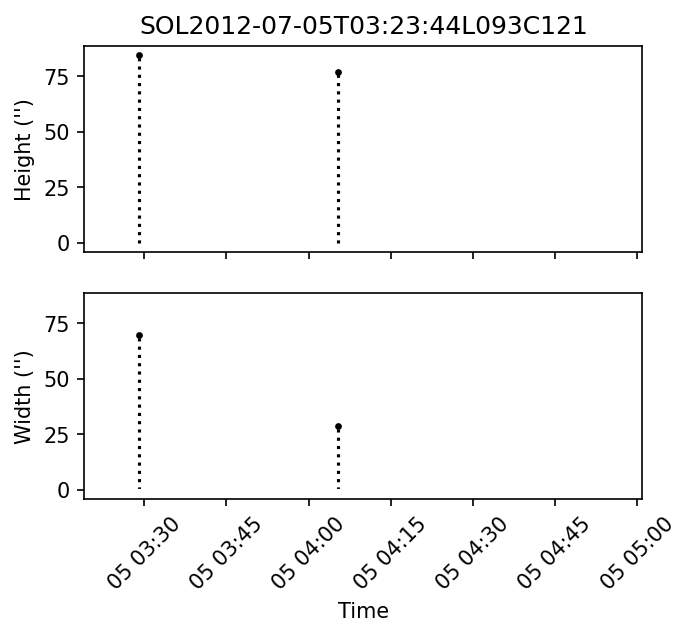

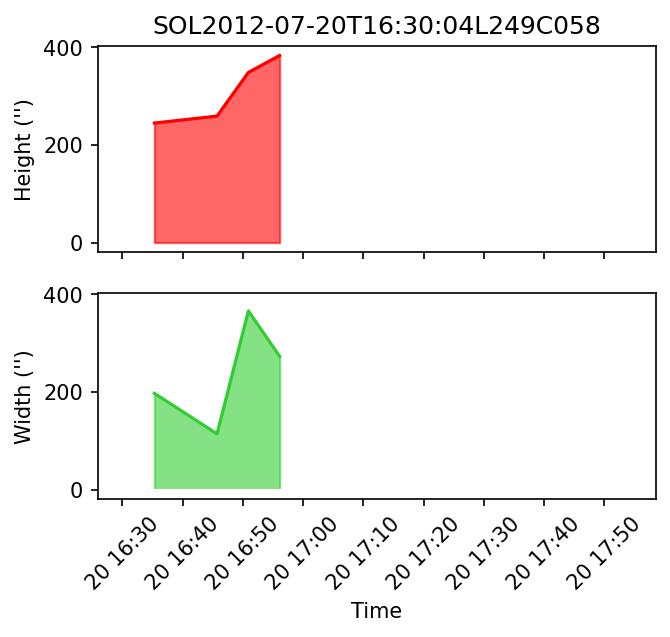

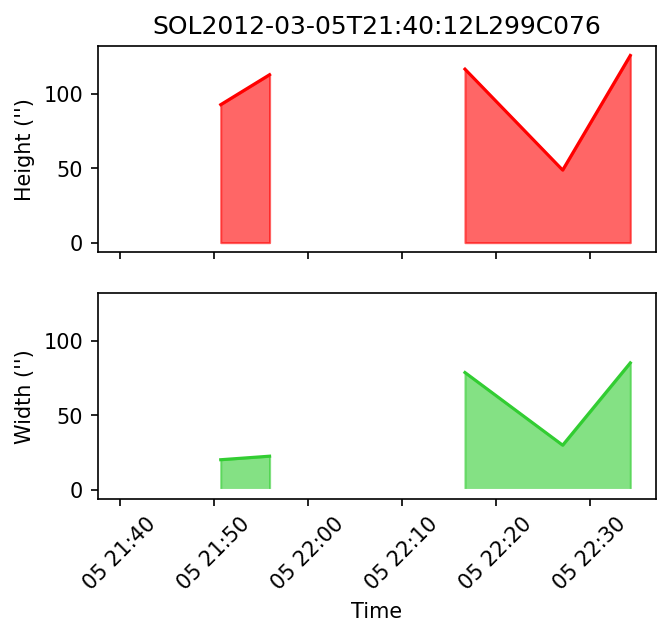

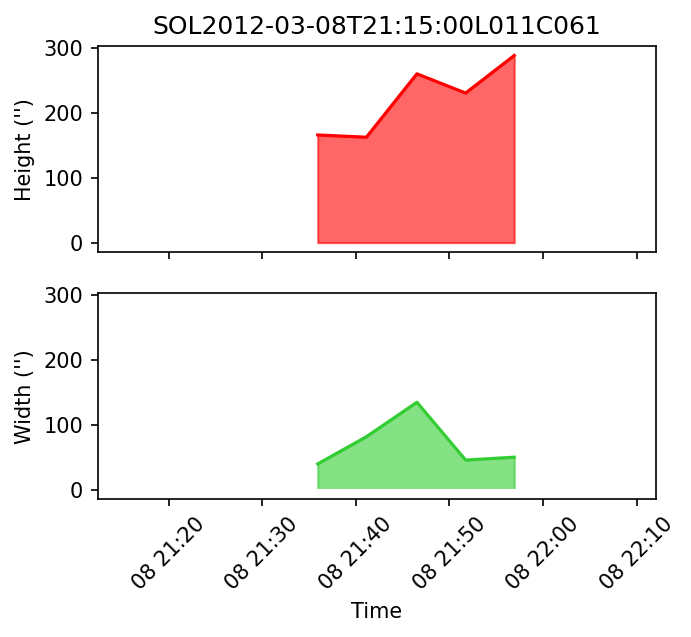

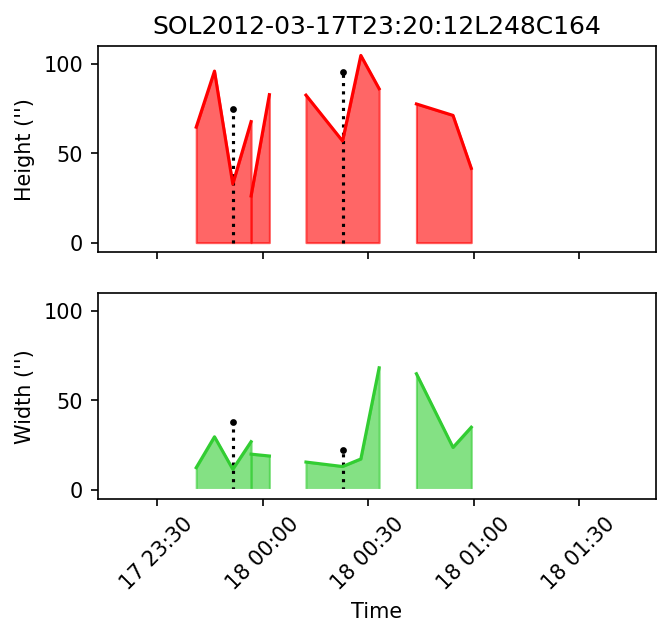

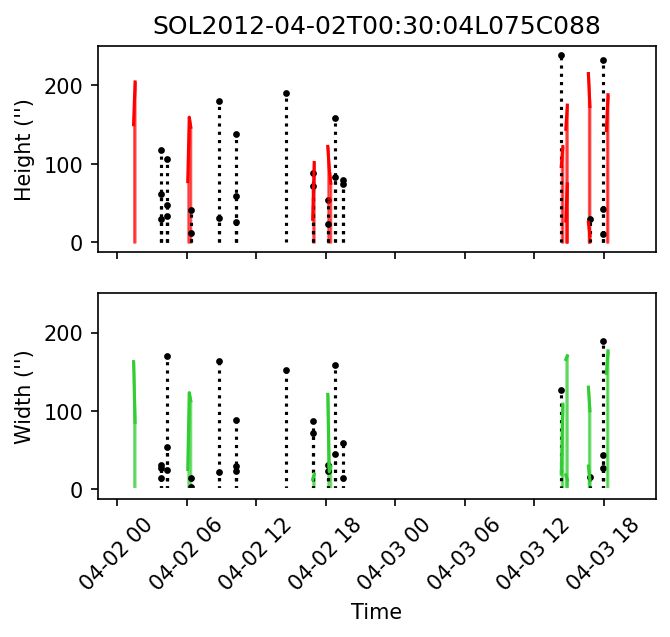

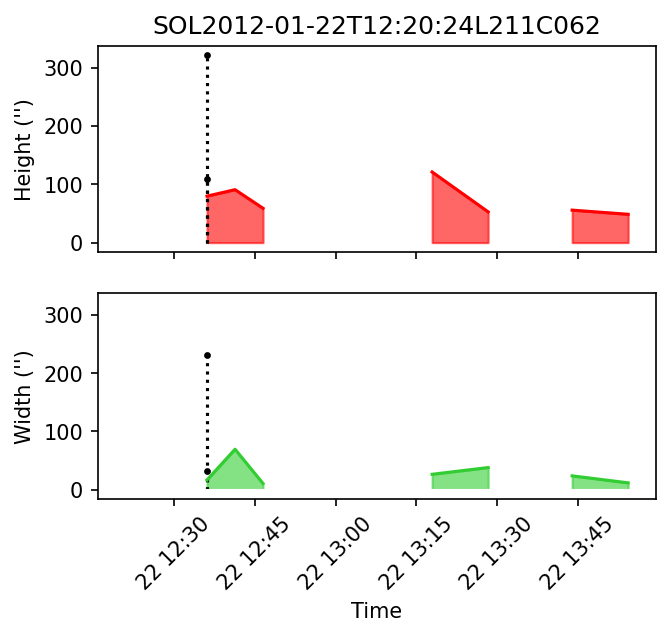

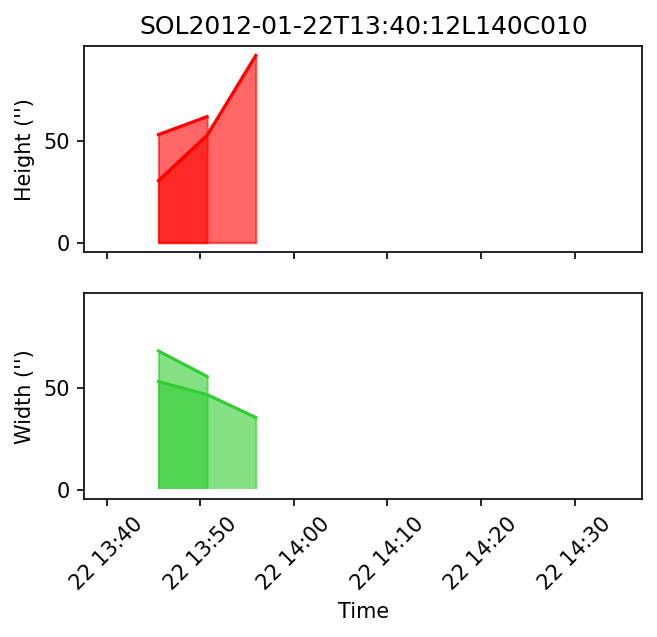

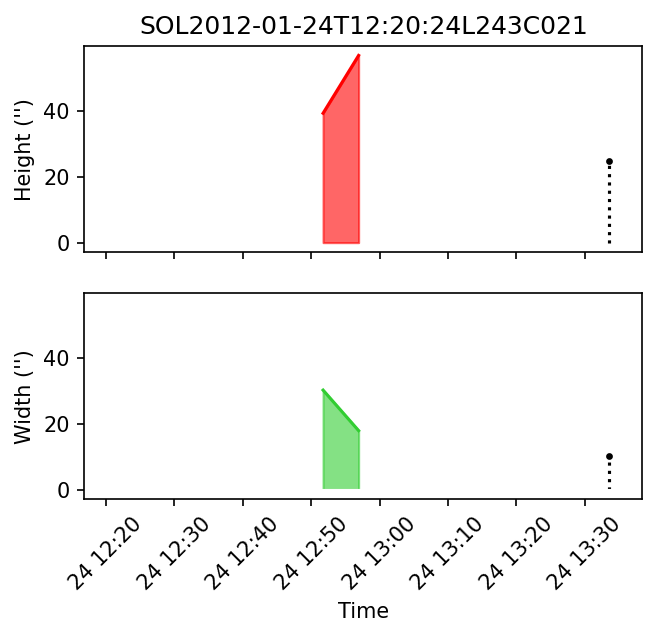

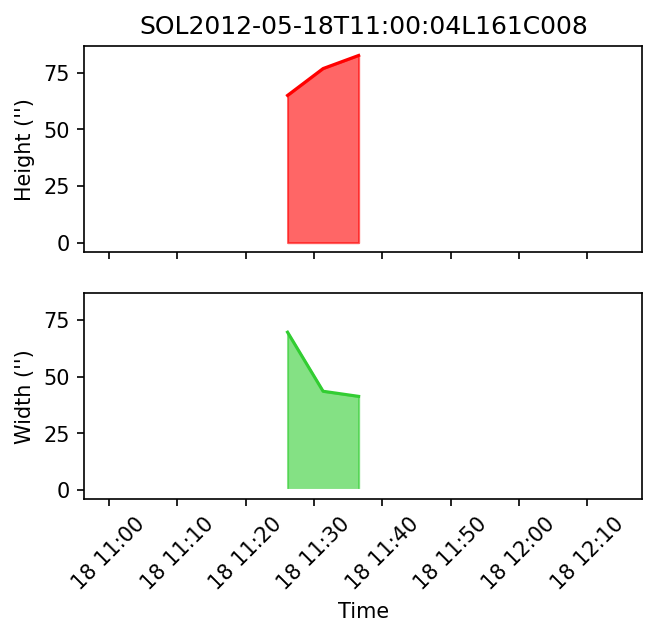

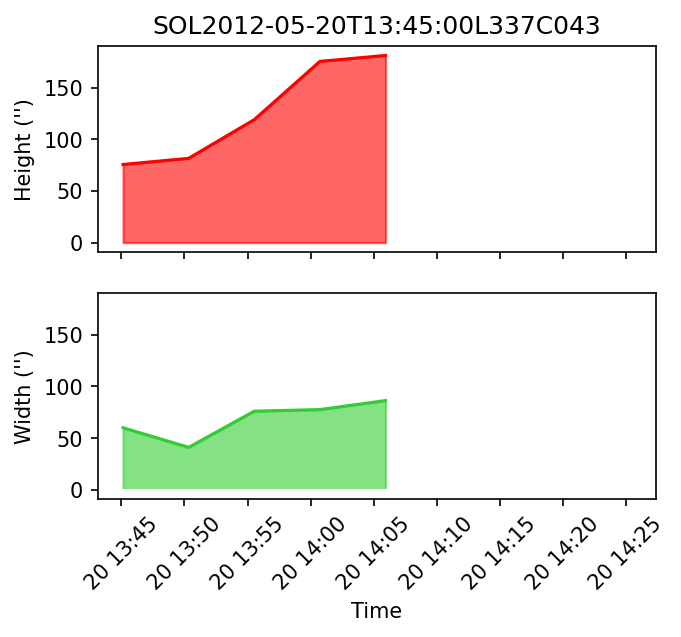

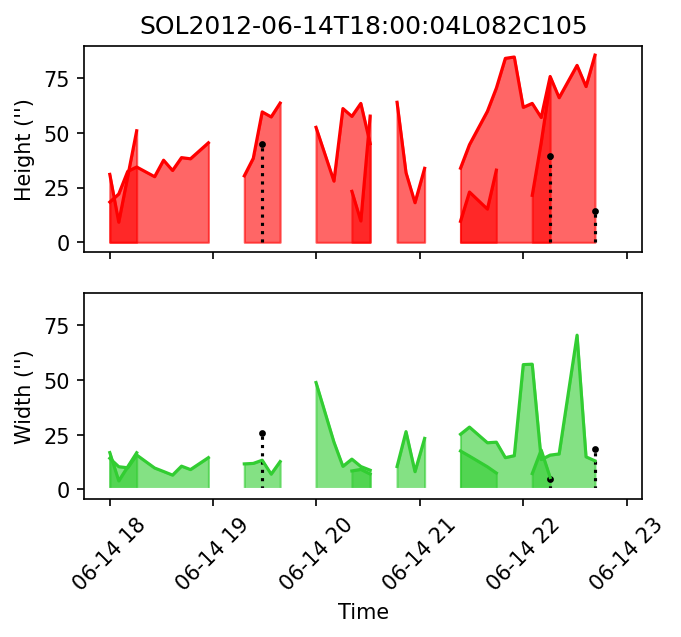

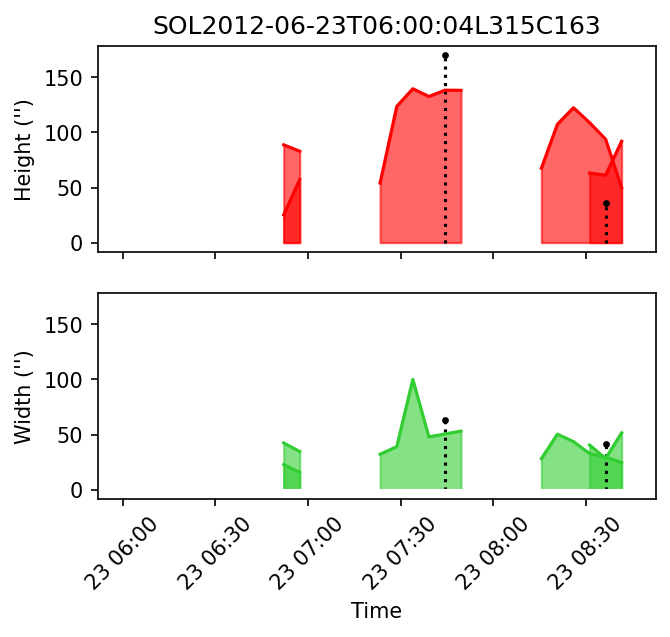

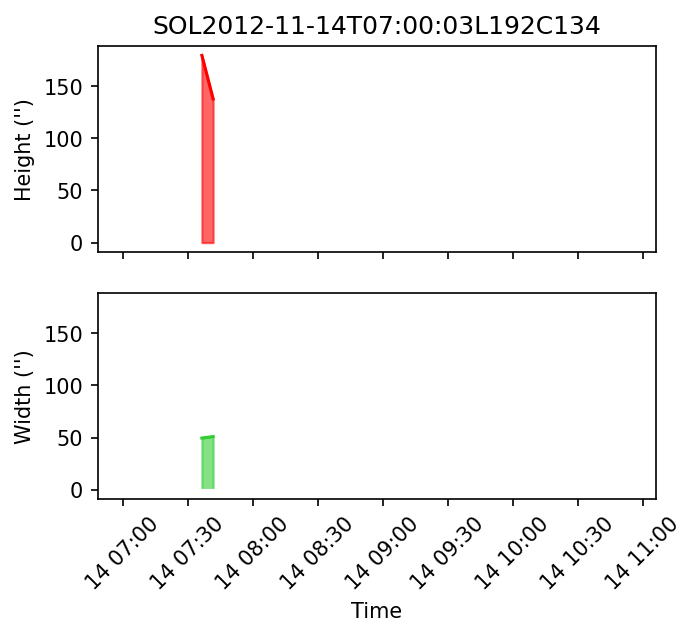

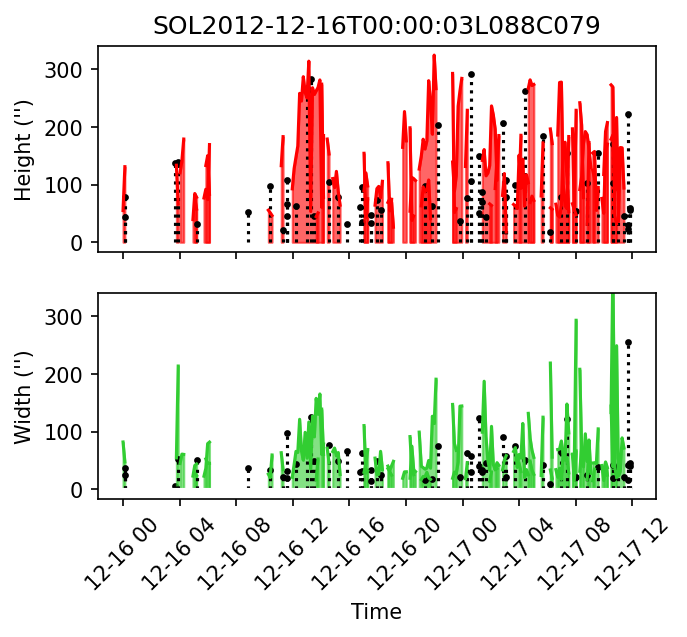

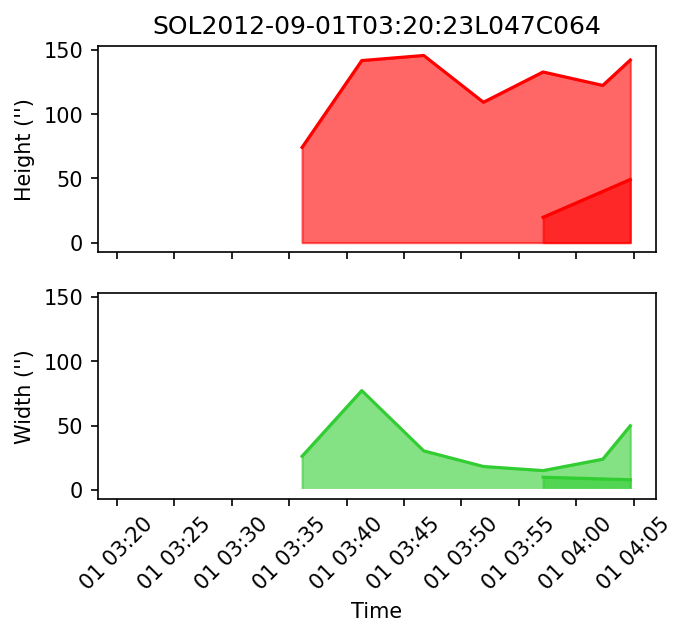

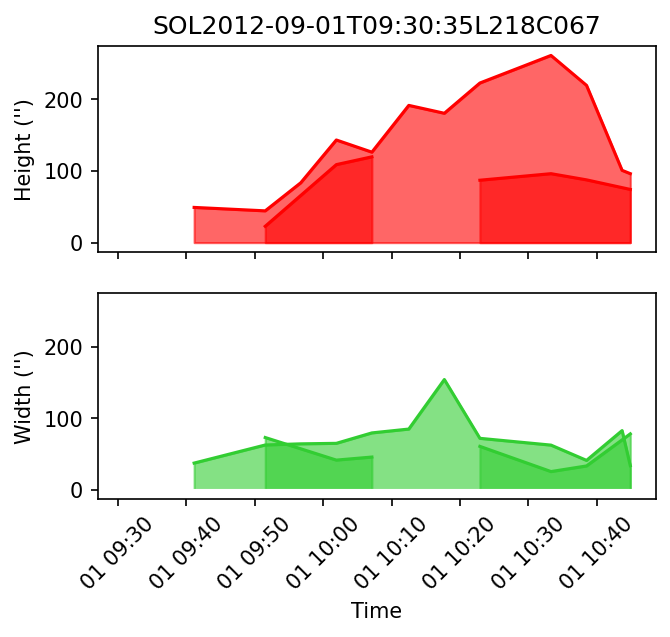

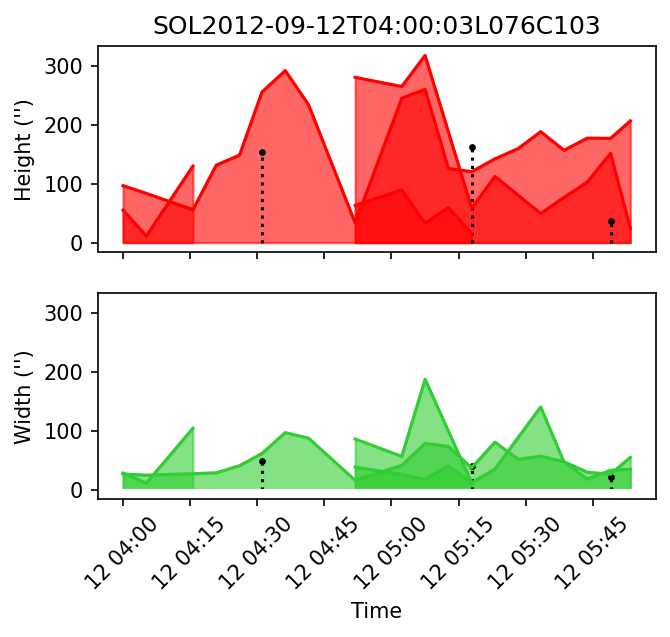

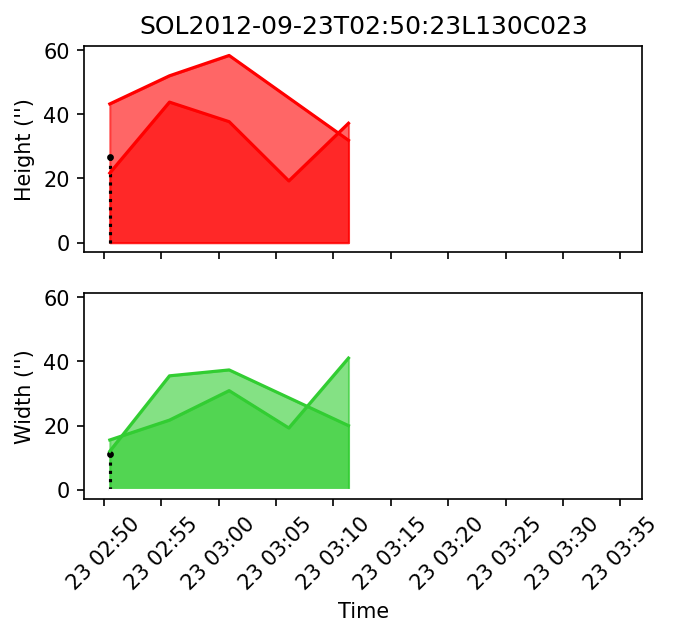

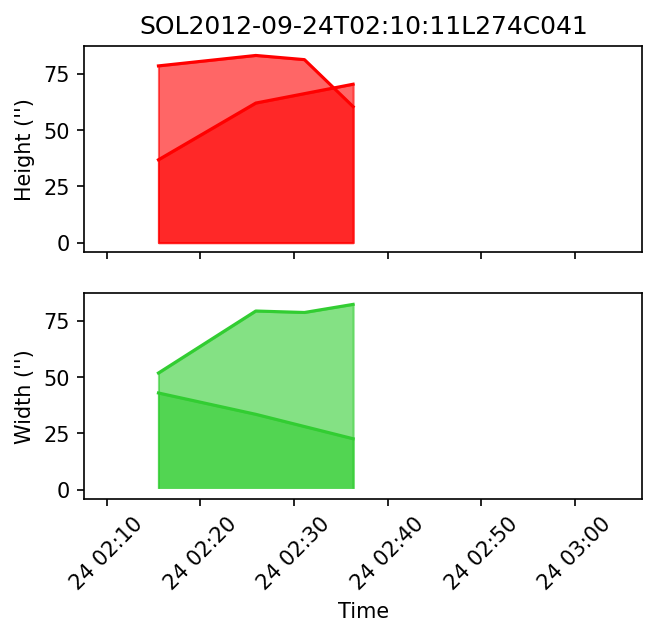

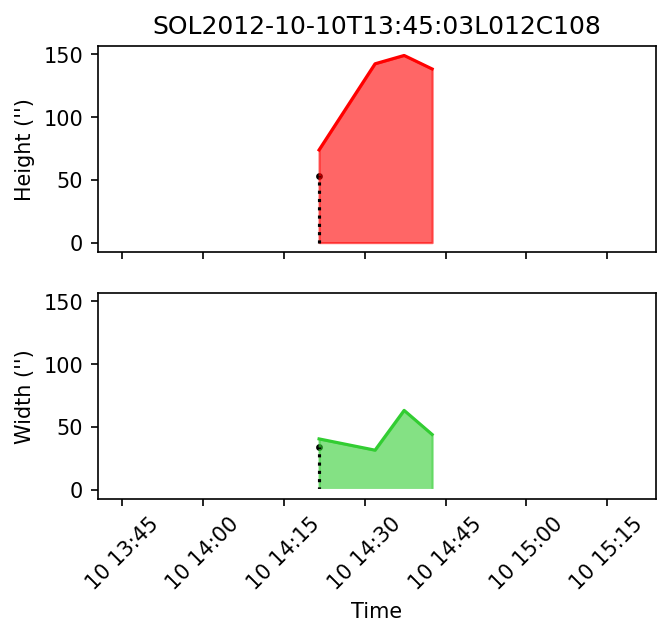

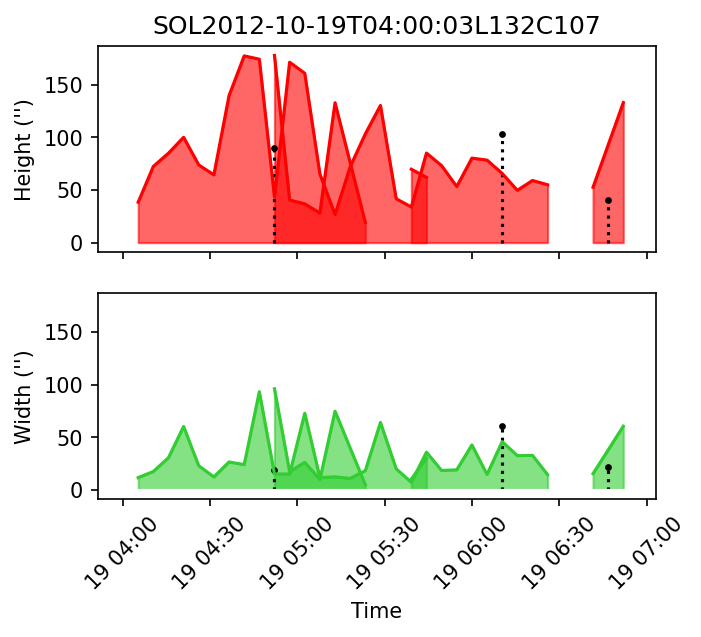

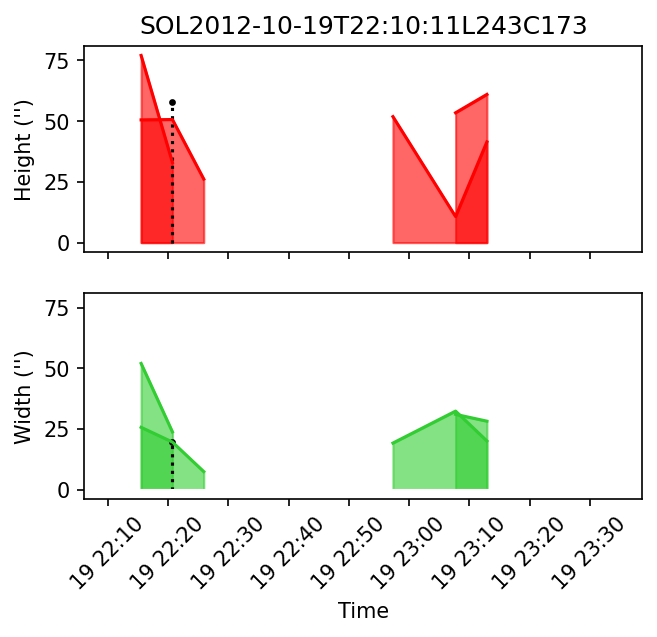

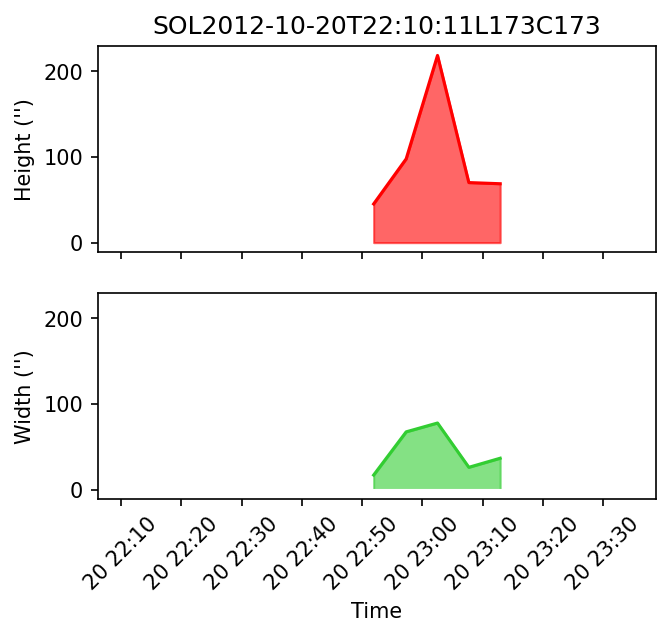

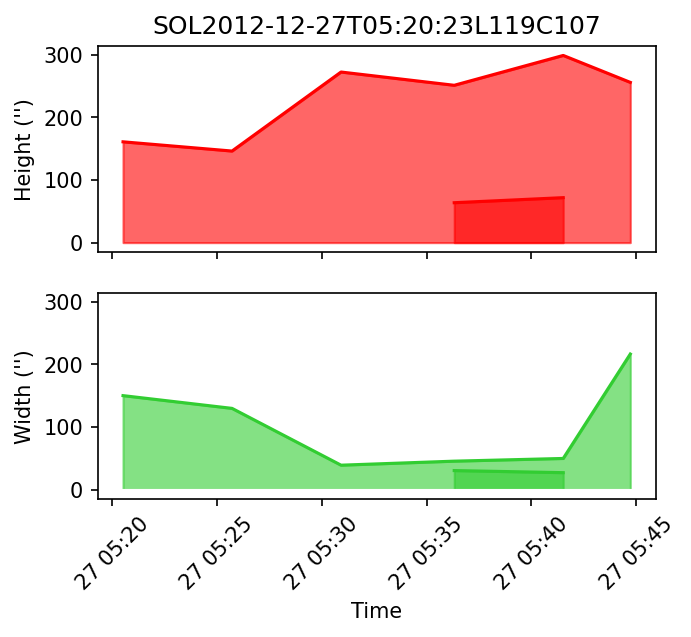

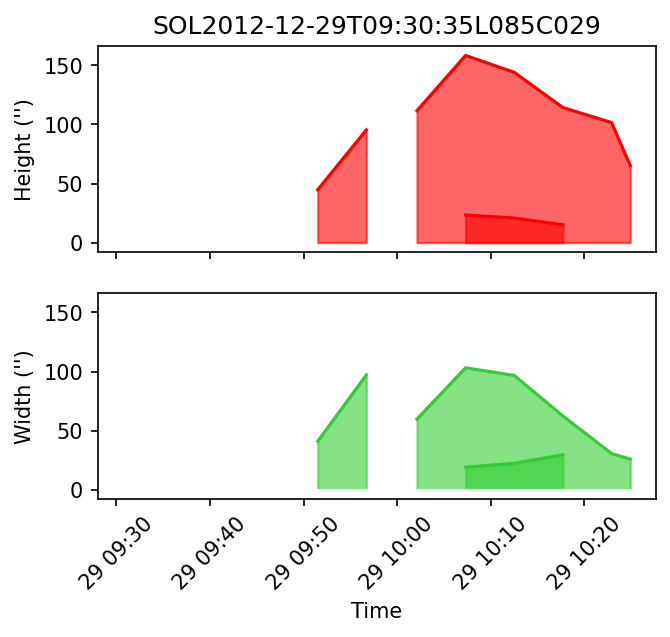

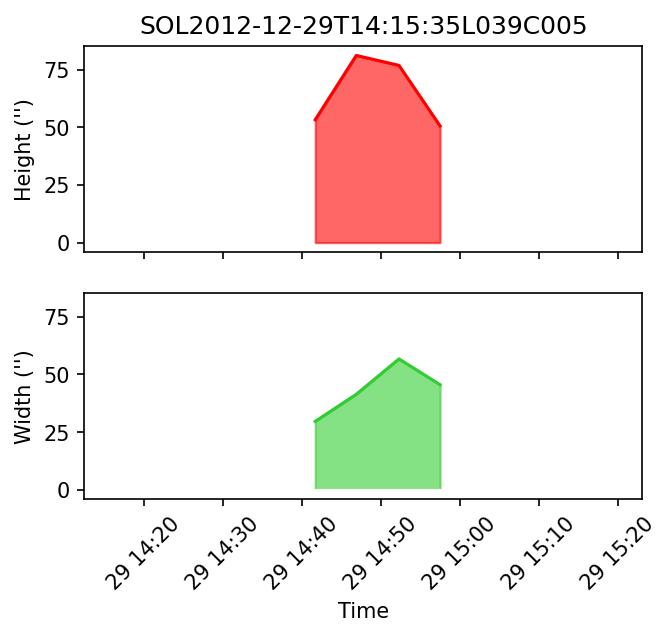

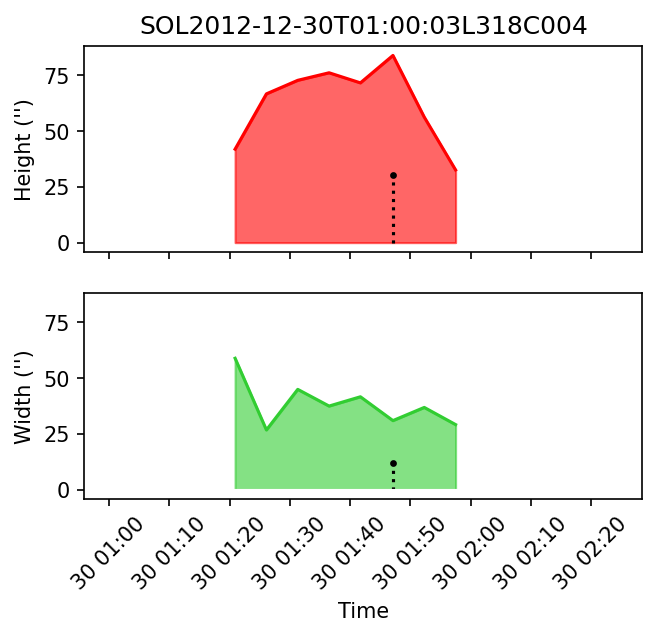

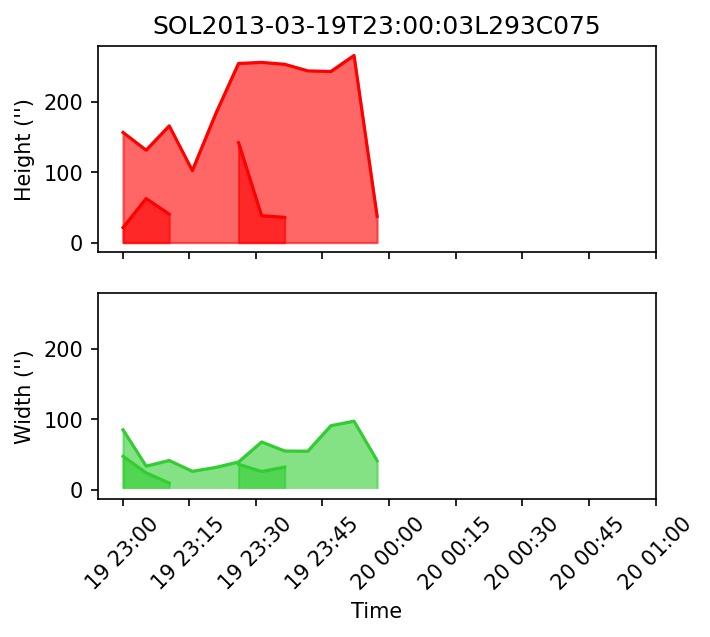

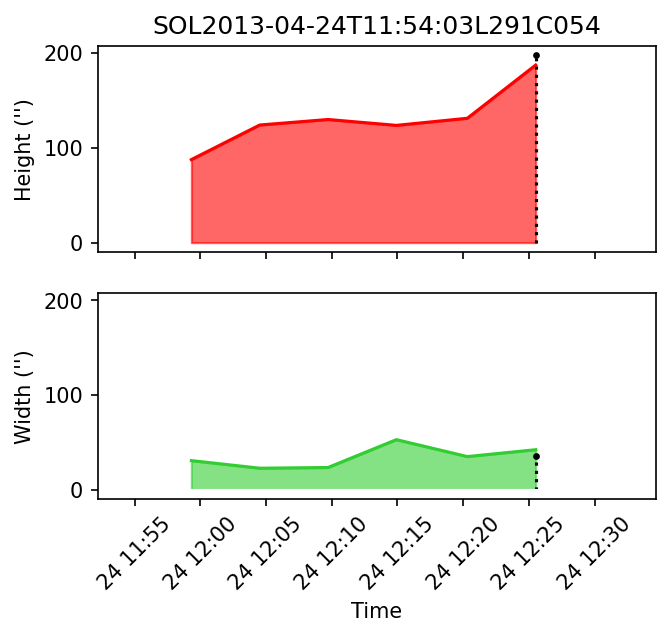

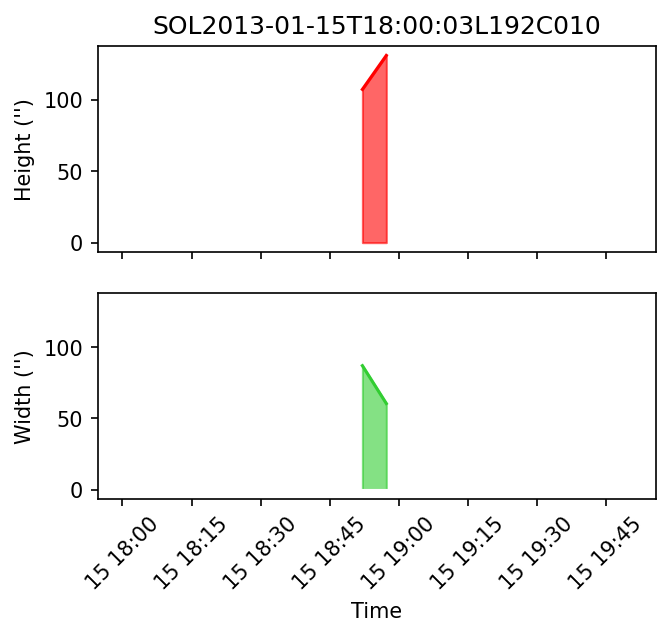

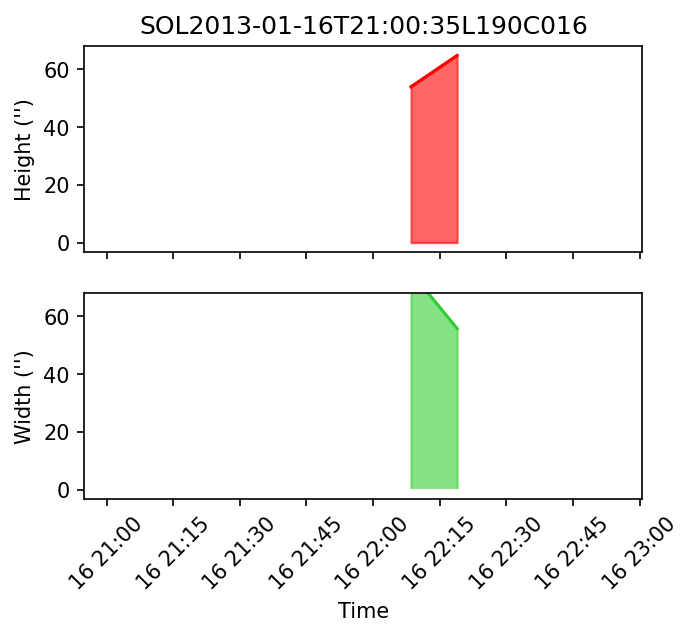

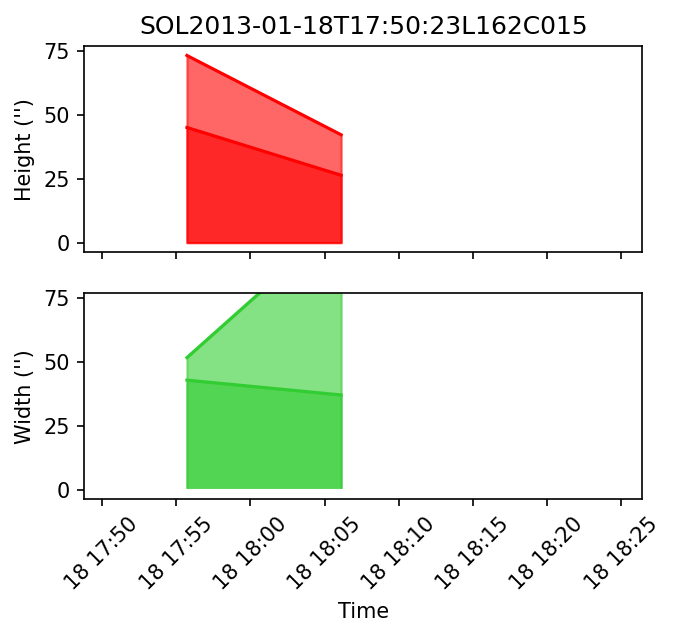

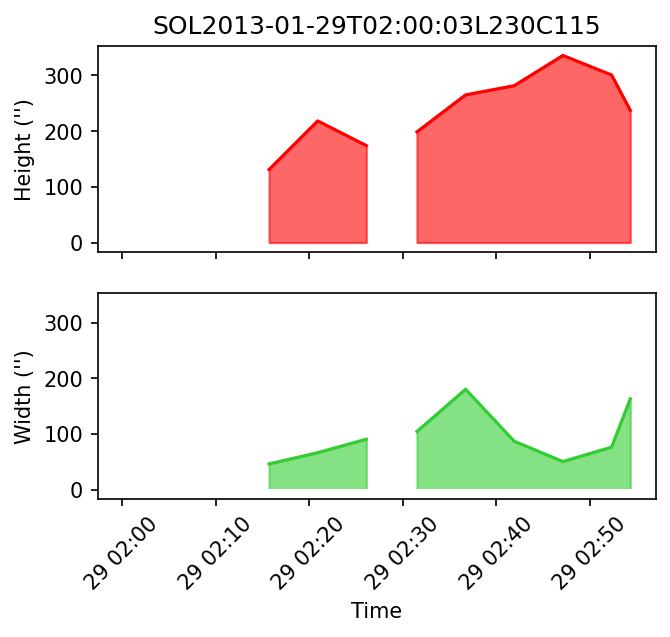

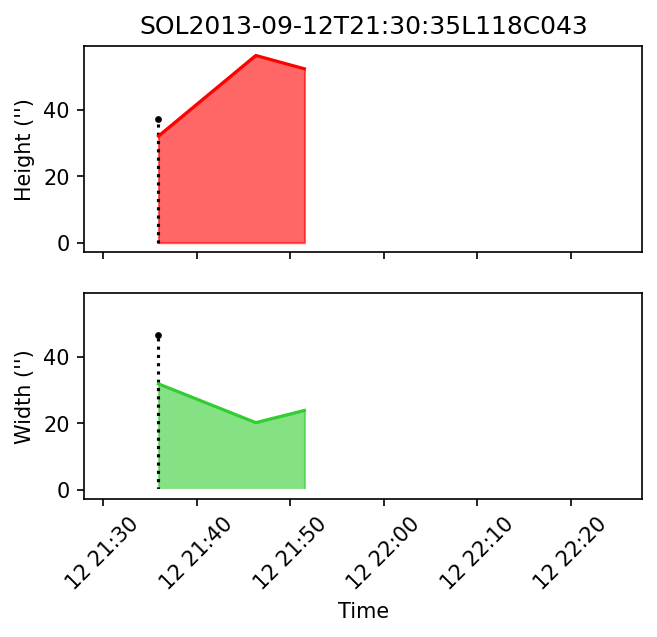

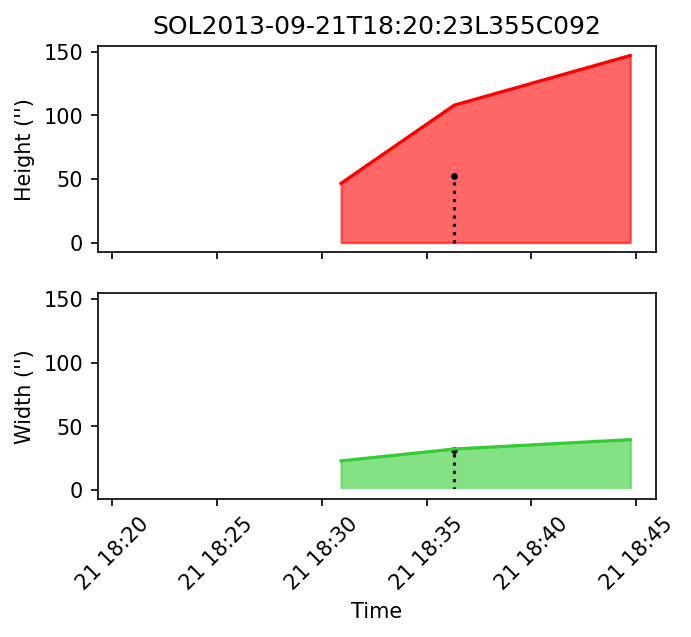

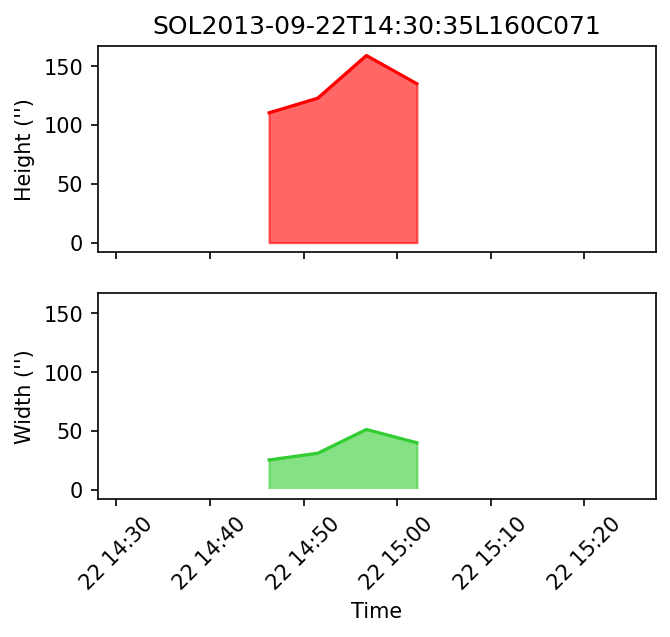

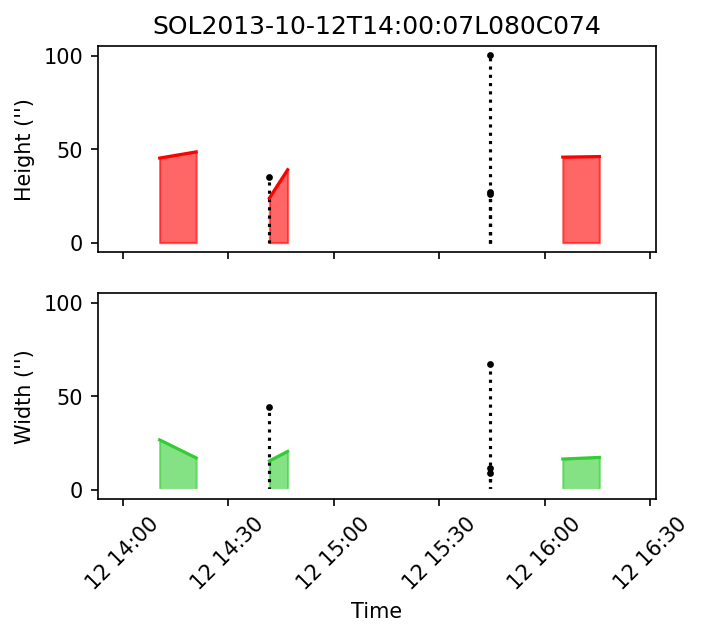

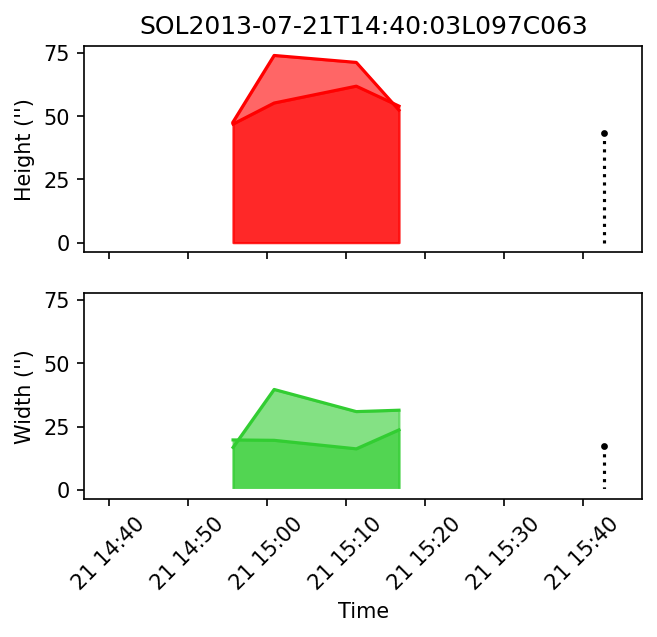

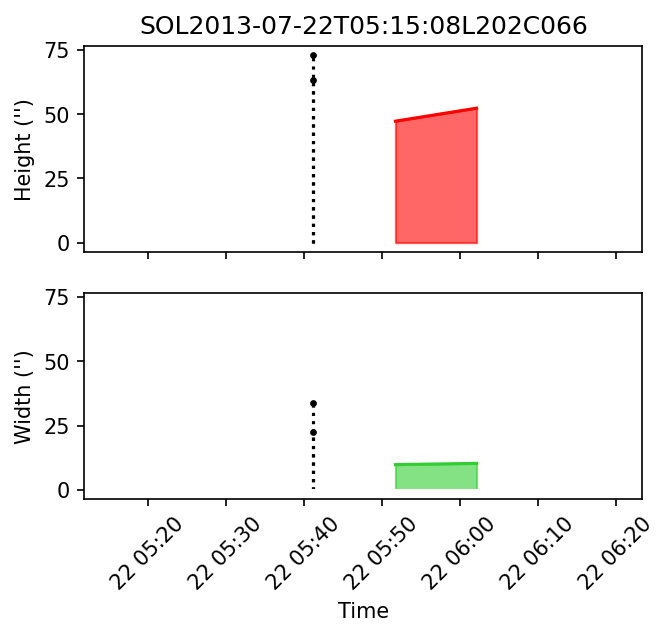

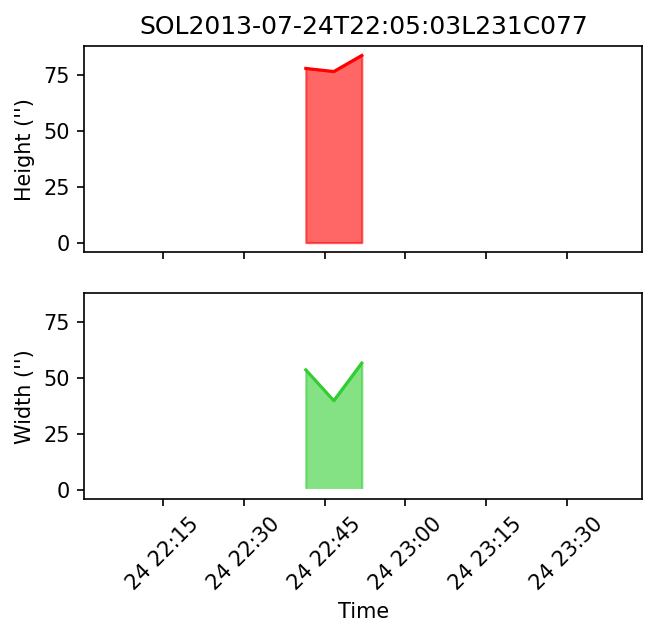

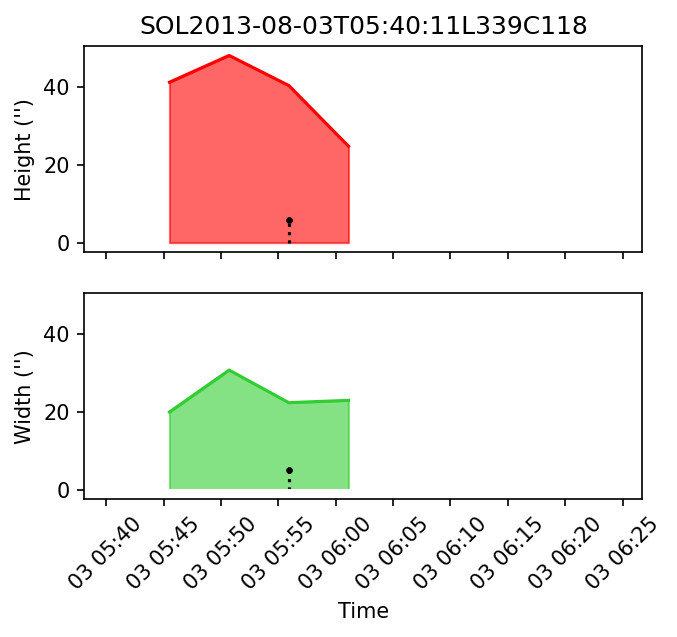

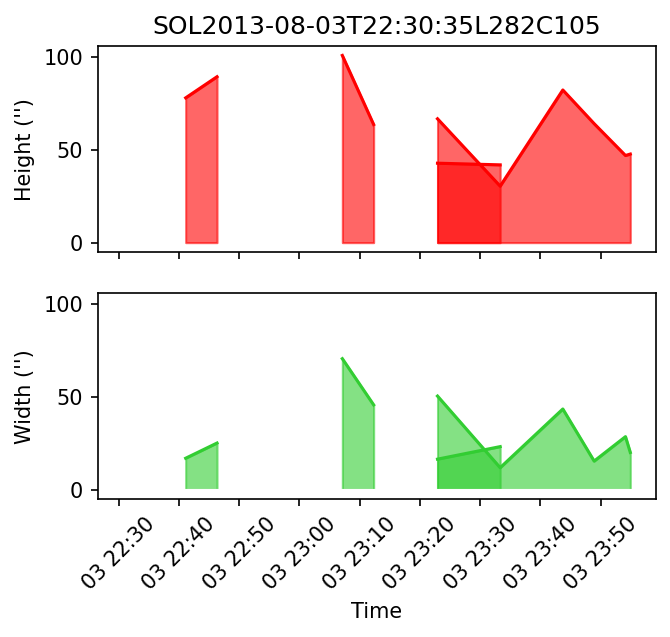

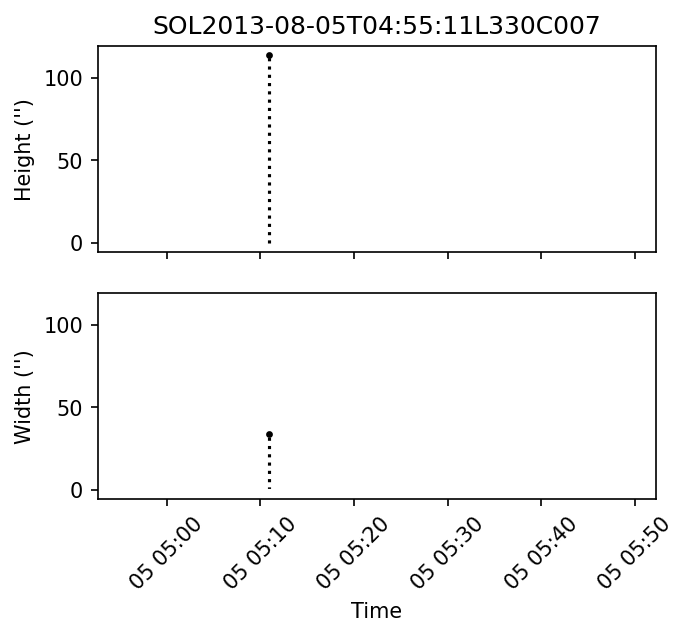

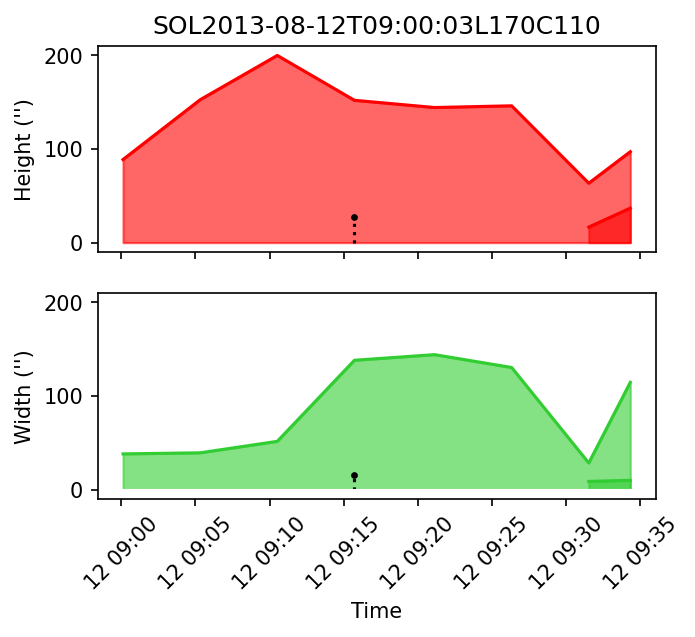

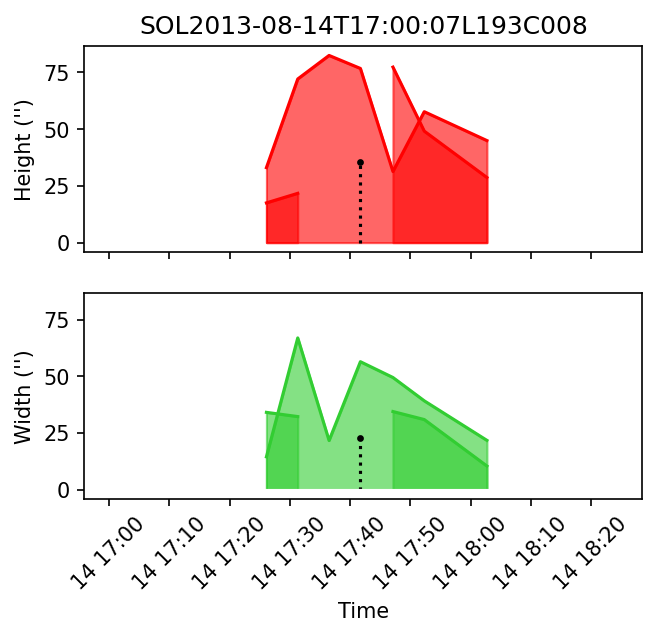

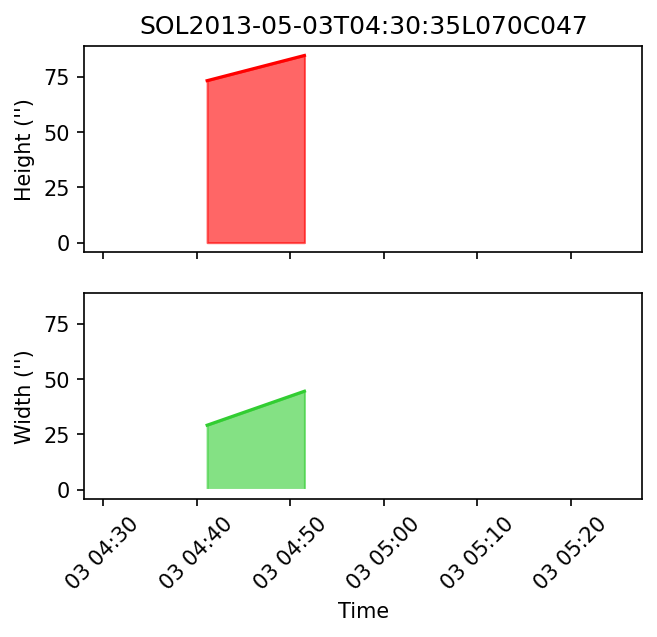

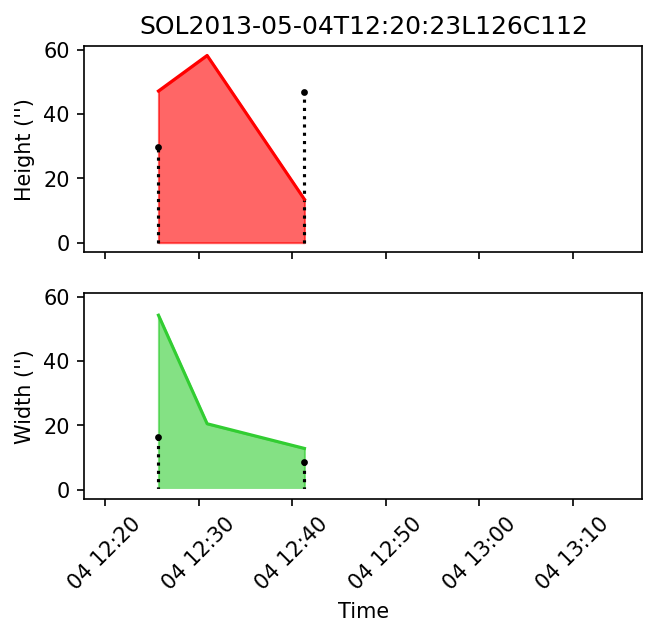

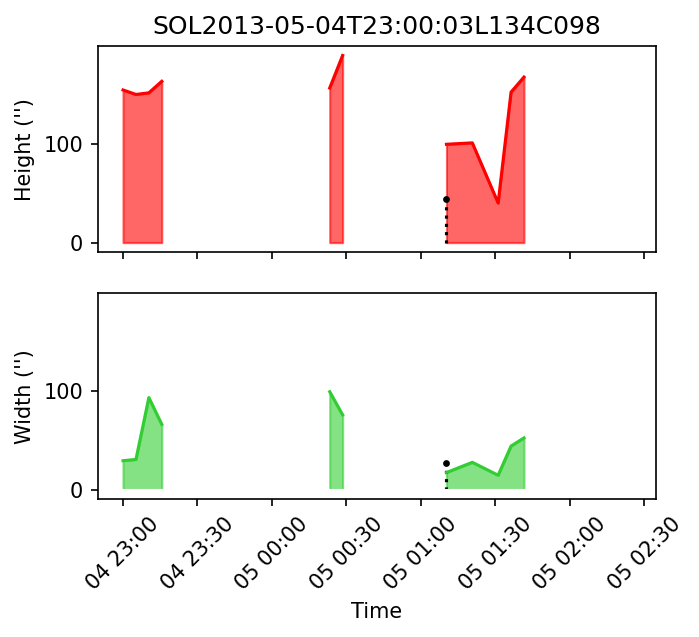

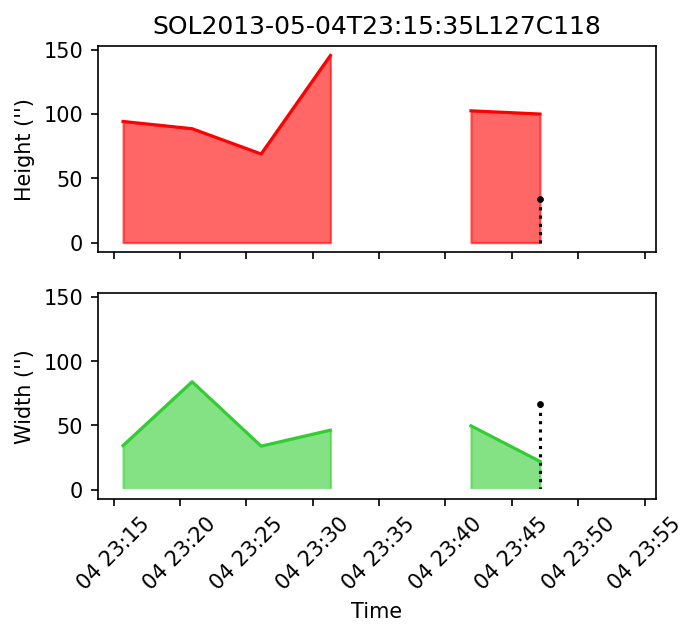

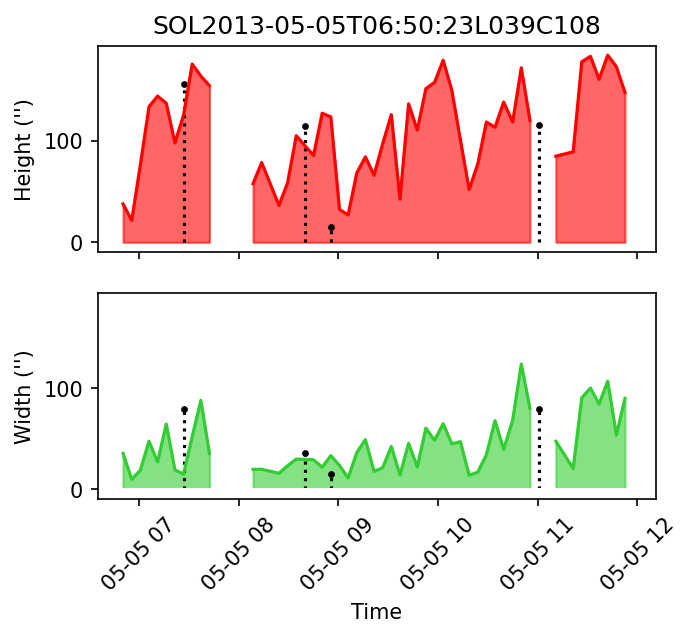

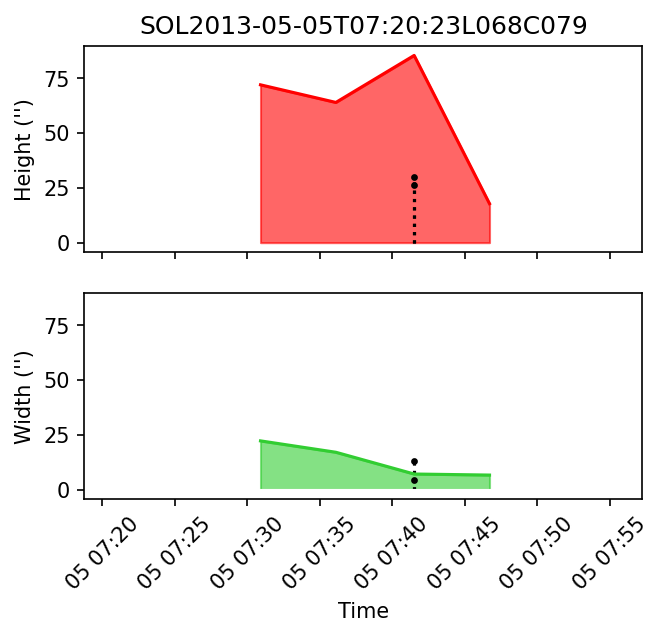

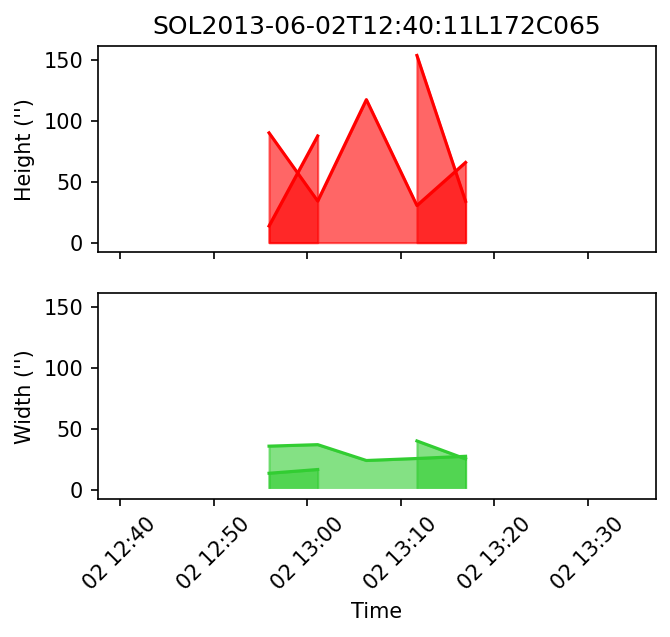

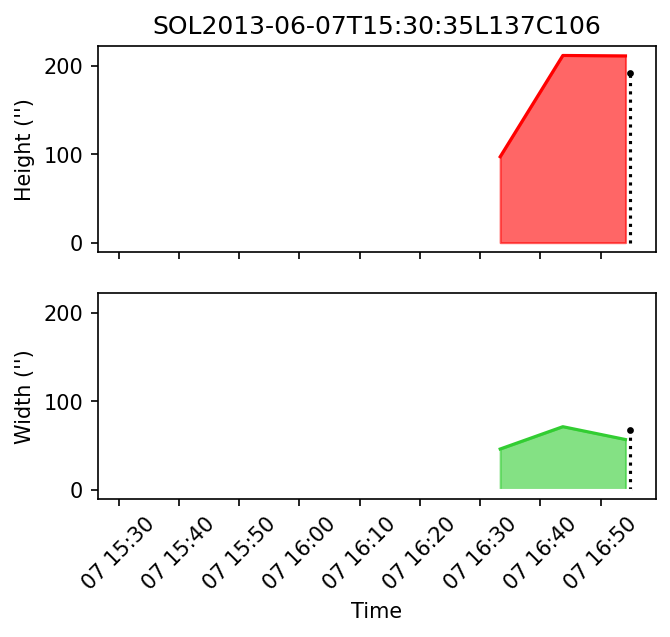

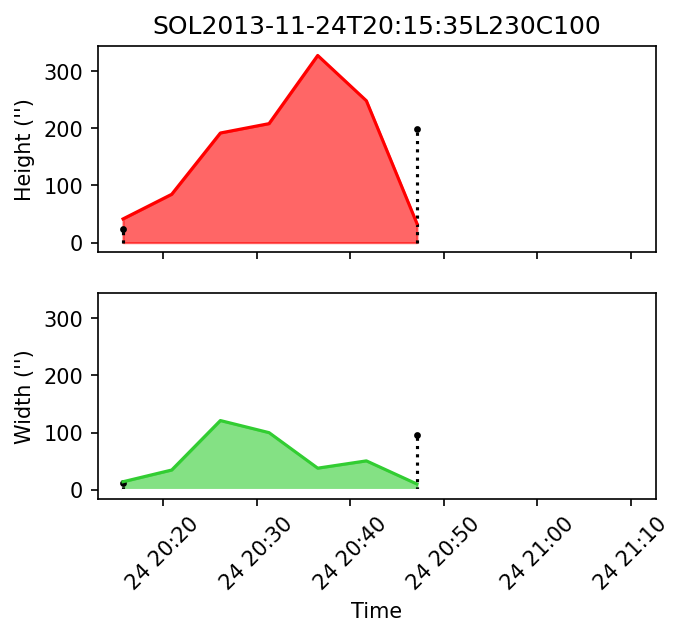

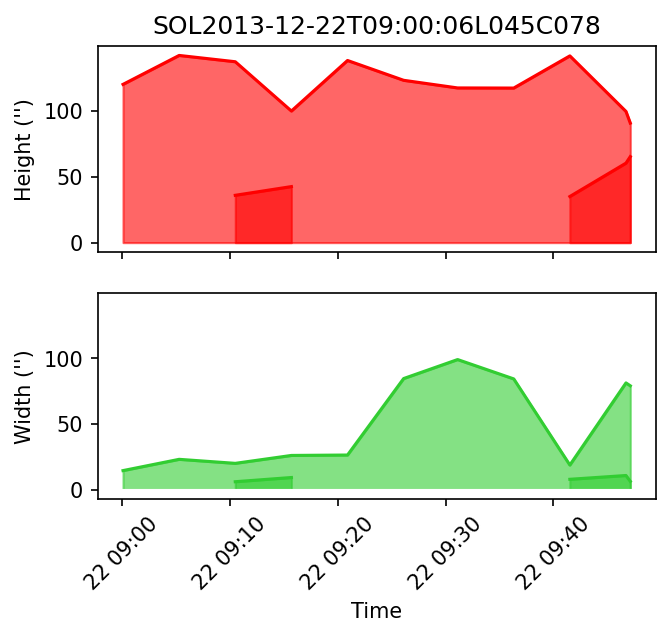

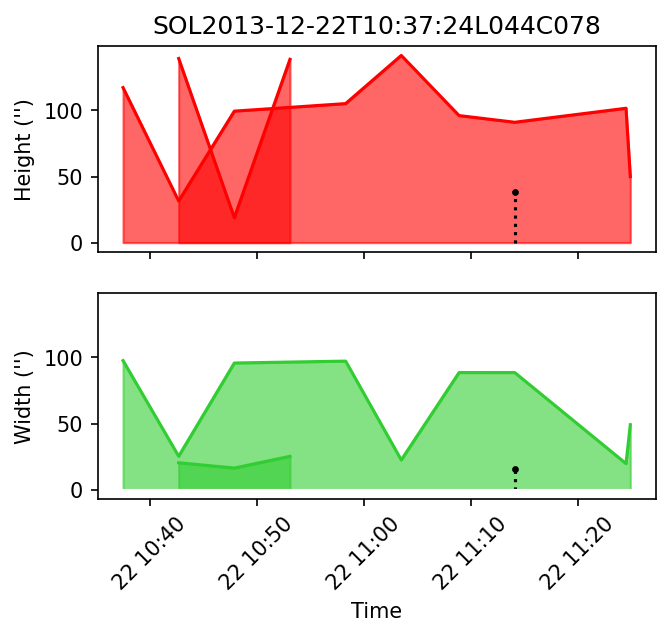

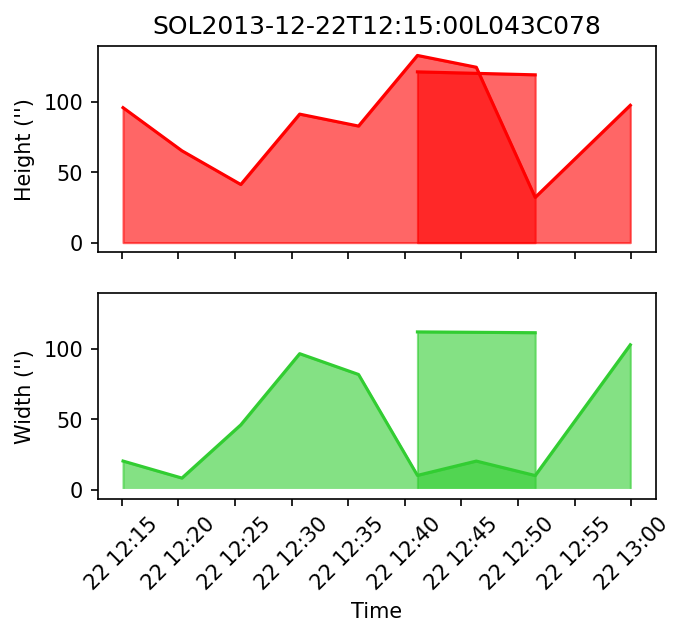

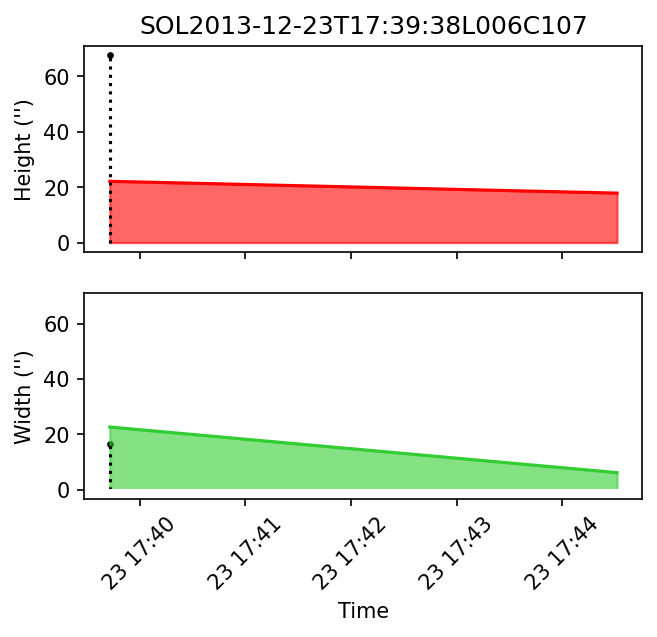

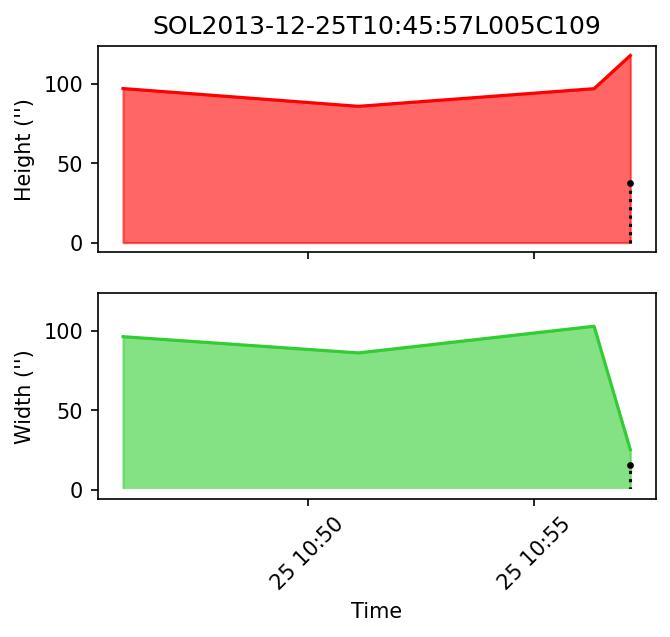

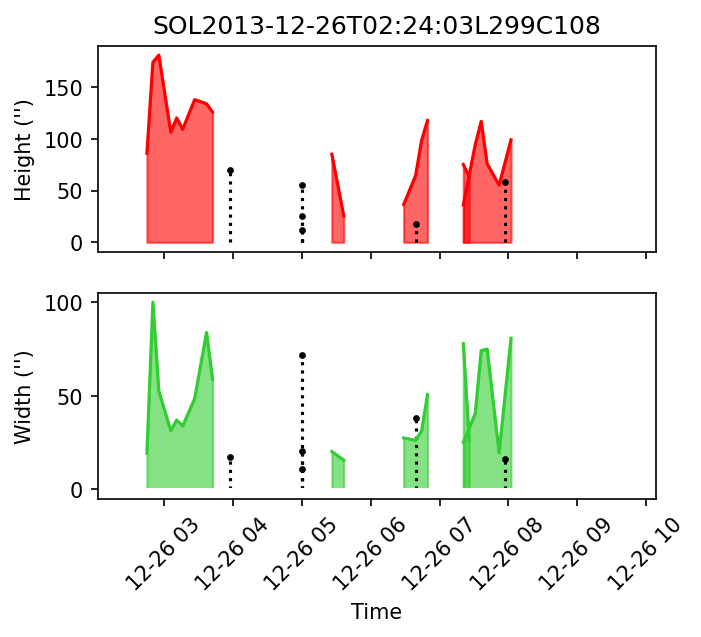

In [7]:
ID=1

for C in Jet_clusters:
    print('Jet start')
    H=np.array([])
    W=np.array([])
    X=np.array([])
    Y=np.array([])
    sig=np.array([])
    H_sig=np.zeros((len(C.jets),2))
    obs_time=np.array([],dtype='datetime64')
    end_time=np.array([],dtype='datetime64')
    for j, jet in enumerate(C.jets):
        #print(j, len(C.jets))
        width_pair,height_pair=jet.get_width_height_pairs()
        #Find sigma of maximum height by first getting the pixel height
        H_pix_box=np.sqrt((height_pair[1][0]-height_pair[0][0])**2 +(height_pair[1][1]-height_pair[0][1])**2 )
        index=list(map(int, jet.cluster_values)).index(int(H_pix_box))
        #Get the height of the box in pixels for the +-1 sigma
        plus_sigma, minus_sigma = sigma_shape(jet.cluster_values, jet.sigma)
        H_pix_minus= minus_sigma[index]
        H_pix_plus= plus_sigma[index]
        #print(width_pair,height_pair)
        file=subject_file[subjects==jet.subject][0]
        #Get the solar locations on the jet
        Bx,By=solar_conversion(file,jet.start[0],jet.start[1])
        Ex,Ey=solar_conversion(file,jet.end[0],jet.end[1])
        print('Start base',Bx,By)
        print('sigma',jet.sigma)
        #Add as attributes and as a list
        jet.adding_new_attr("solar_start",[Bx,By])
        jet.adding_new_attr("solar_end",[Ex,Ey])
        sig=np.append(sig,jet.sigma)
        X=np.append(X,Bx)
        Y=np.append(Y,By)
        #Get the dates the subjecst were observed
        O=date[subjects==jet.subject][0]
        obs_time=np.append(obs_time,O)
        E=end_date[subjects==jet.subject][0]
        end_time=np.append(end_time,E)
        #Calculate the height an wisth in arcsec
        height=get_solar_distance(file,height_pair)
        width=get_solar_distance(file,width_pair)
        #Add as attributes and list
        jet.adding_new_attr("solar_H",height)
        jet.adding_new_attr("solar_W",width)
        H=np.append(H,height)
        W=np.append(W,width)
        #Get the error on the height by scaling the height with the (height_sigma/height -1)
        err_plus, err_minus = height*(H_pix_plus/H_pix_box-1) , height*(H_pix_minus/H_pix_box-1)
        H_sig[j]=np.array([err_plus,err_minus])
        jet.adding_new_attr("solar_H_sig",[err_plus,err_minus])
    
    #duration=(obs_time[-1]-obs_time[0])/np.timedelta64(1, 'm')
    duration=(end_time[-1]-obs_time[0])/np.timedelta64(1, 'm')
    vel=np.max(H)/((obs_time[np.argmax(H)]-obs_time[0])/ np.timedelta64(1, 's'))
    if np.isinf(vel)==True:
        vel=np.NaN
    
    C.adding_new_attr("ID",ID)
    C.adding_new_attr('Max_Height', np.max(H))
    C.adding_new_attr('std_maxH', H_sig[np.argmax(H)])
    C.adding_new_attr("Height",np.average(H))
    C.adding_new_attr("std_H",np.std(H))
    C.adding_new_attr("Width",np.average(W))
    C.adding_new_attr("std_W",np.std(W))
    C.adding_new_attr("Bx",np.average(X))
    C.adding_new_attr("std_Bx",np.std(X))
    C.adding_new_attr("By",np.average(Y))
    C.adding_new_attr("std_By",np.std(Y))
    C.adding_new_attr("obs_time",obs_time[0])
    C.adding_new_attr("sigma",np.average(sig))
    C.adding_new_attr("Duration",duration)
    C.adding_new_attr("Velocity",vel)
    
    ID+=1

    


### Add the longitude and latitude of the measured basepoints as properties to the Jet_cluster objects

In [8]:
import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.coordinates import frames


In [9]:
for C in Jet_clusters:
    #print(C.Bx,C.By)
    X,Y=C.Bx,C.By
    sky_coord = SkyCoord(X*u.arcsec, Y*u.arcsec, frame=frames.Helioprojective(observer="earth", 
                                                                               obstime=str(C.obs_time)))
    #print(sky_coord.heliographic_stonyhurst)
    Coord=sky_coord.heliographic_stonyhurst
    try:
        C.adding_new_attr("Lat",float(str(Coord.lat).split('d')[0]))
        C.adding_new_attr("Lon",float(str(Coord.lon).split('d')[0]))
    except:
        print('Coordinates off limb')
        with frames.Helioprojective.assume_spherical_screen(sky_coord.observer):
            #print(sky_coord.heliographic_stonyhurst)
            Coord=sky_coord.heliographic_stonyhurst
            C.adding_new_attr("Lat",float(str(Coord.lat).split('d')[0]))
            C.adding_new_attr("Lon",float(str(Coord.lon).split('d')[0]))

248.872 -244.0355
2011-03-29T20:33:08
<SkyCoord (HeliographicStonyhurst: obstime=2011-03-29T20:33:08.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (16.0465204, -21.07771693, 0.00465047)>
704.0766249999999 -237.380125
2011-04-01T03:41:44
<SkyCoord (HeliographicStonyhurst: obstime=2011-04-01T03:41:44.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (50.45355467, -18.51674378, 0.00465047)>
-640.9473333333334 259.5926666666667
2011-04-07T20:22:56
<SkyCoord (HeliographicStonyhurst: obstime=2011-04-07T20:22:56.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (-42.81451759, 11.18153919, 0.00465047)>
-276.187 -210.82600000000002
2011-04-08T02:57:20
<SkyCoord (HeliographicStonyhurst: obstime=2011-04-08T02:57:20.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (-17.61807388, -18.51875254, 0.00465047)>
-346.225 -307.999
2011-04-08T05:48:56
<SkyCoord (HeliographicStonyhurst: obstime=2011-04-08T05:48:56.000, rsun=695700.0 km): (lon,

## Export the results of the clustering
Export the JetCluster objects to a JSON file
or 
Export the results to a csv file 

In [10]:
os.chdir(path_old)
json_export_list(Jet_clusters,f'exports/Jet_clusters_{eps}_{time_eps}') #Export all the JetCluster objects
#Jet_clusters[0].json_export('exports/output_single') #Export a single JetCluster object

The 489 JetCluster objects are exported to exports/Jet_clusters_3.0_2.0.json.


In [11]:
Cluster_date = np.array([Jet_clusters[i].obs_time for i in range(len(Jet_clusters))],dtype=str)
Cluster_SOL= np.array([Jet_clusters[i].SOL for i in range(len(Jet_clusters))],dtype=str)
stat_Bx = np.array([Jet_clusters[i].Bx for i in range(len(Jet_clusters))],dtype=str)
stat_By = np.array([Jet_clusters[i].By for i in range(len(Jet_clusters))],dtype=str)
stat_Lon = np.array([Jet_clusters[i].Lon for i in range(len(Jet_clusters))],dtype=str)
stat_Lat = np.array([Jet_clusters[i].Lat for i in range(len(Jet_clusters))],dtype=str)
stat_H = np.array([Jet_clusters[i].Max_Height for i in range(len(Jet_clusters))],dtype=str)
stat_W = np.array([Jet_clusters[i].Width for i in range(len(Jet_clusters))],dtype=str)
stat_dur = np.array([Jet_clusters[i].Duration for i in range(len(Jet_clusters))],dtype=str)
stat_vel = np.array([Jet_clusters[i].Velocity for i in range(len(Jet_clusters))],dtype=str)
stat_sigma = np.array([Jet_clusters[i].sigma for i in range(len(Jet_clusters))],dtype=str)
std_H= np.array([Jet_clusters[i].std_maxH for i in range(len(Jet_clusters))],dtype=str)
std_W= np.array([Jet_clusters[i].std_W for i in range(len(Jet_clusters))],dtype=str)
std_Bx= np.array([Jet_clusters[i].std_Bx for i in range(len(Jet_clusters))],dtype=str)
std_By= np.array([Jet_clusters[i].std_By for i in range(len(Jet_clusters))],dtype=str)

In [12]:
csvfile = open(f'exports/Jet_clusters_{eps}_{time_eps}_test.csv','w')
csvfile.writelines('#date, SOL_event, duration, basepoint_X, std_X, basepoint_Y, std_Y, basepoint_X_longitude, basepoint_Y_latitude, max_height, upper_H, lower_H, avg_width, std_width, velocity, sigma')
csvfile.writelines('\n')
with open(f'exports/Jet_clusters_{eps}_{time_eps}_test.csv','a') as csvfile:
    np.savetxt(csvfile, np.column_stack((Cluster_date,Cluster_SOL,stat_dur,stat_Bx,std_Bx,stat_By,std_By,stat_Lon,stat_Lat,stat_H,std_H,stat_W,std_W,stat_vel,stat_sigma)), delimiter=",",newline='\n',fmt='%s')
csvfile.close()